Stacked LSTM, BiLSTM, and NeuralProphet Analysis of Univariate Time Series


Libraries should be imported

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The code snippet imports several libraries and sets up an environment for data analysis and visualization. 

In the first line, the pandas library is imported, which is commonly used to manipulate and analyze data. It provides data structures and functions to efficiently work with structured data. Python's numpy library is imported on the second line. It provides efficient array operations and mathematical functions. Python's statsmodels.api module provides powerful statistical modeling capabilities. With it, you can analyze data with a wide range of statistical models. In the fourth line, statsmodels.formula.api is imported, which provides a formula interface that allows statistical models to be specified using formulas similar to those used in R. In line five, scikit-learn's sklearn.metrics module is imported. It provides various metrics and evaluation functions for machine learning models. The sixth line imports the seaborn library, a matplotlib-based data visualization library. It provides a high-level interface for creating informative and attractive statistical graphics. The seventh line imports the matplotlib.pyplot module from the matplotlib library. It provides a flexible and comprehensive set of functions for creating various types of plots. The last line, '%matplotlib inline', displays matplotlib plots inline in Jupyter Notebook. It enables the interactive display of plots without the need for additional commands. This code snippet sets up the necessary libraries and environment for data analysis, statistical modeling, and visualization. By combining seaborn and matplotlib, it provides a comprehensive toolkit for working with structured data, creating statistical models, evaluating machine learning models, and creating visualizations.

Preparation and loading of stock data

In [ ]:
data = pd.read_csv("AAPL.csv")
print(data.head())


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.500340  447610800


Data is read from a CSV file named "AAPL.csv" and stored in a variable called "data". 

In the pandas library, the "pd.read_csv()" function reads data from a CSV (comma-separated values) file. The function takes a file path as an argument and returns a pandas DataFrame, which is a two-dimensional tabular data structure. A CSV file containing Apple Inc. stock prices is assumed in this case. (AAPL). "print(data.head())" displays the first few rows of the DataFrame. A DataFrame object's "head()" method returns the first n rows, by default n=5. It is often used to quickly inspect the structure and contents of the data. The program will display the first few rows of the DataFrame after reading the "AAPL.csv" file. As a result, you are able to gain a better understanding of the data's structure, column names, and values at the beginning of the table.

In [ ]:
df = pd.read_csv('AAPL.csv')
df.shape
df

Date        Open        High  ...       Close   Adj Close     Volume
0     2010-01-04    7.622500    7.660714  ...    7.643214    6.562589  493729600
1     2010-01-05    7.664286    7.699643  ...    7.656429    6.573936  601904800
2     2010-01-06    7.656429    7.686786  ...    7.534643    6.469368  552160000
3     2010-01-07    7.562500    7.571429  ...    7.520714    6.457407  477131200
4     2010-01-08    7.510714    7.571429  ...    7.570714    6.500340  447610800
...          ...         ...         ...  ...         ...         ...        ...
2975  2021-10-27  149.360001  149.729996  ...  148.850006  148.850006   56094900
2976  2021-10-28  149.820007  153.169998  ...  152.570007  152.570007  100077900
2977  2021-10-29  147.220001  149.940002  ...  149.800003  149.800003  124850400
2978  2021-11-01  148.990005  149.699997  ...  148.960007  148.960007   74445600
2979  2021-11-02  148.660004  151.570007  ...  150.580002  150.580002   50453753

[2980 rows x 7 columns]

This code snippet performs several operations on a DataFrame object created from the data in the "AAPL.csv" file. Using pandas' "read_csv()" function, the first line reads the data from the CSV file and assigns it to the variable "df". DataFrames are two-dimensional tabular data structures with labeled axes (rows and columns) represented by the "df" variable. It is commonly used for data manipulation and analysis. "df.shape" retrieves the shape of the DataFrame. DataFrame's "shape" attribute returns a tuple which represents its dimensions, i.e., the number of rows and columns. By calling "df.shape", we can obtain information about the size of the DataFrame. "df" simply displays the DataFrame. When executed in a Jupyter Notebook or interactive Python environment, the DataFrame is outputted as a formatted table, showing the contents of the DataFrame. In summary, this code reads the data from the "AAPL.csv" file and stores it in the "df" DataFrame. Then, it retrieves and displays the number of rows and columns in the DataFrame. In the final step, the DataFrame itself is displayed, showing the tabular data from the CSV file.

In [ ]:
df.duplicated().sum().any()

False

This code snippet checks if there are any duplicated rows in a DataFrame called "df". It uses the ".duplicated()" method of the DataFrame. This method returns a boolean Series in which each value is "True" if the corresponding row is a duplicate, otherwise "False". By default, it considers all columns when identifying duplicates. A boolean Series is returned by ".duplicated()". Since "True" is treated as 1 and "False" as 0 when summing, this operation counts the number of duplicate rows in the DataFrame. This is done by using the ".any()" method. The function returns "True" if any value in the Series is "True", indicating that duplicates exist. Otherwise, it returns "False". The code checks for duplicate rows in the DataFrame by calling "df.duplicated().sum().any()". The result is a boolean value: "True" if there are duplicates, and "False" if there are no duplicates. This code checks if the DataFrame "df" contains duplicate rows. This method uses the ".duplicated()" method to identify duplicates, the ".sum()" method to count them, and the ".any()" method to determine if at least one duplicate exists.

In [ ]:
sum(df.duplicated())

0

This code calculates the total number of duplicated rows in a DataFrame called "df". It uses the ".duplicated()" method to identify duplicate rows. If the corresponding row is a duplicate, it returns "True", otherwise it returns "False". By default, it considers all columns when identifying duplicates. "sum(df.duplicated())" sums up the boolean Series returned by ".duplicated()". The result of this code is an integer that represents the total number of duplicate rows in the DataFrame because "True" is treated as 1 and "False" as 0 when summing. By summing the boolean values obtained from the ".duplicated()" method, this code calculates the number of duplicate rows in the DataFrame "df." A quantitative measure of the duplication present in the DataFrame is provided.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2980 non-null   object 
 1   Open       2980 non-null   float64
 2   High       2980 non-null   float64
 3   Low        2980 non-null   float64
 4   Close      2980 non-null   float64
 5   Adj Close  2980 non-null   float64
 6   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 163.1+ KB


This code provides an overview of the structure and summary information about a DataFrame called "data". It uses the ".info()" method to display a concise summary. It provides useful information such as the number of rows and columns, the types of the columns, and the amount of memory used by the DataFrame. This code produces the following information: - The number of rows in the DataFrame. - The number of columns in the DataFrame. - The column names. - The data type of each column (e.g., integer, float, object). - The number of non-null values in each column, which indicates the number of non-missing values. This summary information helps understand the overall structure and characteristics of the data. Users can identify potential issues such as missing values, inconsistencies in the data types, and the DataFrame's composition by using it. By displaying information about the structure, column names, data types, non-null value counts, and memory usage of the DataFrame "data", the "data.info()" code provides an overview of the DataFrame "data".

Preparation 

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary


resumetable(df)

Dataset Shape: (2980, 7)


Name   dtypes  Missing  Uniques
0       Date   object        0     2980
1       Open  float64        0     2856
2       High  float64        0     2837
3        Low  float64        0     2853
4      Close  float64        0     2862
5  Adj Close  float64        0     2939
6     Volume    int64        0     2973

Using the "resumetable" function, this code returns a summary of the characteristics of a DataFrame, "df", as input. The "resumetable" function first prints the shape of the DataFrame, indicating the number of rows and columns it contains. Then, using the ".dtypes" attribute, it extracts data types from the input DataFrame to create a summary DataFrame. There are two columns in the summary DataFrame: "Name" and "dtypes". The "Name" column contains the column names, and the "dtypes" column contains the corresponding data types. The "index" column is removed from the summary DataFrame and replaced with "Name". Then, the summary DataFrame is rearranged to include only the "Name" and "dtypes" columns. Two additional columns are then added. Using the ".isnull().sum()" method, the "Missing" column is populated with the number of missing values in each column. With the ".nunique()" method, the "Uniques" column contains the number of unique values in each column. The function returns the Summary DataFrame. The function generates a summary table for the provided DataFrame, "df", when called with "resumetable(df)". This summary table contains information such as the column names, data types, the number of missing values, and the number of unique values for each column in the DataFrame. As a result of this code, a summary table can be generated for a given DataFrame, providing insight into the data structure and characteristics.

In [ ]:
df.describe()

Open         High  ...    Adj Close        Volume
count  2980.000000  2980.000000  ...  2980.000000  2.980000e+03
mean     41.024595    41.444840  ...    39.343258  2.726309e+08
std      35.489778    35.893334  ...    36.036754  2.265477e+08
min       6.870357     7.000000  ...     5.889190  4.544800e+07
25%      18.336607    18.557768  ...    16.060280  1.106592e+08
50%      28.048750    28.316250  ...    25.920846  1.869154e+08
75%      47.373126    47.687499  ...    45.945326  3.734612e+08
max     156.979996   157.259995  ...   156.690002  1.880998e+09

[8 rows x 6 columns]

This code snippet generates a statistical summary of a DataFrame named "df". By calling the ".describe()" method on the DataFrame, it calculates various descriptive statistics for each column containing numerical data. This code provides a comprehensive summary of the numerical columns. A number of key statistical metrics are presented in each column, including count, mean, standard deviation, minimum, 25th percentile (lower quartile), median (50th percentile), 75th percentile (upper quartile), and maximum values. Insights into the distribution, central tendency, and variability of numerical data can be gained from these statistics. In each column, the count represents the number of non-null values, while the mean represents the average. The standard deviation measures the spread or dispersion of the data points around the mean. Quantiles (25th and 75th percentiles) show how the data is distributed. The median, or the 50th percentile, represents the middle value that separates the higher and lower halves of the data. The code generates this statistical summary so that analysts and data scientists can understand the data's basic characteristics. It aids in identifying outliers, detecting potential data issues, and gaining insights into the overall properties of the dataset. Overall, the "df.describe()" code provides a concise and informative statistical summary of the numerical columns. Descriptive statistics are essential for understanding the distribution, central tendency, and variability of data, facilitating exploratory data analysis and decision-making.

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This code computes the count of missing values in each column of a DataFrame called "df". It does this by calling the ".isna()" method on the DataFrame and checking for missing values (NaN or null values). It returns a DataFrame with the same shape as the original, where each element is replaced with a boolean value indicating whether it is a missing value (True) or not (False). This boolean data frame is then summed. Whenever a boolean DataFrame is summed, True values are treated as 1 and False values as 0. Therefore, the sum of each column gives the count of missing values in that column. This code produces a Series displaying the count of missing values for each column. The index of the Series corresponds to the column names, while the values represent the respective counts of missing values. The code uses "df.isna().sum()" to identify missing values and assess the completeness of the data. It helps in understanding the extent of missingness and deciding how to handle or impute missing values during data preprocessing or analysis. The "df.isna().sum()" code calculates the number of missing values for each column of the DataFrame "df". Using a Series, it facilitates data quality assessment and data cleaning procedures by providing a concise summary of missing data.

In [ ]:
print(df.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999897  0.999853  0.999753   0.999648 -0.483814
High       0.999897  1.000000  0.999818  0.999871   0.999774 -0.482251
Low        0.999853  0.999818  1.000000  0.999874   0.999770 -0.486630
Close      0.999753  0.999871  0.999874  1.000000   0.999898 -0.484570
Adj Close  0.999648  0.999774  0.999770  0.999898   1.000000 -0.483597
Volume    -0.483814 -0.482251 -0.486630 -0.484570  -0.483597  1.000000


This code calculates and prints the correlation matrix for a DataFrame called "df". It calls the ".corr()" method on the DataFrame to compute the pairwise correlation between all pairs of columns. A correlation is a measure of the strength and direction of a linear relationship. It produces a square matrix where the rows and columns correspond to the columns of the DataFrame, and each element represents the correlation coefficient between two variables. The correlation matrix is displayed as a table by calling print(df.corr()). Correlation coefficients range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating no correlation. The diagonal of the correlation matrix consists of 1s, representing the perfect correlation between each variable with itself. It provides insight into the relationships between variables. This helps determine which variables are positively or negatively correlated and to what extent. It is a useful tool for identifying potential patterns, dependencies, or multicollinearity in the data. The "print(df.corr())" code calculates and displays the correlation matrix. Users can analyze and interpret the strength and direction of the relationships between variables with this tool.

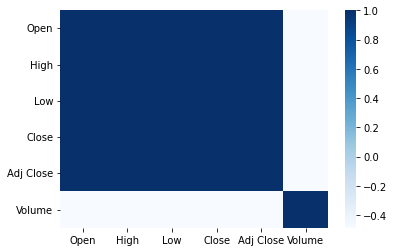

In [ ]:
sns.heatmap(df.corr(), cmap=("Blues"))

This code generates and displays a heatmap plot of the correlation matrix for a DataFrame called "df". It calculates the correlation coefficients between all pairs of columns. The result is a square matrix where each element represents the correlation between two variables. To create a heatmap plot, the "sns.heatmap()" function is called. A heatmap is a graphical representation of data using colors, where each cell in the plot corresponds to a pair of variables and the color represents the correlation coefficient. To select the color palette, set the "cmap" parameter to "Blues". "Blues" is a sequential color map that ranges from light to dark blue, which is commonly used for visualizing positive correlations. When the code is executed, it generates a heatmap plot that visually displays the correlation matrix. The plot helps in understanding the patterns and strengths of the relationships between different variables in the DataFrame. To summarize, this code creates a heatmap plot using seaborn to represent the correlation matrix. In addition to providing a visual representation of correlations between variables, color variations can be used to identify strong positive or negative relationships.

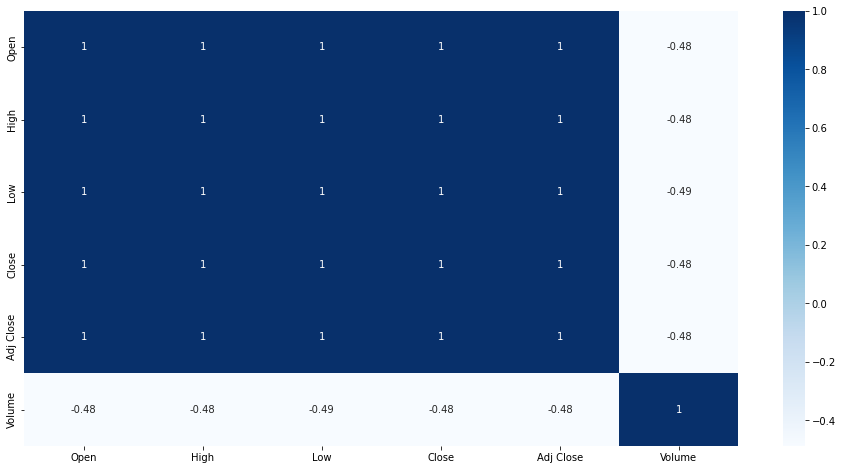

In [ ]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()                           

This code generates and displays a heatmap plot of the correlation matrix for a DataFrame called "df" using the matplotlib and seaborn libraries. In the first line, "plt.figure(figsize=(16,8)), the size of the plot is specified. It specifies the width and height of the figure in inches, allowing for customization of the plot's dimensions. Seaborn's "sns.heatmap()" function is used to create a heatmap plot. The function takes the correlation matrix, "df.corr()", as input and generates a heatmap representation of the matrix. The heatmap's color palette is defined by the "cmap" parameter. This colormap ranges from light to dark blue, with lighter shades indicating lower correlation and darker shades representing higher correlation. The "annot" parameter displays correlation coefficients within each heatmap cell. This provides additional information about the strength of the correlations. Finally, "plt.show()" is called to display the heatmap plot. After executing this code, a heatmap plot is displayed, showing the correlations between variables. Using the plot, you can identify patterns, clusters, and the strength of relationships between variables by visualizing the correlation matrix. To visualize the correlation matrix of the DataFrame "df", this code uses seaborn and matplotlib to create a heatmap plot. Through color gradients and annotations, it provides an intuitive understanding of the relationships between variables.

Text(0.5, 1.0, 'Correlation between Close and Volume')

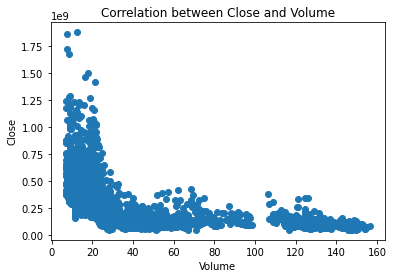

In [ ]:
plt.scatter(df['Close'], df['Volume'])
plt.ylabel("Close")
plt.xlabel("Volume")
plt.title("Correlation between Close and Volume")

As a result of the provided code, a scatter plot is created to visualize the relationship between two variables, the "Close" column and the "Volume" column of the DataFrame "df". Using "plt.scatter(df['Close'], df['Volume'])", each DataFrame data point is represented on the plot as a point. "Close" column values are plotted along the x-axis, and "Volume" column values are plotted along the y-axis. Each point on the plot corresponds to a specific pairing of a "Close" value and its corresponding "Volume" value. The second line, "plt.ylabel("Close")", indicates that the "Close" variable is represented by the y-axis. The third line, "plt.xlabel("Volume")", adds a label to the x-axis, indicating that the x-axis represents the "Volume" variable. This label helps in interpreting the information presented along the x-axis. It provides a descriptive summary of the relationship between close and volume in the fourth line, "plt.title("Correlation between Close and Volume")". This title serves as a brief description that conveys the main purpose or focus of the scatter plot. Executing this code generates a scatter plot, allowing visual examination of the relationship between the variables "Close" and "Volume". Using the plot, you can identify whether there are any correlations, trends, or patterns between these two variables, such as whether trading volume correlates with closing prices.

To summarize, the provided code generates a scatter plot using matplotlib to display the relationship between the "Close" and "Volume" variables in the DataFrame "df". As a visual tool, the plot aids in understanding the interplay between the two variables and assists in identifying patterns and associations.

Text(0.5, 1.0, 'Correlation between High and Low')

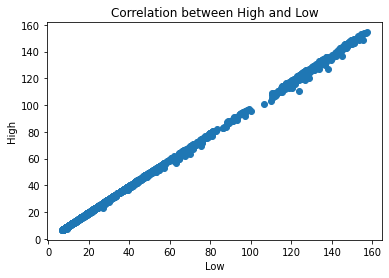

In [ ]:
plt.scatter(df['High'], df['Low'])
plt.ylabel("High")
plt.xlabel("Low")
plt.title("Correlation between High and Low")

In this code, the "High" and "Low" columns of a DataFrame called "df" are visualized as scatter plots. In the first line, "plt.scatter(df['High'], df['Low'])", a scatter plot is created where each point represents a data point from the DataFrame. "High" column values are plotted on the y-axis, and "Low" column values are plotted on the x-axis. In the plot, each "High" value corresponds to a specific "Low" value. A label is added to the y-axis of the plot by "plt.ylabel("High")", which identifies the "High" variable. In the third line, "plt.xlabel("Low")", a label is added to the x-axis of the plot, indicating that the x-axis represents the "Low" variable. A title is added to the plot, providing a description of the plot. A scatter plot is generated by executing this code, displaying the relationship between the "High" and "Low" variables. This plot helps in understanding any correlation or patterns that may exist between these two variables, such as whether there is a relationship between high and low values, or if certain patterns emerge from the data.

Matplotlib is used to visualize the relationship between the "High" and "Low" variables in DataFrame "df" using the scatter plot. As a result of the plot, it is easier to understand how the two variables relate to one another as well as identify potential correlations or patterns.

Economic Development Administration

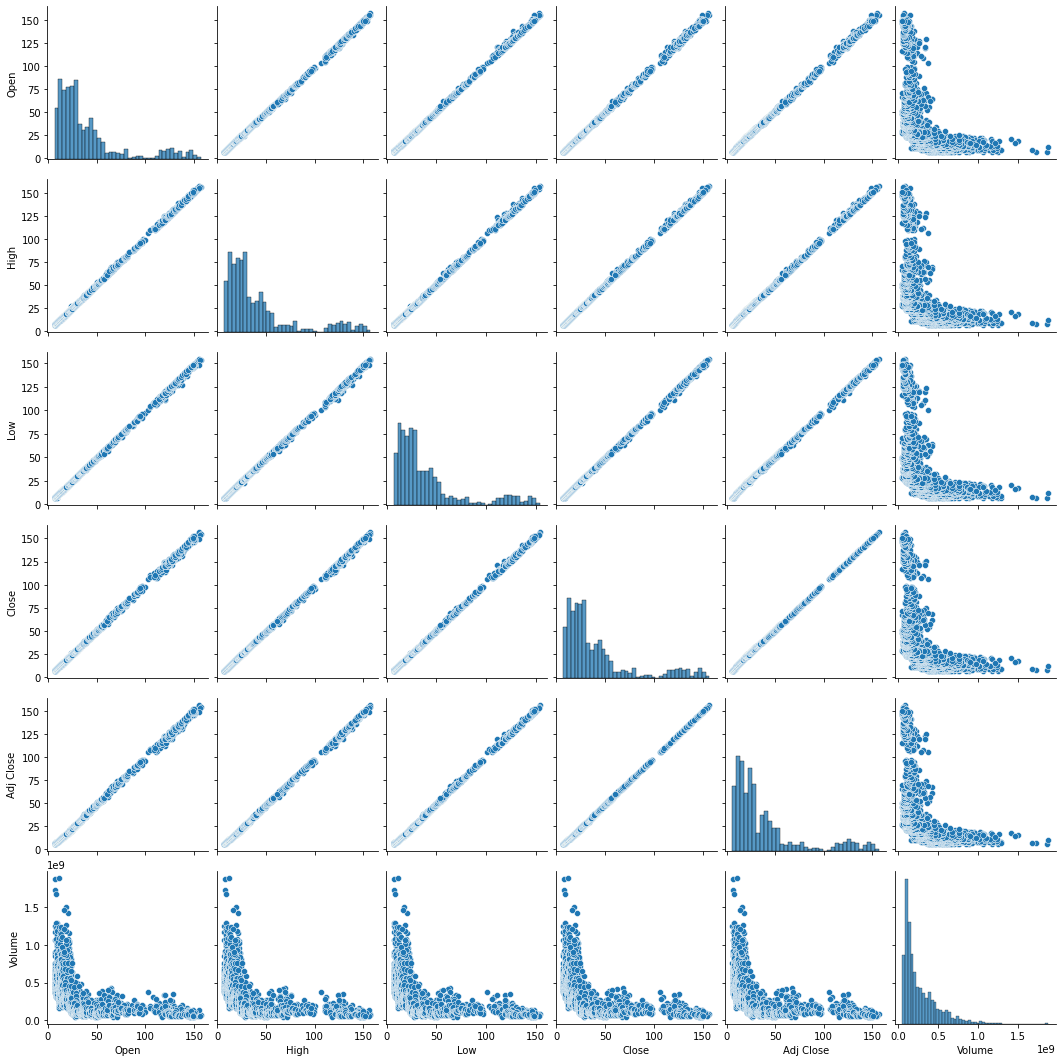

In [ ]:
sns.pairplot(df)

This code generates a pair plot, also known as a scatter plot matrix, for a DataFrame called "df" using the seaborn library. DataFrame is passed to "sns.pairplot()". In this function, each variable in the DataFrame is plotted against each other in a grid of scatter plots. The resulting plot matrix displays the pairwise relationships between the variables, with scatter plots along the diagonal and scatter plots or other visualizations in the off-diagonal cells.

The DataFrame variables can be analyzed visually by executing this code, which generates a pair plot. By examining the plot matrix, you can gain insight into how each variable relates to the other, revealing correlations, patterns, and distributions. When working with multivariate data, pair plots are particularly useful for identifying interesting relationships or trends between variables. It can help in identifying outliers, understanding the distribution of data points, and identifying potential nonlinear relationships that are not evident through individual scatter plots. To visualize the relationships between variables in the DataFrame "df", the "sns.pairplot(df)" code generates a pair plot using seaborn. Using it, you can explore and understand the interactions and dependencies among variables in a dataset in an efficient and intuitive way.

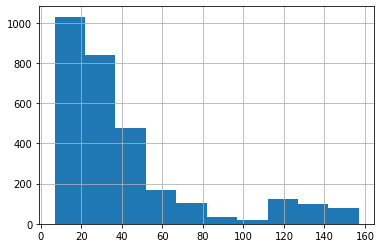

In [ ]:
df['Open'].hist()

The code generates a histogram based on the values in the "Open" column of a DataFrame called "df". Using "df['Open'], the code selects a specific column from the DataFrame and invokes the ".hist()" method to generate a histogram for the selected column. Using a histogram, data is divided into intervals or bins on the x-axis and the frequency or count of values falling into each bin is shown on the y-axis. By executing this code, a histogram plot is created that illustrates how values in the "Open" column are distributed. As well as revealing patterns such as skewness, modes, or deviations from a normal distribution, the histogram provides insight into the concentration or spread of data. The "df['Open'].hist()" code generates a histogram plot based on the "Open" column of "df". In addition to allowing exploration of the distribution of values, it also aids in understanding the shape and characteristics of the data in that column.

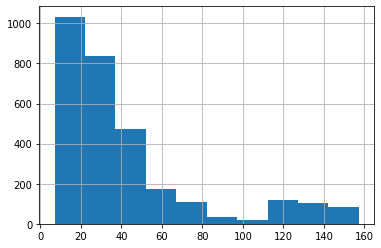

In [ ]:
df['High'].hist()

This code generates a histogram for the values in the "High" column of a DataFrame called "df".

Using "df['High'], the code selects the "High" column from the DataFrame and creates a histogram by calling ".hist()" on the selected column. A histogram is a graphical representation that divides the data into intervals or bins on the x-axis and displays the frequency or count of values falling into each bin on the y-axis.

In the "High" column, a histogram plot is generated by executing this code. The histogram provides insights into the concentration or spread of the data and helps identify any patterns, modes, or deviations from a normal distribution. The "df['High'].hist()" code generates a histogram plot using the "High" column of the DataFrame. By exploring the distribution of values in that column, the shape and characteristics of the data can be better understood.

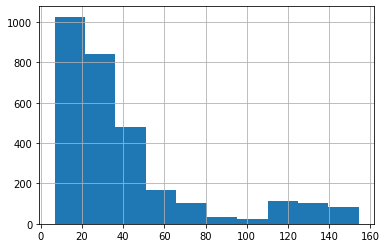

In [ ]:
df['Low'].hist()

An "Low" column of a DataFrame called "df" is used in this code to generate a histogram. Using the "df['Low']" method, the code selects the "Low" column from the DataFrame. An output histogram is then generated by calling ".hist()" on the selected column. A histogram is a graphical representation that divides the data into intervals or bins on the x-axis and displays the frequency or number of values falling into each bin on the y-axis. In the case of executing this code, a histogram plot is generated, showing the distribution of values in the "Low" column. The "df['Low'].hist()" code generates a histogram plot using the "Low" column of the DataFrame "df". It provides insight into the concentration or spread of the data and helps in identifying any patterns, modes, or deviations from a normal distribution. A visual representation of the distribution of values in that column assists in understanding the data's shape and characteristics.

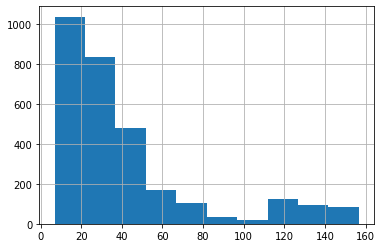

In [ ]:
df['Close'].hist()

This code generates a histogram for the values in the "Close" column of a DataFrame called "df".

The code selects the "Close" column using "df['Close']" to create a histogram. After selecting the column, ".hist()" is called to create the histogram. In a histogram, the data is divided into intervals or bins on the x-axis and the frequency or count of values within each bin is displayed on the y-axis. A histogram plot is generated when this code is executed, illustrating the distribution of values in the "Close" column visually. In addition to providing insights into the concentration or spread of data, the histogram also helps to identify patterns, modes, or deviations from normal distributions. A histogram plot is generated using the "Close" column of the DataFrame "df" using the "df['Close'].hist()" code. In addition to providing insights into the shape and characteristics of the data, it provides a visual representation of the distribution of values in that particular column.

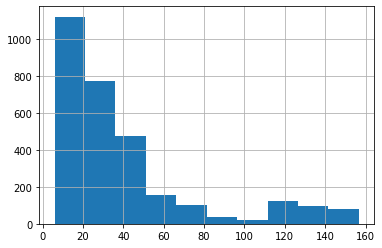

In [ ]:
df['Adj Close'].hist()

An "Adj Close" column in a DataFrame called "df" is used in this code to generate a histogram. The code selects the "Adj Close" column from the DataFrame by using "df['Adj Close']. A histogram is then generated by calling the ".hist()" method on the selected column. On the x-axis, the data is divided into intervals called bins, and on the y-axis, the frequency or count of values falling into each bin is displayed. When this code is executed, a histogram plot is generated, depicting the distribution of values in the "Adj Close" column visually. It helps identify any patterns, modes, or deviations from a normal distribution by indicating the concentration or spread of data. A histogram plot is generated by using the "Adj Close" column of the DataFrame "df" in the "df['Adj Close'].hist()" code. Visually exploring the distribution of values in a column provides insights into the data's shape and characteristics.

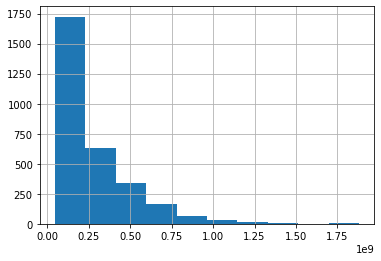

In [ ]:
df['Volume'].hist()

An "Volume" column in a DataFrame called "df" is used to generate a histogram in this code. The code selects the "Volume" column from the DataFrame using "df['Volume']". A histogram is then created by calling ".hist()" on the selected column. A histogram is a graphical representation that divides the data into intervals or bins on the x-axis and displays the frequency or count of values falling into each bin on the y-axis.

The output of this code is a histogram plot showing the distribution of values in the column "Volume." Data histograms can reveal patterns such as skewness, modes, or any notable deviation from a normal distribution, as well as the concentration or spread of the data. With the "Volume" column of the DataFrame "df," the "df['Volume'].hist()" code generates a histogram plot. By visualizing the distribution of values in that column, we can gain a better understanding of the data's shape and characteristics.

In [ ]:
df

Date        Open        High  ...       Close   Adj Close     Volume
0     2010-01-04    7.622500    7.660714  ...    7.643214    6.562589  493729600
1     2010-01-05    7.664286    7.699643  ...    7.656429    6.573936  601904800
2     2010-01-06    7.656429    7.686786  ...    7.534643    6.469368  552160000
3     2010-01-07    7.562500    7.571429  ...    7.520714    6.457407  477131200
4     2010-01-08    7.510714    7.571429  ...    7.570714    6.500340  447610800
...          ...         ...         ...  ...         ...         ...        ...
2975  2021-10-27  149.360001  149.729996  ...  148.850006  148.850006   56094900
2976  2021-10-28  149.820007  153.169998  ...  152.570007  152.570007  100077900
2977  2021-10-29  147.220001  149.940002  ...  149.800003  149.800003  124850400
2978  2021-11-01  148.990005  149.699997  ...  148.960007  148.960007   74445600
2979  2021-11-02  148.660004  151.570007  ...  150.580002  150.580002   50453753

[2980 rows x 7 columns]

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

With the Plotly library, this code generates a candlestick chart to illustrate Apple (AAPL) stock price data. First, we import the module that creates interactive graph objects from Plotly. The second line creates a figure object by using the `go.Figure()` constructor. Candlestick charts can be defined with the go.Candlestick() trace in the constructor. "X" represents the dates, while "open", "high", "low", and "close" represent the opening, highest, lowest, and closing prices of the stock. These values are obtained from the "data" DataFrame. The third line updates the layout. Using the update_layout() method, the title of the chart is customized as "Apple Stock Price Analysis". The `xaxis_rangeslider_visible` parameter is set to False to hide the range slider for the x-axis.

Finally, the `figure.show()` method is called to display the candlestick chart.

In this code, the stock price data of Apple is visualized using an interactive candlestick chart. The candlesticks represent the trading range (high and low) and the opening and closing prices. Users can analyze patterns, trends, and potential support and resistance levels using the chart, which displays the price movement of the stock over time. The code displays Apple's stock price data as a candlestick chart using the Plotly library. Users can analyze and interpret the historical price trends using the chart, which displays the stock's trading range and price movement.

The EDA

In [ ]:
data = pd.read_csv("AAPL.csv")
print(data.head())
data.info()

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.500340  447610800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2980 non-null   object 
 1   Open       2980 non-null   float64
 2   High       2980 non-null   float64
 3   Low        2980 non-null   float64
 4   Close      2980 non-null   float64
 5   Adj Close  2980 non-null   float64
 6   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 163.1+ KB


This code performs data reading, data preview, and information summary operations on a dataset stored in a CSV file named "AAPL.csv". The first line reads the data from the CSV file using the pandas library's "read_csv()" method. The data is then assigned to a DataFrame called "data". The second line prints the first few rows of the DataFrame. This provides a quick preview of the data, displaying the column names and a subset of the records. The third line generates a summary using the "info()" method. It includes information on the number of rows and columns in the dataset, the data types for each column, and the amount of memory used by the dataset. To gain an understanding of the dataset's structure and content, the first few rows are printed after loading the data from the CSV file into a DataFrame. The "info()" method then offers a more detailed overview, which includes the data types and non-null values for each column. The code reads a CSV file into a DataFrame, prints a preview of its initial records, and summarizes its structure and contents. Prior to further analysis or processing, it is commonly used to gain an initial understanding of the data.

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This code calculates the count of missing values in each column of a DataFrame called "data". Each column of the DataFrame is checked for null values (NaNs). It returns a DataFrame with the same shape as the original, where each element is replaced with a boolean value indicating whether it is a missing value (True) or not (False). It then applies the ".sum()" method to the boolean DataFrame. Boolean DataFrames are summed with True values as 1 and False values as 0. Therefore, the sum of each column gives the count of missing values in that column. This code displays each column's missing values as a Series. The index of the Series corresponds to the column names, while the values represent the respective counts of missing values. With this code, you can assess the completeness of the data and identify missing values. The data can be cleaned or handled in subsequent data processing tasks based on this information, and it helps in understanding the extent of missingness. The "data.isnull().sum()" code calculates and returns the number of missing values in each column in the DataFrame "data". A Series is generated that summarizes the missing data, enabling data quality assessment and data cleaning or imputation as necessary.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

Using the pandas library, this code converts the values from the "Date" column in a DataFrame called "data" into datetime format. A "Date" column is selected from the DataFrame by using "data['Date']. To convert the values to datetime format, the "pd.to_datetime()" function is applied to the selected column. With the "infer_datetime_format=True" parameter, Panda will automatically determine the appropriate date and time format based on the column values. As a result of executing this code, the "Date" column is converted to datetime format, which makes it possible to manipulate and analyze the dates as datetime objects. The code "data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)" converts the values in the "Date" column of "data" into datetime format. As a result of this conversion, dates can be used as datetime objects, which allows for various time-related operations and analyses.

In [ ]:
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

This code sets up the necessary configurations for plotting with Matplotlib and manages warnings. "%matplotlib inline" displays Matplotlib plots directly in the output cells of Jupyter Notebook or JupyterLab. It enables the inline backend, allowing the plots to be shown within the notebook itself. Matplotlib's "rcParams" module is imported. This module provides a way to customize various plotting parameters and configurations.

The third line imports the "datetime" module, which allows working with dates and times in Python.

The fourth line imports the "warnings" module, which provides control over warning messages generated during code execution.

A filter to ignore warnings is set up in the fifth line, "warnings.filterwarnings('ignore')". In this line, the code suppresses warning messages and prevents them from being displayed. This can be useful when dealing with known or expected warnings that don't affect the execution of the code. The code configures the plotting environment by enabling the inline display of Matplotlib plots, importing necessary modules for handling dates and warnings, and setting up a filter that ignores warning messages. Configurations and imports ensure smooth plotting and prevent warning messages from cluttering the output.

In [ ]:

data=data.set_index(['Date'])
data.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.500340  447610800

This code performs two operations on a DataFrame called "data". The first line, "data=data.set_index(['Date']), sets the "Date" column as the DataFrame's index. The "set_index()" method on the DataFrame uses the values in the "Date" column to determine the new index for the DataFrame. This operation reorganizes the DataFrame, making the dates the primary identifier for the rows. The second line, "data.head()", shows the first few rows. The "head()" method is used to retrieve the top records of the DataFrame, providing a preview of the data with the newly set index. This code changes the DataFrame so that the "Date" column becomes the index. The date values allow for easier indexing, filtering, and analysis of the data. The "head()" method call then provides a glimpse of the DataFrame, showing the updated structure with the new index. This code sets the "Date" column as the index of the DataFrame. By reorganizing the DataFrame this way, data can be handled and analyzed more efficiently. After calling "data.head()", the updated DataFrame displays the initial records with the new index.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2980 entries, 2010-01-04 to 2021-11-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2980 non-null   float64
 1   High       2980 non-null   float64
 2   Low        2980 non-null   float64
 3   Close      2980 non-null   float64
 4   Adj Close  2980 non-null   float64
 5   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 163.0 KB


This code provides a summary of the DataFrame "data" by displaying information about its structure, data types, and missing values. An overview of the dataset is generated by calling the "info()" method on the DataFrame. The output includes details such as the number of rows and columns in the DataFrame, the data types of each column, and the number of non-null values in each column. "data.info()" helps visualize the data. It provides essential information about the data types, such as whether the columns contain numerical, categorical, or datetime values. Additionally, the count of non-null values per column highlights potential missing or incomplete data. Analysis of this summary is useful for assessing the quality of data. By using it, users can determine the size and shape of the dataset, detect inconsistencies in the data types, and identify missing values. The information obtained from "data.info()" guides subsequent data preprocessing and analysis steps. Overall, the "data.info()" code provides an informative summary of the DataFrame "data". As an initial assessment and understanding of the dataset, it provides a concise overview of its structure, types of columns, and missing values.

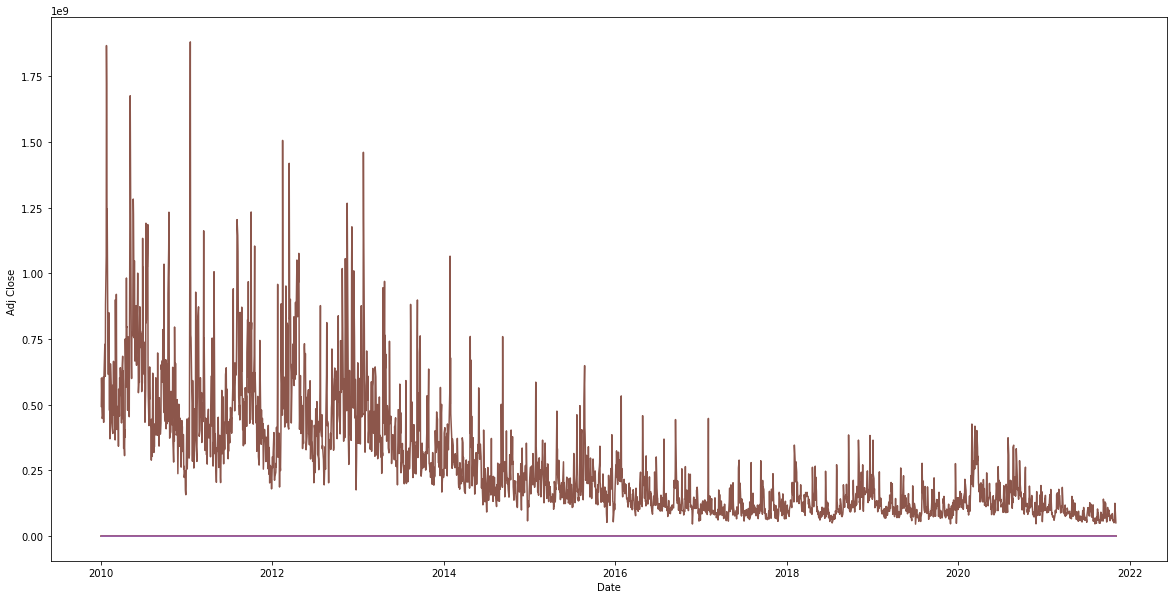

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Adj Close ")
plt.plot(data)

The provided code generates a line plot to visualize the historical trend of the "Adj Close" values over time from a DataFrame named "data". The plot figure size is set in the first line, "plt.figure(figsize=(20,10)). "figsize" specifies the figure's width and height in inches. The width is set to 20 inches and the height is set to 10 inches. This ensures that the resulting plot has a larger size, making it easier to view and analyze the data. The second line, "plt.xlabel("Date")", adds a label to the x-axis. The label clearly indicates that the x-axis represents the variable "Date". It helps users understand the information being presented along the horizontal axis. The third line, "plt.ylabel("Adj Close")", adds a label to the y-axis. The y-axis represents the variable "Adj Close". It helps in interpreting the information displayed along the vertical axis. In the fourth line, "plt.plot(data)", the line plot is generated. Using the "data" DataFrame as input, the "plot()" function from the matplotlib library is called. This plots the values from the "Adj Close" column against the corresponding dates on the x-axis, creating a line plot that visually represents the historical changes in the adjusted closing prices of the stock. The historical trend in the "Adj Close" values is visualized by executing this code, which creates a line plot. Plotting the adjusted closing price of the stock helps in understanding its patterns, fluctuations, and overall movement. It enables users to identify trends, potential reversals, and other significant aspects related to the stock's performance. The code generates a line plot using matplotlib to represent the historical trend of the "Adj Close" values. Enhanced visibility is provided by properly labeled axes and a larger figure size. Using this tool, you can analyze and interpret the stock's price movement over time visually.

In [ ]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2010-01-04       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-05       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-06       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-07       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-08       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-11       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-12       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-13       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-14       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-15       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-19       NaN       NaN       NaN       NaN        NaN           NaN
2010-01-20  

To calculate the rolling mean and rolling standard deviation of a DataFrame called "data", this code performs rolling window calculations. With the "rolling()" function from pandas, the "rolmean = data.rolling(window=12).mean()" function applies a rolling window of size 12 to the "data" DataFrame. It creates a new DataFrame, "rolmean", where each value represents the rolling mean of the previous 12 values. It computes the average value over a sliding window of 12 periods. The second line, "rolstd = data.rolling(window=12).std()", calculates the rolling standard deviation using the same rolling window operation. The resulting DataFrame, "rolstd", contains the rolling standard deviation values for each window of 12 periods in the "data" DataFrame. The third line prints the first 15 rows of the "rolmean" DataFrame. This provides a preview of the calculated rolling mean values for the initial period of the dataset. The fourth line prints the first 15 rows of the "rolstd" DataFrame. This displays the rolling standard deviation values for the initial period of the dataset. Using a 12-window size, this code computes the rolling mean and rolling standard deviation for the "data" DataFrame. The data's trend and variability over time can be analyzed using these calculations. The printed outputs provide a glimpse of the computed rolling mean and standard deviation values for the initial portion of the dataset.

To calculate the rolling mean and rolling standard deviation, the code uses a window size of 12 to calculate rolling windows on the "data" DataFrame. In the printed outputs, the results for the initial period of the dataset are shown, allowing insight into the trend and variability of the data over time.

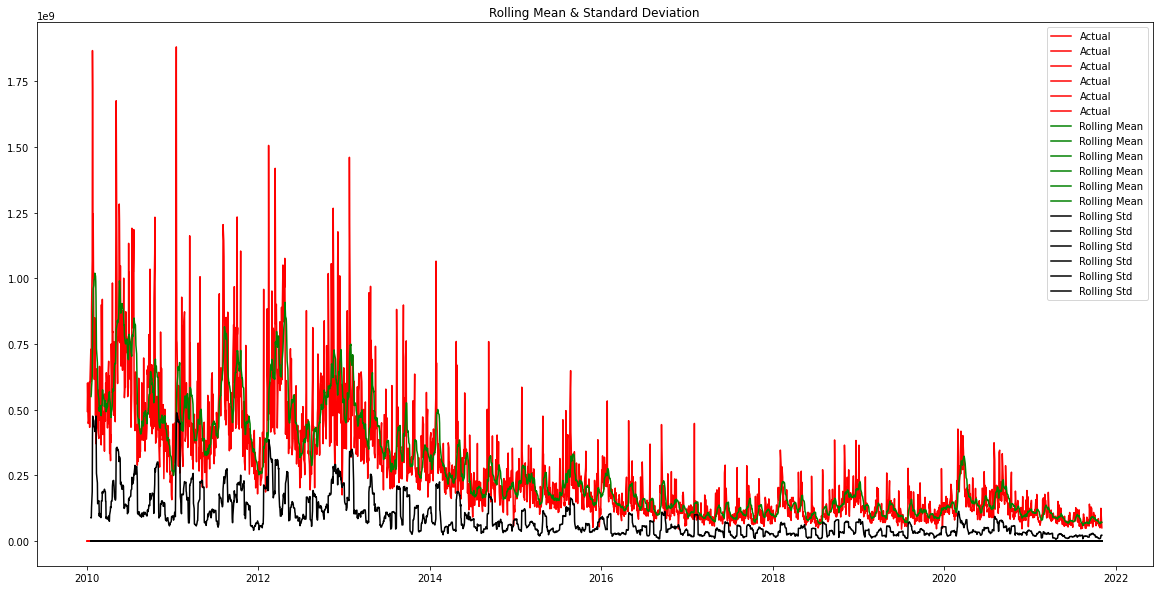

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The provided code generates a line plot to visualize the actual data, rolling mean, and rolling standard deviation of a DataFrame named "data". The plot size is specified in the first line, "plt.figure(figsize=(20,10))". In inches, this line specifies the figure's width and height. With a width of 20 inches and a height of 10 inches, the resulting plot will have larger dimensions, making it easier to view and analyze the data.

As part of the "actual=plt.plot(data, color='red', label='Actual')" function, the "plot()" function from the matplotlib library is used to plot the "data" DataFrame. In red, the line plot represents the actual data points. The "label" parameter assigns a label to this line plot, indicating that it represents the actual data. The third line, "mean_6=plt.plot(rolmean, color='green', label='Rolling Mean')", also generates a line plot for the rolling mean. Rolling mean values are plotted in green in the "rolmean" DataFrame. The "label" parameter assigns a label to this line plot, indicating that it represents the rolling mean. The fourth line, "std_6=plt.plot(rolstd, color='black', label='Rolling Std'), creates a line plot for the rolling standard deviation. Black color represents the "rolstd" DataFrame, which contains rolling standard deviation values. The "label" parameter assigns a label to this line plot, indicating that it represents the rolling standard deviation. The fifth line adds a legend. The legend displays the labels assigned to each line plot, allowing for easy identification of the actual data, rolling mean, and rolling standard deviation. The title of the plot is set by the sixth line, "plt.title('Rolling Mean & Standard Deviation'). This descriptive title provides a summary of the information being presented in the plot, specifically highlighting that it shows the rolling mean and standard deviation. Finally, the seventh line, "plt.show(block=False)", displays the plot. Users can view the line plots of the actual data, rolling mean, and rolling standard deviation by calling the "show()" function. "block=False" allows the program to continue without being blocked, meaning the plot window can be closed before the next line of code is executed.

In summary, the provided code creates a line plot using matplotlib to represent the actual data, rolling mean, and rolling standard deviation of the DataFrame "data". Plotting these three components allows comparison of the actual data with the rolling mean and standard deviation. By identifying patterns and potential anomalies, the plot helps to understand the trends, central tendency, and variability of the data over time.

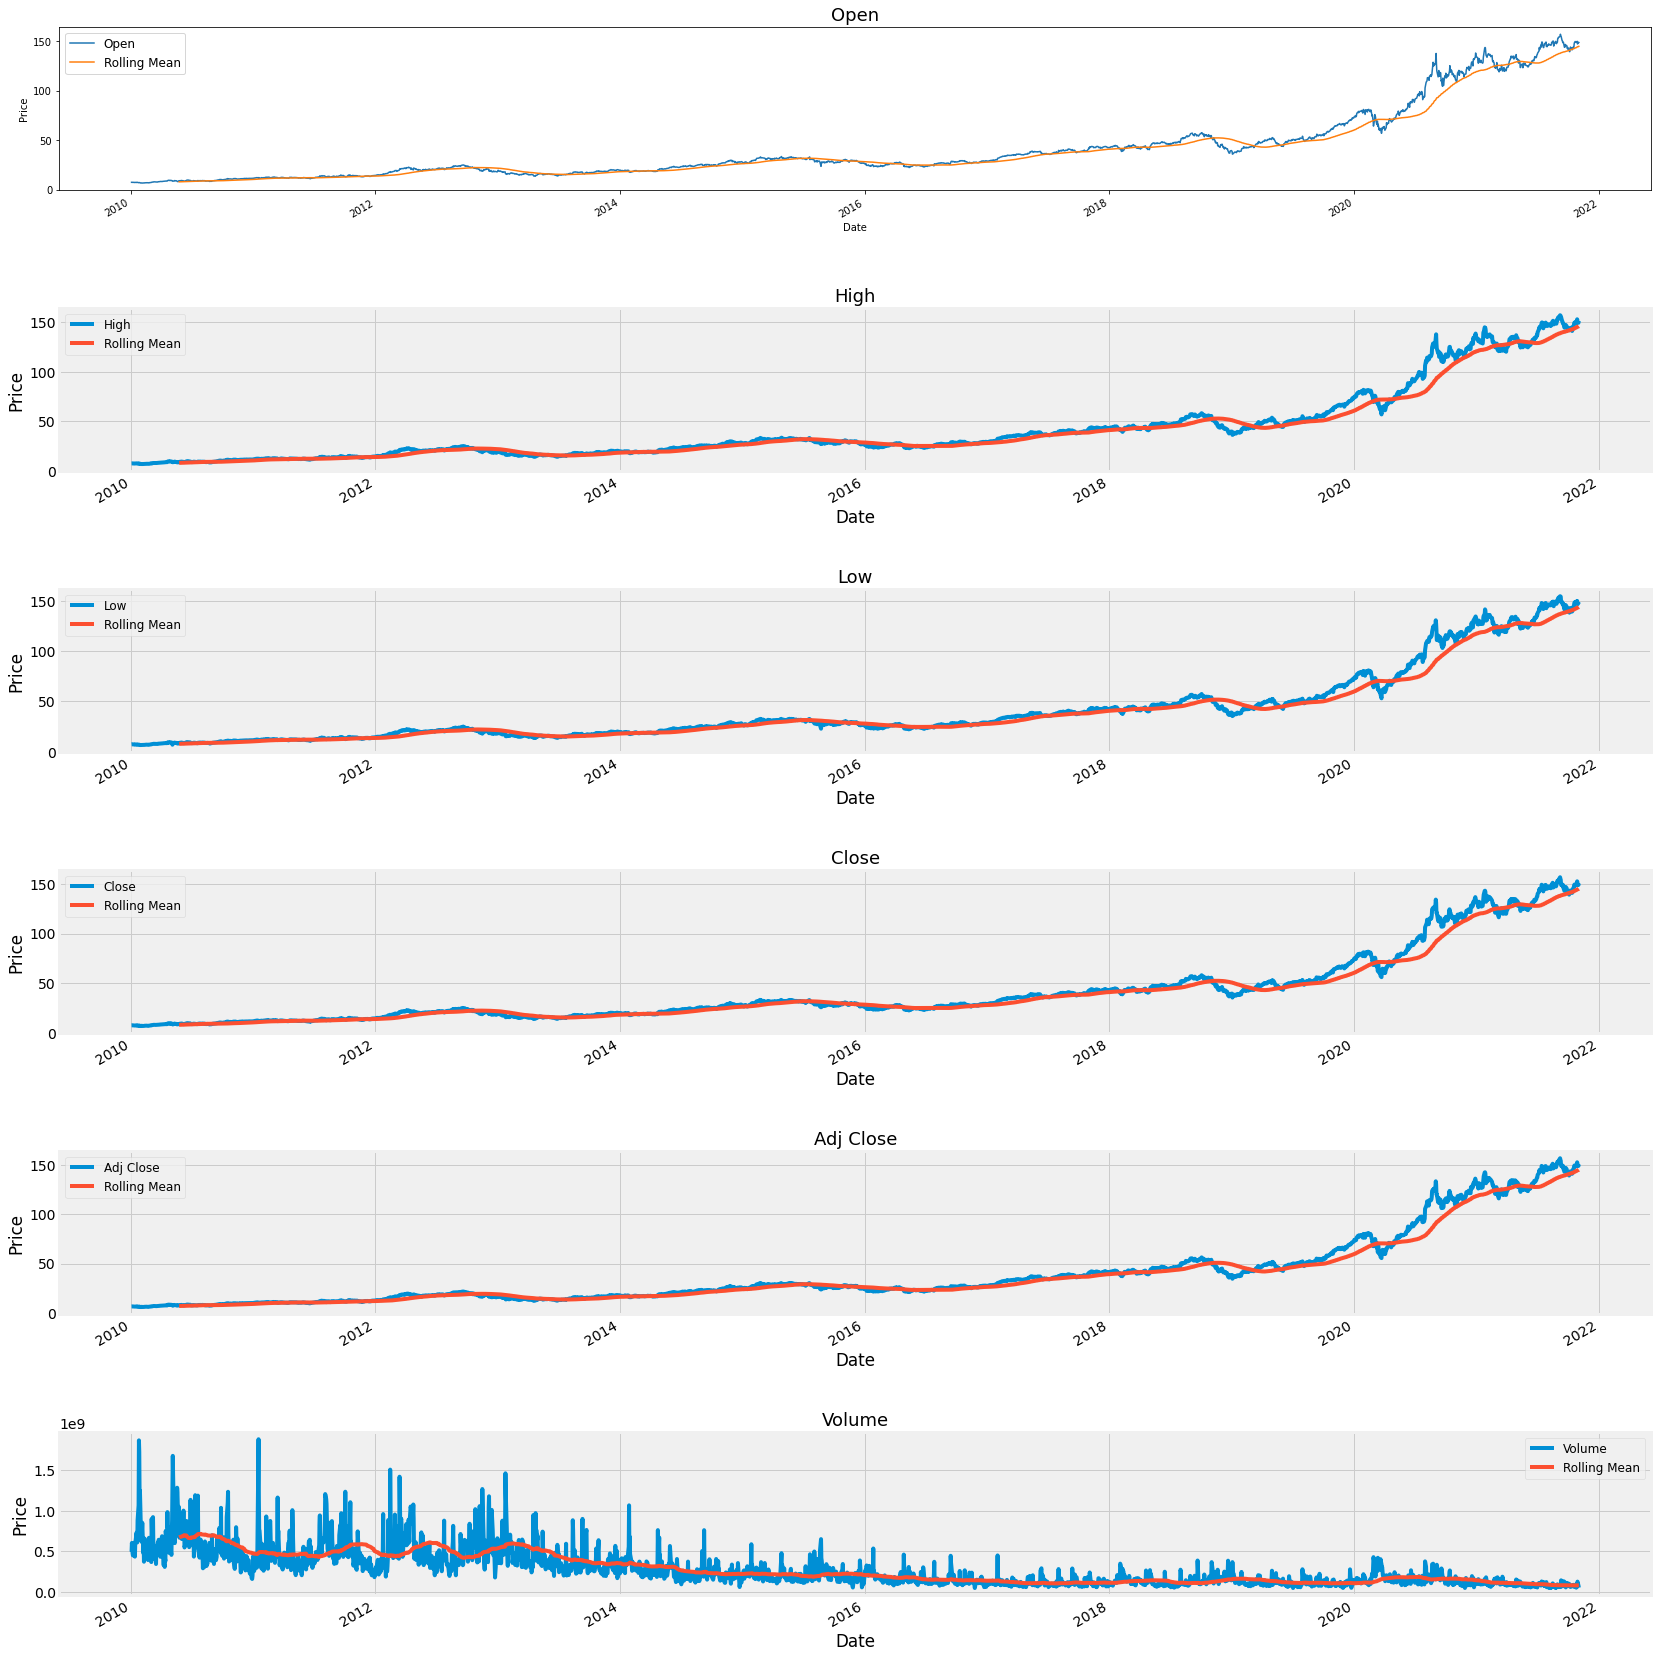

In [ ]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

The provided code generates multiple line plots to visualize the price data for different variables within the DataFrame "data". The first line retrieves and stores the column names of the DataFrame. These column names represent the different variables or attributes of the data. Matplotlib is used to create the figure object. The specified figure size of 24 inches by 24 inches ensures that the resulting plots will have sufficient space for clear visibility and readability. The loop iterates six times, indicating the number of variables to plot. Within each iteration, the code performs the following steps: The "fig.add_subplot(6,1,i+1)" function is used to add a new subplot to the figure. This creates a vertical arrangement of subplots, with each subplot representing a different variable. Data values are plotted using "ax.plot(data.iloc[:,i], label=col_names[i]). This line plot represents the price data for the specific variable. The rolling mean is calculated and plotted using "data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean'). This adds a line plot that represents the rolling mean of the variable, using a window size of 100. The title, x-axis label, and y-axis label are set using "ax.set_title()", "ax.set_xlabel()", and "ax.set_ylabel()". These labels provide clear descriptions for each subplot, aiding in understanding the information being presented. Each subplot is customized. As part of this, "ax.patch.set_edgecolor('black')" is used to set the edge color of the subplot, "plt.style.context('fivethirtyeight')" is used to apply a specific visual style, and "plt.legend(prop=['size': 12])" is used to set the global plot style. "fig.tight_layout(pad=3.0)" adjusts the spacing between subplots, enhancing readability by reducing overlapping elements after completing the loop, ensuring consistency across all subplots. Finally, "plt.show()" is called to display the generated plot, which displays the multiple line plots for the variables within the "data" DataFrame. In summary, the provided code generates multiple line plots to visualize the price data for different variables within the DataFrame. A "data set". Variables are represented by line plots, accompanied by a subplot title, x-axis and y-axis labels, and customization options. A clear and organized visualization of the price data is provided by the line plots for the variables.

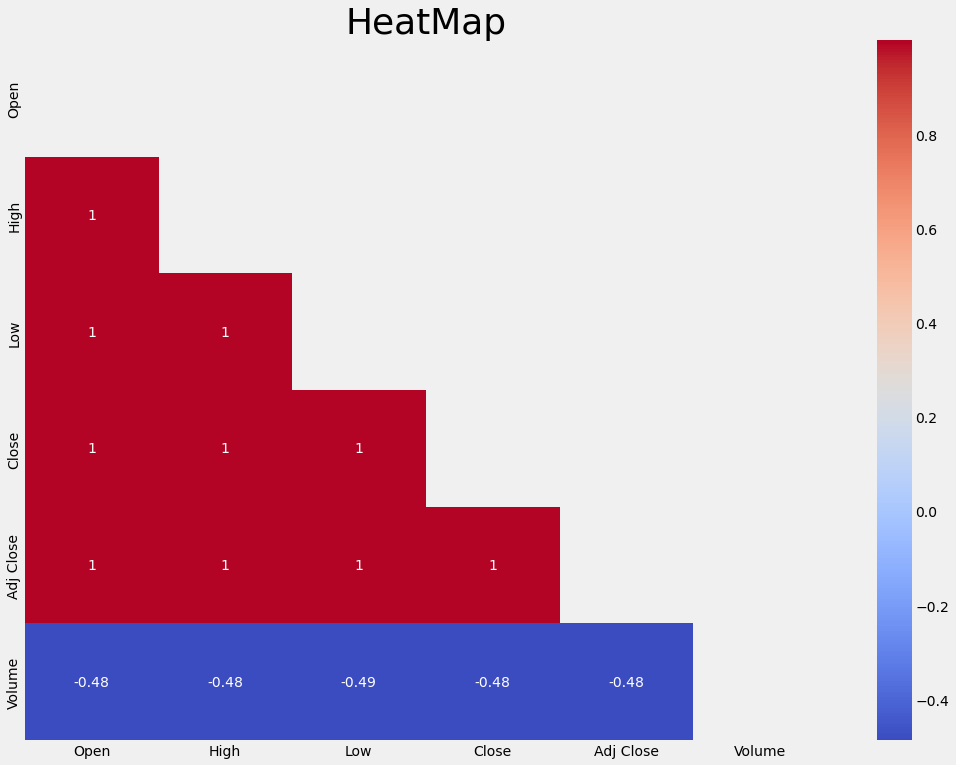

In [ ]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

This code generates a heatmap to visualize the correlations between features (variables) in the DataFrame "data" and check for multicollinearity. It creates a 16 x 12 figure object using matplotlib. This ensures that the resulting heatmap has an appropriate size for clear visibility. The next line creates a correlation matrix. This matrix represents the pairwise correlations between all the features in the "data" DataFrame. It is obtained by applying the "np.triu()" function to the correlation matrix. This is done to create a mask for the heatmap, as the lower triangular part is redundant due to the matrix's symmetry. The heatmap is then generated using the "sns.heatmap()" function. By adding numeric values as annotations to the heatmap cells, "annot=True" represents the correlations between the features. The "annot_kws={"size":14}" parameter sets the font size for the annotations. The "mask=matrix" parameter masks the lower triangular part of the heatmap. The upper triangular part of the heatmap is hidden, focusing on the correlations. By specifying the parameter "cmap='coolwarm'", positive and negative correlations are represented with the coolwarm color scheme. A number of adjustments are made to the plot, including setting the tick label size with "ax.tick_params(labelsize=14)", increasing the font scale with "sns.set(font_scale=3)", and setting the plot title with "HeatMap" As a final step, "plt.show()" is called to display the heatmap generated by "ax.set_title('HeatMap')" and "plt.style.use('fivethirtyeight')". To visualize correlations between features in the DataFrame "data" and identify potential multicollinearities, this code generates a heatmap using seaborn and matplotlib. Annotations indicate the strength of the correlations on the heatmap, which is colored-coded. As a result, it is possible to easily assess the interdependencies between features and identify variables that may be highly correlated, which can affect the accuracy and interpretability of certain statistical models.

In [ ]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

This code creates a new DataFrame called "data_feature_selected" by removing specific columns from the original DataFrame "data". Columns are removed using the "drop()" function. Columns to be dropped are specified using the "labels" parameter, which is set to ['Open', 'High', 'Low', 'Close', 'Volume']. These column labels represent the columns that need to be removed. By specifying "axis=1", the operation will be performed along the column axis. This means that the specified columns will be dropped from the DataFrame. This code removes the columns ('Open', 'High', 'Low', 'Close', 'Volume') from the original DataFrame. The resulting DataFrame, "data_feature_selected", contains all the remaining columns from the original DataFrame except for the dropped columns.

When certain columns are not required for a particular analysis or modeling task, this operation can be useful when focusing on a subset of features. By creating a DataFrame with only the desired columns, you are able to create a more streamlined and focused dataset for further analysis or modeling.

In [ ]:
col_order = ['Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

Adj Close
Date                  
2010-01-04    6.562589
2010-01-05    6.573936
2010-01-06    6.469368
2010-01-07    6.457407
2010-01-08    6.500340
...                ...
2021-10-27  148.850006
2021-10-28  152.570007
2021-10-29  149.800003
2021-11-01  148.960007
2021-11-02  150.580002

[2980 rows x 1 columns]

This code reorders the columns in the DataFrame "data_feature_selected" to have a specific column order based on the list of column names provided. In the first line, the variable "col_order" is set to ['Adj Close']. This list contains the names of the columns in the desired order. The second line rearranges the columns in "data_feature_selected" according to the specified order. The "columns=col_order" parameter ensures that the columns are reindexed according to the order specified in the "col_order" list. With this code, the first (and only) column will be 'Adj Close'. The resulting DataFrame, "data_feature_selected", will have its columns rearranged to match the desired order. It can be useful when manipulating a DataFrame's column order. The column sequence can be customized to meet specific requirements. The code ensures that the first column in the DataFrame is 'Adj Close'.

In [ ]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

To convert daily data to monthly data, this code resamples the 'Adj Close' column of the DataFrame "data_feature_selected". The resampling is done by aggregating the daily data using the mean value. "monthly_mean" is the result of the resampling operation. This variable will store the resampled data. The second line of code applies the resampling operation using the "resample()" function. 'M' indicates that the data should be resampled monthly by passing it to the function. The 'mean()' function is chained to the 'resampling' operation, indicating that the resampled values should be computed as the mean of the data within each month period. Executing this code resamples the 'Adj Close' data from a daily to a monthly frequency in the DataFrame "data_feature_selected". The resulting "monthly_mean" variable will contain the mean value of the 'Adj Close' for each month. Data resampling can be useful when finer or coarser temporal resolution is required. The code converts the daily data into a monthly average in this case. For analysis and modeling purposes, this can be useful for summarizing the data over longer time periods, identifying trends, or reducing the dimensionality of the dataset.

In [ ]:
monthly_data = monthly_mean.to_frame()
monthly_data

Adj Close
Date                  
2010-01-31    6.369562
2010-02-28    6.096047
2010-03-31    6.850866
2010-04-30    7.701438
2010-05-31    7.711035
...                ...
2021-07-31  144.922394
2021-08-31  148.137819
2021-09-30  148.306190
2021-10-31  145.563809
2021-11-30  149.770005

[143 rows x 1 columns]

This code converts the pandas Series "monthly_mean" into a DataFrame called "monthly_data" while preserving the index of the original Series. It assigns the result of the conversion to the variable "monthly_data". This variable will store the converted DataFrame. The second line of code converts the pandas Series "monthly_mean" to a DataFrame using the "to_frame()" function. This function converts a Series object into a DataFrame with a single column, where the original index is retained. The result is a DataFrame named "monthly_data". The resulting DataFrame will have a single column containing the values from the Series, and the original index of the Series will be preserved as the index of the DataFrame. It is useful when working with DataFrames instead of Series. DataFrames can also be joined or merged with other DataFrames, methods specific to DataFrames can be accessed, or analysis and modeling tasks requiring tabular data structure can be performed.

In [ ]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

Adj Close  Year      Month  dayofweek  quarter
Date                                                       
2010-01-31    6.369562  2010    January     Sunday        1
2010-02-28    6.096047  2010   February     Sunday        1
2010-03-31    6.850866  2010      March  Wednesday        1
2010-04-30    7.701438  2010      April     Friday        2
2010-05-31    7.711035  2010        May     Monday        2
...                ...   ...        ...        ...      ...
2021-07-31  144.922394  2021       July   Saturday        3
2021-08-31  148.137819  2021     August    Tuesday        3
2021-09-30  148.306190  2021  September   Thursday        3
2021-10-31  145.563809  2021    October     Sunday        4
2021-11-30  149.770005  2021   November    Tuesday        4

[143 rows x 5 columns]

The provided code enhances the DataFrame "monthly_data" by adding several new columns that provide additional temporal information based on the index values. Year is one of the new columns. It allows for grouping and analysis of data at the yearly level, enabling insights into yearly trends and patterns. The 'Month' column presents month names in full-text (e.g., 'January', 'February', etc.). This column facilitates examination of the data at the monthly level, aiding in identifying any monthly patterns or seasonal effects. Each data point is accompanied by the corresponding day of the week. This column provides information about the specific day of the week associated with each data entry by formatting the index values. It can be used to analyze any recurring patterns or day-of-the-week effects in the data. For each data point, the 'quarter' column indicates the quarter of the year. It enables grouping and analysis of the data based on quarters, assisting in understanding any quarterly variations or trends. By executing this code, the DataFrame "monthly_data" is enhanced with these additional columns, enhancing temporal analysis. Each data entry is associated with a year, month, day of the week, and quarter. As a result of the expanded temporal information, more in-depth investigations can be conducted, allowing the identification of temporal patterns and relationships in data.

In [ ]:
from sklearn.model_selection import train_test_split as split
import itertools
warnings.filterwarnings("ignore")
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

This code imports various modules and libraries for data manipulation, visualization, and modeling tasks. In particular, the line "from sklearn.model_selection import train_test_split as split" imports the "train_test_split" function from "sklearn.model_selection". A machine learning model uses this function to split data into training and testing sets. The "import itertools" line imports the "itertools" module, which is useful for looping and iterating efficiently. The line "warnings.filterwarnings("ignore")" suppresses the display of warning messages during execution of the code.  The line "from IPython import display" imports the "display" module from the "IPython" library, which allows for rich media display and interaction in The line "from matplotlib import pyplot" imports the "pyplot" module from the "matplotlib" library, which provides a plotting interface that is similar to that of MATLAB. Using the "os" module, you can interact with the operating system, such as manipulating files and directories, using the "import os" module. With the line "import re," you can manipulate strings and pattern match using regular expression matching. "seaborn as sns" imports the "sns" module from the "seaborn" library, which allows for enhanced data visualizations. The line "import plotly.express as px" imports the "px" module from the "plotly.express" library, which provides a high-level interface for creating interactive plots. The line "import warnings" imports the "warnings" module, which allows for handling warning messages during code execution. "from matplotlib.patches import Patch" imports "Patch" from matplotlib.patches" imports the "Patch" class from Through the import of these modules and libraries, the code prepares the necessary tools and functionalities for data manipulation, visualization, and modeling.

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 ]),
 <a list of 7 Text major ticklabel objects>)

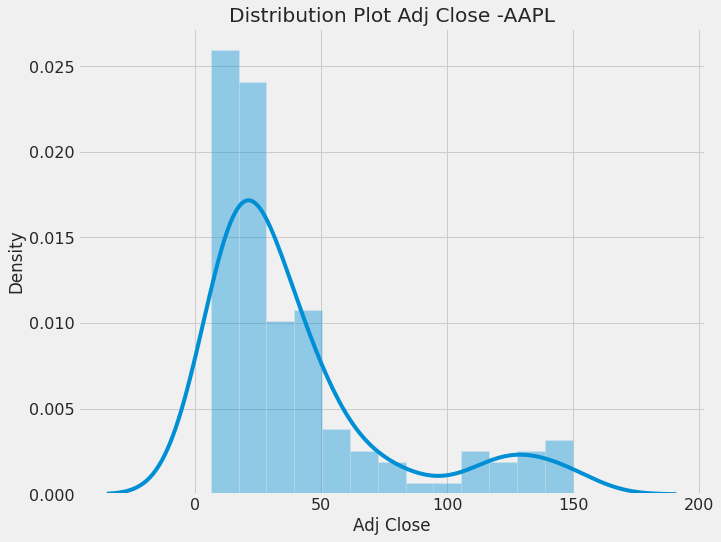

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
#ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

By using the "fig = plt.figure(figsize=(10,8))" line, a figure object with a specified size of 10 inches by 8 inches is created. This figure will be used to display a distribution plot. From the "monthly_data" DataFrame, we use the seaborn library to generate a distribution plot. As input data, the "sns.distplot()" function is called with the 'Adj Close' column. The resulting plot represents the distribution of the 'Adj Close' values and provides insights into their spread and shape. It is titled "Distribution Plot Adj Close -AAPL" using the "set_title()" function. This title provides a concise description of the plotted data and the company or asset it relates to (AAPL in this case). The following lines adjust the plot's styling. The "sns.set(font_scale=1)" line sets the font scale for the seaborn library, ensuring that the plot's text elements are displayed at an appropriate size.

A line like "plt.xticks(fontsize=16)" or "plt.yticks(fontsize=16)" specifies the font size for the x-axis tick labels and y-axis tick labels, respectively. This adjustment enhances the readability of the tick labels by increasing their font size. The figure below shows a distribution plot of the 'Adj Close' values from the "monthly_data" DataFrame. It is titled "Distribution Plot Adj Close -AAPL" and is styled with appropriate font sizes for the text elements and tick labels, improving its visual appeal.

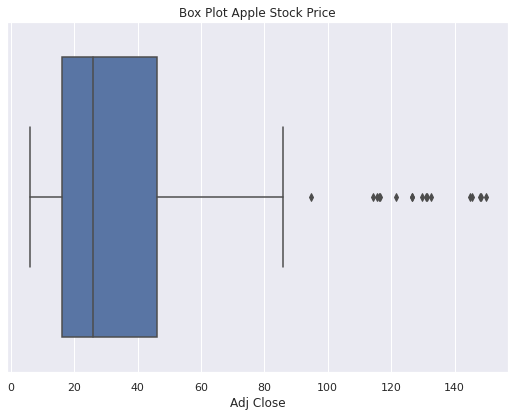

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

Using "fig = plt.figure(figsize=(8,6))," this code creates a figure object with a size of 8 inches by 6 inches. This figure will be used to display a box plot. The seaborn library is used to generate a box plot from the "monthly_data" DataFrame. Data from the 'Adj Close' column is passed to the "sns.boxplot()" function. The resulting plot displays the distribution of the 'Adj Close' values through the use of a box and whisker representation. Its title is set to "Box Plot Apple Stock Price" by using the "set_title()" function. This title provides a descriptive label for the plotted data, specifying that it pertains to the stock price of Apple. "plt.style.context('fivethirtyeight')" is used to apply a specific visual style to the plot. The "fivethirtyeight" style mimics the visual aesthetics of the popular FiveThirtyEight data journalism website. It enhances the plot's appearance with a distinctive and visually appealing style. This code displays a box plot of the 'Adj Close' values from the "monthly_data" DataFrame. Stock prices are plotted to visualize key statistical measures such as medians, quartiles, and outliers. It is titled "Box Plot Apple Stock Price" and styled in the "fivethirtyeight" style, which enhances its visual appeal.

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

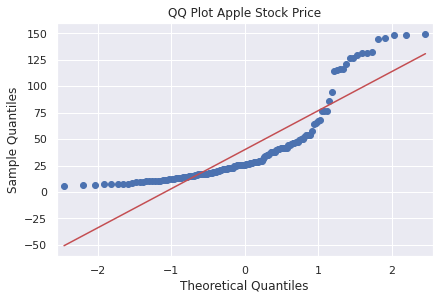

In [ ]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

This code generates a Q-Q plot to assess the normality of the distribution of the 'Adj Close' values from the "monthly_data" DataFrame. It uses the "qq()" function, which is likely imported from a library. Input data for the Q-Q plot is the 'Adj Close' column. The "line='s'' parameter specifies that a standardized line should be added to the plot, which aids in assessing the deviation from normality. A descriptive label for the plotted data is provided on the second line of code, "QQ Plot Apple Stock Price", indicating that it pertains to Apple's stock price. The value of the 'Adj Close' variable from the "monthly_data" dataframe is displayed as a Q-Q plot by executing this code. The Q-Q plot compares the quantiles of a dataset with the quantiles of a theoretical distribution, usually the normal distribution. Analyzing the data helps determine if it follows a normal distribution or if it deviates from it. "QQ Plot Apple Stock Price" illustrates the normality of Apple's stock price distribution.

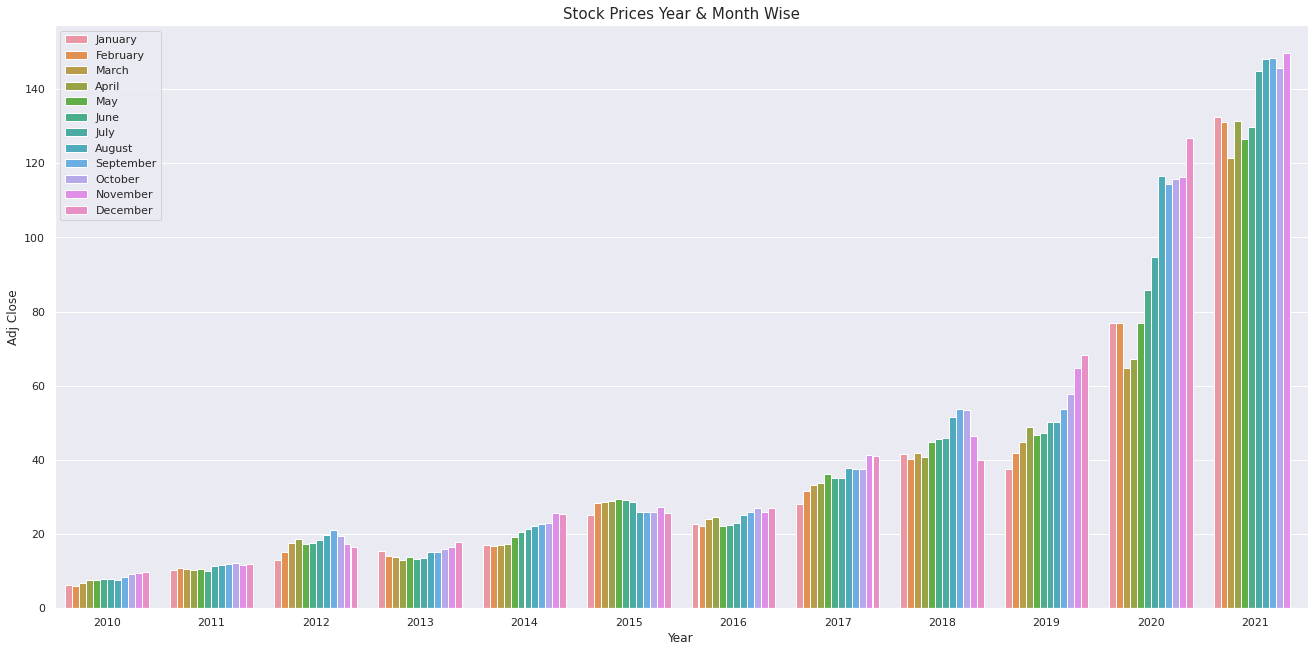

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

This code generates a grouped bar plot to visualize the stock prices year and month-wise from the "monthly_data" DataFrame. Fig, ax are initialized using "fig, ax = plt.subplots(figsize=(20,10)). This creates a plot figure with a specific size of 20 inches by 10 inches. The line "palette = sns.color_palette("mako_r", 4)" sets a custom color palette for the bars. The "mako_r" palette is used with 4 colors to provide a visually appealing and distinguishable color scheme. Next, the bar plot is created using "sns.barplot()". The 'Year' column is used as the x-axis variable, the 'Adj Close' column as the y-axis variable, and the 'Month' column is used to group and differentiate the bars. The data source is the "monthly_data" DataFrame. The line "a.set_title("Stock Prices Year & Month Wise",fontsize=15)" sets the title of the bar plot to "Stock Prices Year & Month Wise". This title provides a concise description of the plotted data and the variables represented in the plot. The line "plt.legend(loc='upper left')" adds a legend to the plot. The legend helps in identifying the different months represented by the bars.

Finally, "plt.show()" is called to display the generated bar plot.

By executing this code, a bar plot is generated that represents stock prices year- and month-by-year based on the "monthly_data" DataFrame. With a different color for each month, the plot compares the stock prices across different years and months. The plot title, "Stock Prices Year & Month Wise," describes the plot's content. The legend explains the different colors and months.

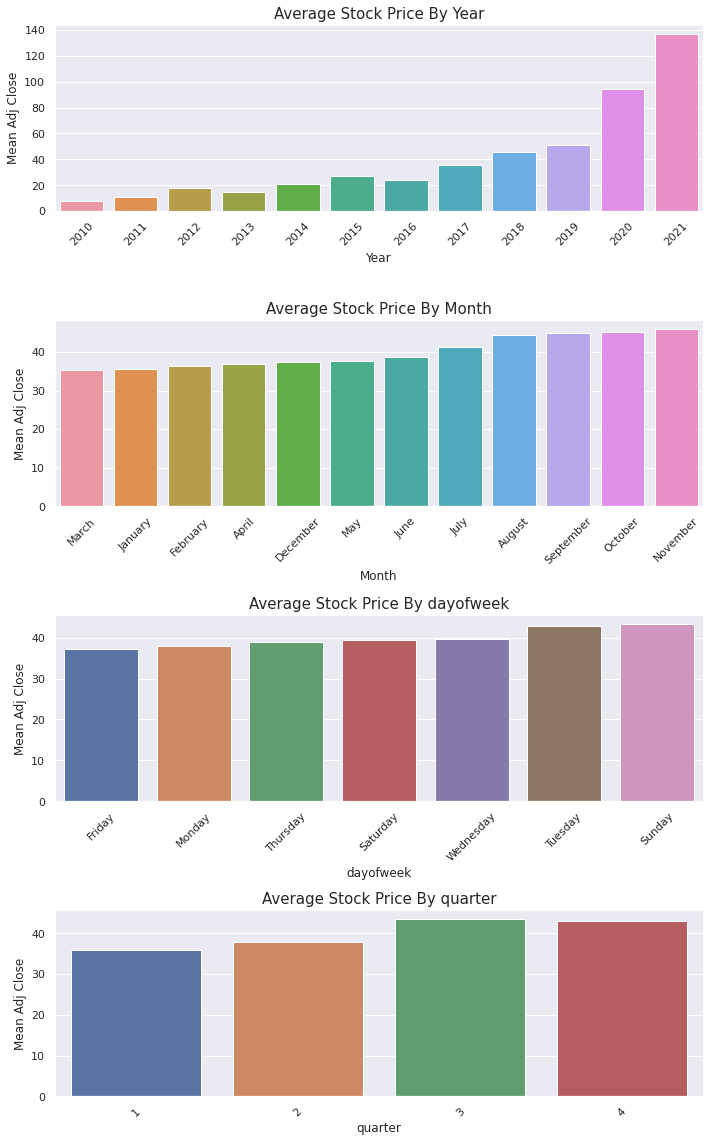

In [ ]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

Using the "monthly_data" DataFrame, this code generates a set of bar plots representing the average stock price according to a specific grouping variable. In the first line of code, "fig = plt.figure(figsize=(10,16))" is used to create a figure object with a size of 10 inches by 16 inches. This figure will contain the grouped bar plots. Its size is set to 10 inches by 16 inches by "fig.set_size_inches(10,16)". This ensures that the figure dimensions match the specified values. "group_cols" is assigned the column names of the "monthly_data" DataFrame. Starting with the second column, "group_cols[1:]" iterates through the grouping variables (columns). A subplot is created for each grouping variable using "fig.add_subplot(4,1,enum+1)" and assigned to the variable "ax". There will be four subplots arranged vertically if the subplot specification contains 4, 1 denoting a 4x1 grid. The "monthly_data" DataFrame is grouped by the current grouping variable and the mean of the 'Adj Close' column is calculated within each iteration to create a new DataFrame called "Aggregated". The resulting DataFrame is sorted based on the 'Adj Close' values. Next, we use the seaborn library to create a bar plot using "sns.barplot()". The "x" parameter represents the current grouping variable, the "y" parameter represents 'Adj Close', and the data source represents the "Aggregated" DataFrame. For each level of grouping variable, the resulting plot shows the average stock price. Each subplot has its own label and title, such as 'Mean Adj Close' for the x-label, 'Mean Adj Close' for the y-label, and 'Average Stock Price By []].format(str(i)), where "i" represents the current grouping variable. A line such as "plt.xticks(rotation=45)" rotates the x-axis tick labels 45 degrees to improve readability. The code ends here. Using this code, a set of grouped bar plots are displayed in a figure using "plt.tight_layout(pad=1)". From the "monthly_data" DataFrame, each plot represents the average stock price by a specific grouping variable. In each plot, the x-axis corresponds to the levels of the grouping variable, and the y-axis to the mean adjusted close price. Vertically arranged subplots are labeled with the respective grouping variable and a title indicating the average stock price by the variable. In the figure, the average stock prices are compared across different levels of each grouping variable, which helps understand the relationship between the variables and the stock prices.

<Figure size 1440x1152 with 0 Axes>

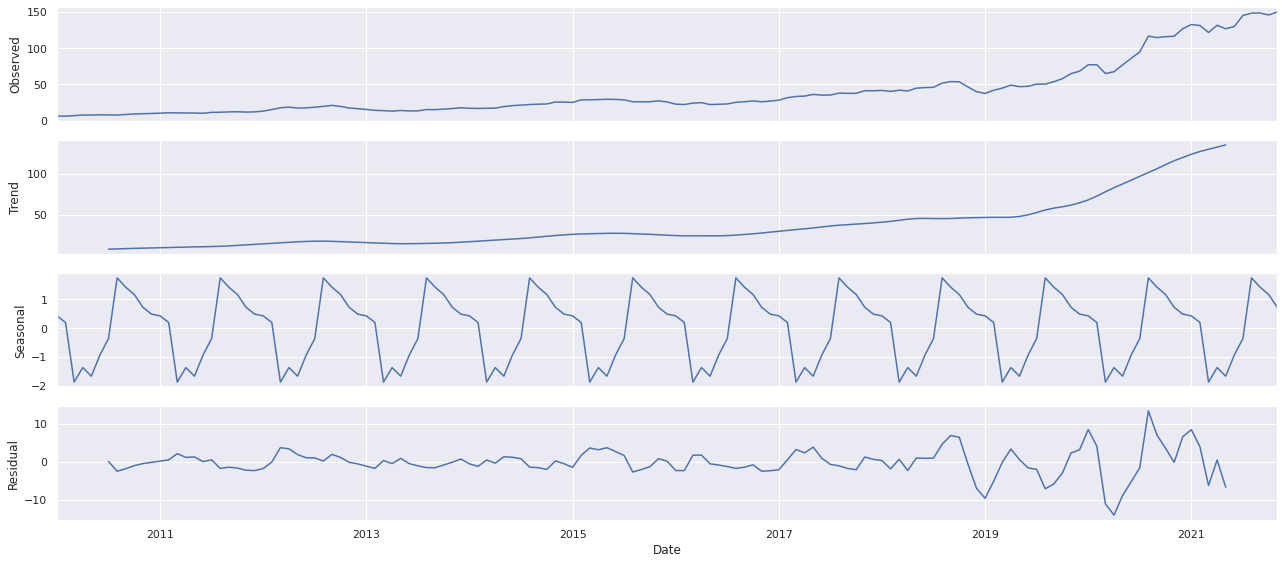

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive',freq=12)
decomposed_series.plot()
plt.show()

For the 'Adj Close' values from the "monthly_data" DataFrame, this code generates a time series decomposition plot. By setting the 'figure.figsize' parameter in the 'rcParams' dictionary to 18 inches in width and 8 inches in height, the first line of code modifies the default figure size. This ensures that subsequent plots will have the desired dimensions. By using "plt.figure(figsize=(20,16)), a new figure will be created with the desired dimensions. This figure will be used to display the time series decomposition plot. In the third line of code, the "sd()" function is used to decompose the time series. Decomposition is performed on the 'Adj Close' column from the "monthly_data" DataFrame. Using an additive model, the observed series is decomposed into trend, seasonality, and residuals. The "freq=12" parameter specifies that the series has a seasonal pattern with a frequency of 12 (indicating monthly data). The fourth line plots the decomposed series using the "plot()" function. This plot displays the original 'Adj Close' series along with the decomposed components, such as the estimated trend, seasonality, and residuals.

The final line of code displays the generated plot using "plt.show()".

Executing this code results in the figure of a time series decomposition. It provides insight into the underlying trend, seasonal patterns, and residual fluctuations of the 'Adj Close' series from the "monthly_data" DataFrame. Plots of this type are useful for identifying systematic patterns or irregularities in a time series.

In [ ]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

As part of the provided code, a function named "ad_fuller_func" determines whether a given time series is stationary or non-stationary by performing the Augmented Dickey-Fuller (ADF) test with the Statsmodels library.

The ADF test is a statistical test commonly used to assess the presence of a unit root in a time series. Having a unit root indicates that the time series is non-stationary, meaning it exhibits trends, seasonality, or other time-dependent characteristics. Conversely, the absence of a unit root suggests that the time series is stationary, indicating that it lacks any significant trends or patterns. "ad_fuller_func" takes X as an input time series. It applies the ADF test to the provided time series using the "adfuller()" function from the Statsmodels library. Several key results are displayed. The ADF statistic measures the strength of evidence against the null hypothesis of non-stationarity. Additionally, the p-value is printed, indicating the probability of observing the ADF statistic under the null hypothesis. Additionally, the critical values at different significance levels are shown. The function determines whether to reject or not to reject the null hypothesis based on the results. The function rejects the null hypothesis if the ADF statistic is less than the critical value at a significance level of 5%. When the ADF statistic exceeds the critical value, however, the function fails to reject the null hypothesis, indicating that the time series is not stationary. By using this function and providing a time series as input, users can determine the stationarity of the time series and make inferences about its behavior over time by applying the ADF test.

In [ ]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.739073
p-value: 0.998220
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho-Time Series is Non-Stationary


This code calls the previously defined function "ad_fuller_func" and passes the 'Adj Close' values from the "monthly_data" DataFrame as an argument.

To determine whether a time series is stationary or non-stationary, the "ad_fuller_func" function performs the Augmented Dickey-Fuller (ADF) test. In the ADF test, the presence of a unit root indicates non-stationarity of the series. This code applies the ADF test specifically to the "Adj Close" time series data from the "monthly_data" DataFrame by passing the 'Adj Close' values to the "ad_fuller_func" function. Upon execution, the function displays the ADF statistic, p-value, and critical values at different levels of significance. As a result of the ADF statistic less than the critical value at a significance level of 5%, it provides a conclusion about the stationarity of the time series.

By calling this code, users can assess the stationarity of the 'Adj Close' time series and make informed decisions about the analysis or modeling of the data.

As observed earlier, the time series is not stationary (trends and seasonality are present)


Text(0.5, 0, 'Lags')

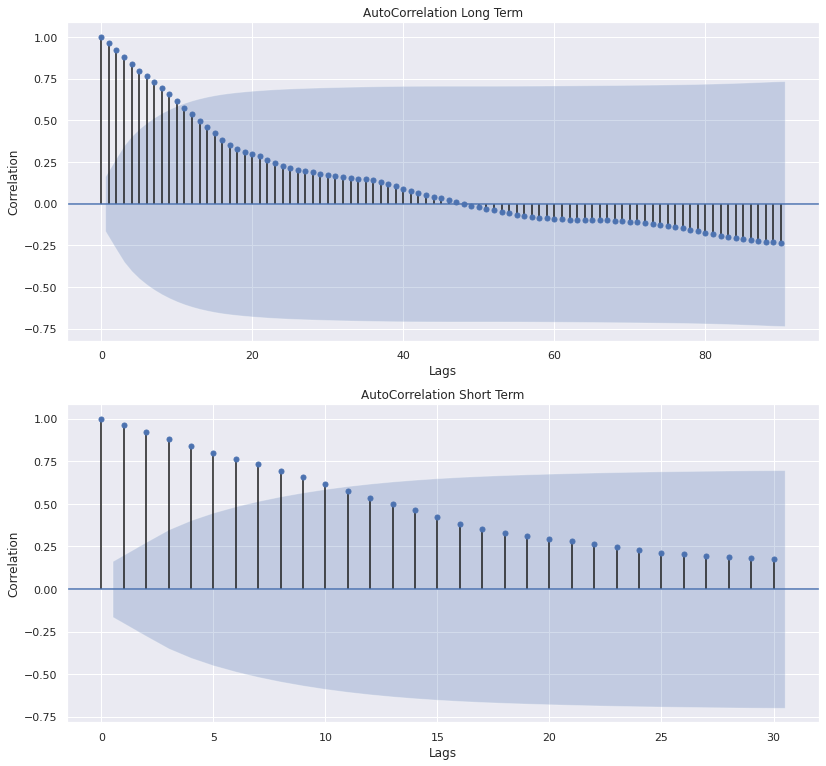

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')    # auto correction
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

This code generates two subplots within a single figure to visualize the autocorrelation of the 'Adj Close' values from the "monthly_data" DataFrame. The first line of code creates a figure with two vertical subplots. The variable names "ax1" and "ax2" are assigned to the axes objects of the two subplots. Next, the plot_acf() function is used to plot the autocorrelation function (ACF) for the adjusted close values. ACF measures the correlation between a time series and its lagged values. The ACF plot visualizes the correlation coefficients as a function of the lag. The first subplot uses "lags=90" to generate the ACF plot with a maximum lag of 90. This plot represents the long-term autocorrelation of the 'Adj Close' values.

The following line of code sets the title of the first subplot as "AutoCorrelation Long Term".

ACF plots are then generated again in the second subplot, but with a maximum lag of 30 using "lags=30". Following this line of code, the title of the second subplot is "AutoCorrelation Short Term". The plot represents the short-term autocorrelation of 'Adj Close' values. The code then sets the y-axis label as "Correlation" for both subplots and the x-axis label as "Lags." The result is that two subplots are displayed in one figure. In the first subplot, the long-term autocorrelation of 'Adj Close' values is shown, while in the second subplot, the short-term autocorrelation is shown. The plots show how the 'Adj Close' values correlate with their lagged values at different time lags. Correlation coefficients are depicted on the y-axis, and time lags are shown on the x-axis. This figure provides a visual representation of any significant correlation patterns or trends in the 'Adj Close' series.

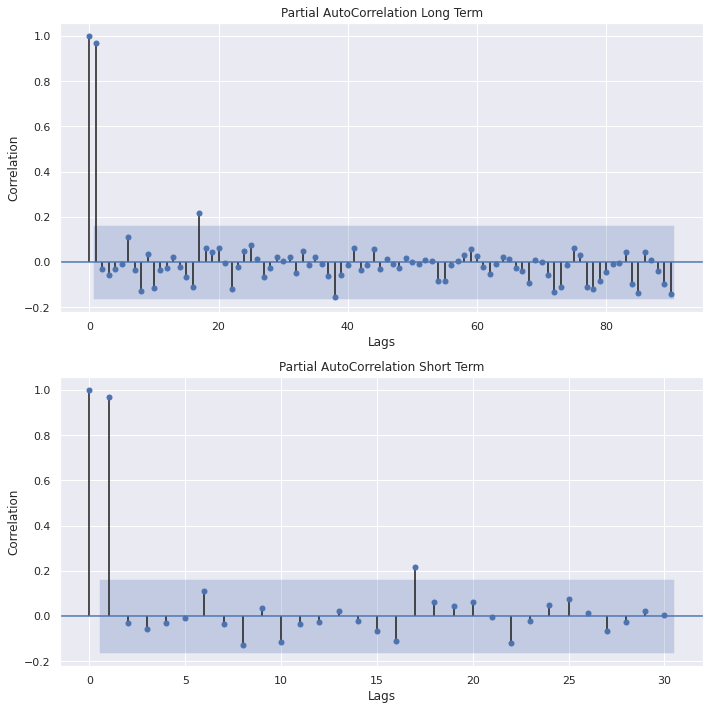

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

This code generates two subplots within a single figure to visualize the partial autocorrelation of the 'Adj Close' values from the "monthly_data" DataFrame. In the first line, the figure and axes objects are initialized, creating a figure with two subplots. The variable names "ax1" and "ax2" are assigned to the axes objects of the two subplots. Next, the "plot_pacf()" function is used to plot the partial autocorrelation function (PACF) of the 'Adj Close' values. The PACF measures the correlation between a time series and its lagged values while removing the correlation explained by shorter lags. The PACF plot for the first subplot is generated with a maximum lag of 90. The following line of code sets the title of the first subplot as "Partial AutoCorrelation Long Term" and represents the long-term partial autocorrelation of the 'Adj Close' values. A PACF plot is then generated again in the second subplot with a maximum lag of 30 with the "lags=30" parameter. This plot shows the short-term partial autocorrelation of the 'Adj Close' values. The next line of code sets the title of the second subplot as "Partial AutoCorrelation Short Term". For both subplots, the y-axis label is "Correlation" and the x-axis label is "Lags". This code adjusts the spacing between the subplots in order to avoid overlapping or crowding. By executing this code, two subplots are displayed within one figure. This first subplot shows the long-term partial autocorrelation of the 'Adj Close' values, while the second subplot shows the short-term partial autocorrelation. By accounting for shorter lags, these plots provide insight into the correlation between the 'Adj Close' values and their lagged values. Correlation coefficients are plotted on the y-axis, while time lags are plotted on the x-axis. As a result of the figure, the 'Adj Close' series can be visually examined for any significant partial autocorrelation patterns or trends.

In [ ]:
##Differencing By 1. To make it stationary
monthly_data['monthly_diff'] = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

This code performs differencing by 1 on the 'Adj Close' values from the "monthly_data" DataFrame to make the series stationary. Differencing is common in time series analysis to eliminate trends. Stationary series have constant statistical properties over time, which simplifies analysis and modeling. By subtracting lagged values from current values, we achieve differencing. The ".shift(1)" function shifts the 'Adj Close' series by 1 time period, creating a new series with values that represent the difference between the current 'Adj Close' value and the previous 'Adj Close' value. In the "monthly_data" DataFrame, a new column named 'monthly_diff' is assigned to the resulting differenced series. This column contains the differenced values of the 'Adj Close' series, reflecting the changes between consecutive periods. This code converts the 'Adj Close' series to a stationary series. The assumption of stationarity is often desirable for further analysis, such as modeling or forecasting.

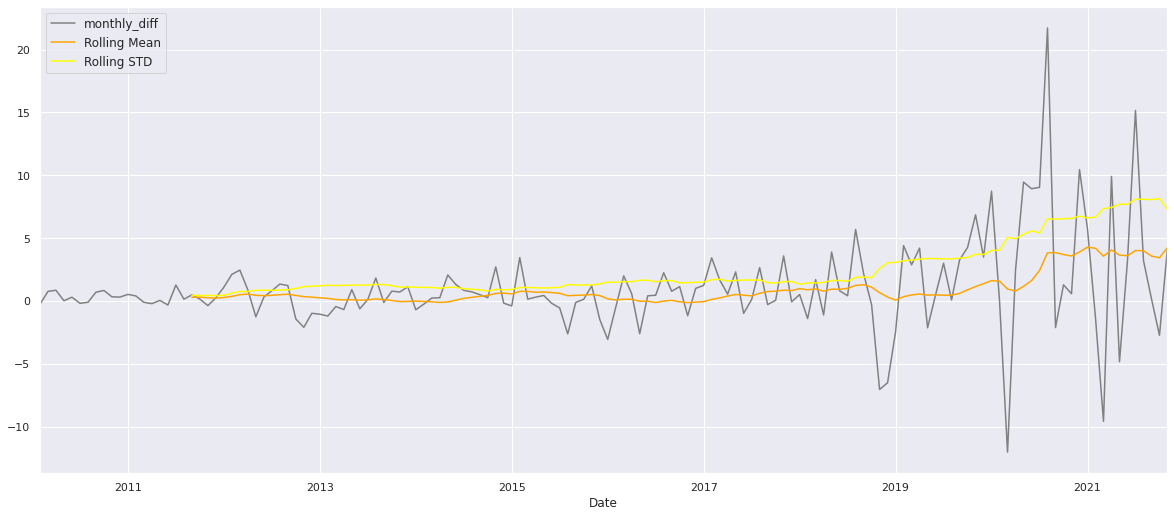

In [ ]:
monthly_data['monthly_diff'][1:].plot(c='grey')
monthly_data['monthly_diff'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_data['monthly_diff'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

To visualize the differenced series, rolling mean, and rolling standard deviation of the 'monthly_diff' values from the "monthly_data" DataFrame, this code generates a line plot.

The first line of code plots the 'monthly_diff' values starting from the second index (excluding the first NaN value) using the ".plot()" function. The 'c' parameter is set to 'grey' to specify the color of the line. The second line plots the rolling mean of 'monthly_diff'. ".rolling(20).mean()" computes the rolling mean using a window size of 20, which averages the previous 20 values. The resulting rolling mean values are plotted with the label 'Rolling Mean' and the color 'orange'. The rolling standard deviation is plotted in the third line of code. The ".rolling(20).std()" function calculates the rolling standard deviation with a window size of 20, which calculates the standard deviation of the previous 20 values. The resulting rolling standard deviation values are plotted with the label 'Rolling STD' and the color 'yellow'. The fourth line of code adds a legend to the plot. The legend displays the labels 'Rolling Mean' and 'Rolling STD', allowing for easy identification of the plotted lines. Executing this code generates a line plot that visualizes the 'monthly_diff' series, its rolling mean, and rolling standard deviation. Using this plot, you can analyze the trend, variability, and changes in the differenced series over time. For further analysis or interpretation, the rolling mean and rolling standard deviation can be used to identify patterns or fluctuations in the differenced series.

In [ ]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_data['monthly_diff'][1:])

ADF Statistic: -1.856669
p-value: 0.352712
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho-Time Series is Non-Stationary


This code applies the Augmented Dickey-Fuller (ADF) test to the differenced time series stored in the 'monthly_diff' column of the "monthly_data" DataFrame, excluding the first NaN value.

Using the ADF test, one can determine whether a time series is stationary or non-stationary. A stationary series exhibits constant statistical properties over time, while a non-stationary series exhibits trends, seasonality, or other time-dependent characteristics. This code performs the ADF test on the differenced series by calling the "ad_fuller_func" function and passing the 'monthly_diff' values (excluding the first NaN) as input. The ADF test computes the ADF statistic, p-value, and critical values, which are then printed as the output. The ADF statistic measures the strength of evidence against the null hypothesis. Under the null hypothesis, the p-value represents the probability of observing the ADF statistic. The critical values help determine the rejection or acceptance of the null hypothesis. Printed results demonstrate whether the differenced series is stationary. The ADF statistic should be lower than the critical value at a certain significance level (e.g., 5%) in order to reject the null hypothesis of non-stationarity. Alternatively, if the ADF statistic is higher than the critical value, it is not rejected, implying that the differenced series is non-stationary.

By running this code and examining the ADF test results, users can assess the stationarity of the differenced time series and make informed decisions about subsequent analysis or modeling tasks.

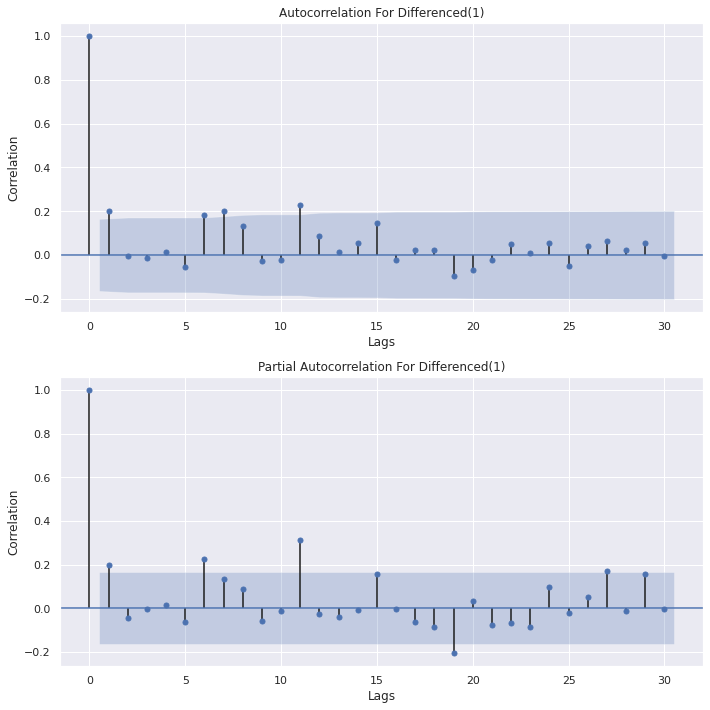

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_data['monthly_diff'][1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_data['monthly_diff'][1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

This code generates two subplots within a single figure to visualize the autocorrelation and partial autocorrelation of the differenced series, specifically the 'monthly_diff' values from the "monthly_data" DataFrame, excluding the first NaN value.

In the first line of code, the figure and axes objects are initialized, creating two vertical subplots in the figure. The variable names "ax1" and "ax2" are assigned to the axes objects of the two subplots. The "plot_acf()" function is used to plot the autocorrelation function (ACF) of the differenced series. Monthly_data['monthly_diff'][1:] selects the differenced series values, excluding the first NaN. For the ACF plot, the "lags=30" parameter specifies a maximum lag of 30. The resulting ACF values are plotted in the first subplot. After that, the partial autocorrelation function (PACF) of the differenced series is plotted using the "plot_pacf()" function. In the second subplot, the PACF plot is generated with a maximum lag of 30. Both subplots are titled "Autocorrelation For Differenced(1)" and "Partial Autocorrelation For Differenced(1)", according to the code. Furthermore, the y-axis labels of both subplots are set as "Correlation", while the x-axis labels are set as "Lags". Finally, by using the "plt.tight_layout(pad=1)" command, the spacing between the subplots is adjusted to avoid overlapping or crowding. This code displays two subplots within a single figure. The first subplot displays the autocorrelation of the differenced series, while the second subplot displays the partial autocorrelation. These plots illustrate the correlation between differenced values and lagged values at different time lags. Correlation coefficients are shown on the y-axis, and time lags are shown on the x-axis. Using the figure, you can examine any significant autocorrelation or partial autocorrelation patterns in the differenced series.

In [ ]:
from statsmodels.tsa.stattools import kpss

In this code, we import the "kpss" function from the "statsmodels.tsa.stattools" module. 

In the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, the "kpss" function is used to test for stationarity. The KPSS test is an alternative to the Augmented Dickey-Fuller (ADF) test and provides insights into the trend stationarity of a series. The KPSS test can be applied to time series data by importing the "kpss" function. KPSS tests determine whether a given time series exhibits unit root non-stationarity or is stationary around a deterministic trend. When a time series is imported, the "kpss" function can be used to perform the KPSS test, calculate the test statistic, p-value, and critical values, and determine the series' stationarity. The KPSS test can be applied to time series data using this code snippet, enabling analysis and assessment. A series' stationarity properties.

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(monthly_data['monthly_diff'][1:])

KPSS Statistic: 0.528477963970444
p-value: 0.035252710817467565
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


A function called "kpss_test" is defined in this code that performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test. The function takes a series as input and conducts the KPSS test to assess the stationarity of the series. It invokes the "kpss" function from the "statsmodels.tsa.stattools" module. This function calculates the KPSS statistic, p-value, number of lags, and critical values based on the input series. As a result, the code prints the calculated statistics and critical values. KPSS measures the strength of evidence against the null hypothesis of stationarity. Under the null hypothesis, the p-value represents the probability of obtaining the observed KPSS statistic. Lagged differences are included in the test based on the number of lags. The critical values provide thresholds for interpreting the test statistic at different significance levels. Finally, the code prints a summary message indicating whether the series is stationary. The series is considered stationary if the p-value is less than 0.05 (the chosen significance level). A series is considered non-stationary if its p-value is greater or equal to 0.05. This code assesses the stationarity of the differenced series by using the "kpss_test" function with the 'monthly_diff' values (excluding the first NaN) from the "monthly_data" DataFrame as input. Based on the p-value, the function prints the test results and indicates if the series is stationar.

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(monthly_data['monthly_diff'][1:])

KPSS Statistic: 0.528477963970444
p-value: 0.035252710817467565
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In this code, a function called "kpss_test" is defined that performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on a given time series. In the KPSS test, a time series is tested for stationarity. This code imports the "kpss" function from the "statsmodels.tsa.stattools" module, which calculates the KPSS statistic, p-value, number of lags, and critical value using the "kpss" function. A series is passed into the "kpss_test" function along with any keyword arguments that can be passed to the underlying "kpss". It applies the KPSS test to the series by invoking the "kpss" function and storing the computed statistics and critical values. Based on the results of the test, the code formats and prints the KPSS statistic, p-value, number of lags, and critical values. The critical values represent thresholds at different significance levels for interpreting the test statistic. Based on the p-value, the function prints a summary message indicating whether the series is stationary or not. The series is considered stationary if the p-value is less than 0.05 (the significance level chosen). Otherwise, the series is considered non-stationary if its p-value exceeds 0.05. In order to assess the stationarity of the differenced series, this code calls the "kpss_test" function with the values from the "monthly_data" DataFrame (excluding the first NaN) as input. KPSS statistic, p-value, number of lags, critical values, and a statement indicating stationarity are all output by the function.

In [ ]:
from scipy import stats
from scipy.special import inv_boxcox
from typing import Tuple
import lightgbm as lgb
from datetime import timedelta

Various libraries and modules are used in this code to perform various operations. Let's break it down: First, import the "stats" module from the "scipy" library. This module provides various statistical functions and operations. The code then imports the "inv_boxcox" function from the "special" module. This function is used for inverse Box-Cox transformation, which is a method used for transforming non-normal data into approximately normal distributions. A "Tuple" class is imported as well. This class is used to define a tuple type, which is a collection of elements of different types. The code also imports the "lightgbm" library, which is a gradient boosting framework for machine learning. It provides an efficient implementation of the gradient boosting algorithm. In addition, the code imports the "timedelta" class from the "datetime" module. An interval or difference between two dates or times can be represented by this class. As a result of this code, you can do statistical computations, inverse Box-Cox transformations, machine learning with the lightgbm framework, and calculate time durations.

Make stationary by transforming 

In [ ]:
# Define power trnnsformations and their inverses
# Square root transformation
def square_root_transformation(x: pd.Series) -> pd.Series:
    return np.sqrt(x)

def square_root_inverse_transformation(x: pd.Series) -> pd.Series:
    return np.square(x)

# Cube root transformation
def cube_root_transformation(x: pd.Series) -> pd.Series:
    return x ** (1 / 3)

def cube_root_inverse_transformation(x: pd.Series) -> pd.Series:
    return x ** 3

# Log transformation
def log_transformation(x: pd.Series) -> pd.Series:
    # Function np.log1p = log(x + 1)
    return np.log1p(x)

def log_inverse_transformation(x: pd.Series) -> pd.Series:
    # Function np.expm1(x) = exp(x) - 1
    return np.expm1(x)

# Box-cox transformation
def box_cox_transformation(x: pd.Series) -> Tuple[np.array, float]:
    x_transformed, lambda_value = stats.boxcox(x)
    return x_transformed, lambda_value
    
def box_cox_inverse_transformation(x: pd.Series, lambda_value: float) -> pd.Series:
    return inv_boxcox(x, lambda_value)

The code defines a set of power transformations and their inverses. These transformations are applied to a pandas Series object (denoted as `x`), which represents a column or a one-dimensional array of data. There are four different power transformations available. These transformations are commonly used in data analysis and statistical modeling to modify the distribution and scale of the data. For example, the square root transformation calculates each value using the `np.sqrt()` function. To reduce the impact of large values and make the distribution more normal, this transformation is useful. The inverse transformation for square root takes the squared value of each element in the Series using the `np.square()` function, effectively reversing the square root transformation.

The cube root transformation raises each value in the Series to the power of 1/3 using the exponentiation operator `**`. For data with extreme values, this transformation helps reduce the impact of both large and small values. The inverse transformation for the cube root raises each value in the Series to the power of 3 using the exponentiation operator `**`, effectively reversing the cube root transformation.

The log transformation applies the natural logarithm (base e) to each value in the Series using the `np.log1p()` function. It is commonly used for data with skewed distributions and a wide range of values. To avoid errors when the input values are close to zero, the "np.log1p()" function is used instead of "np.log()". The inverse transformation for log applies the exponential function minus one (`np.expm1()`) to each value in the Series, effectively reversing the log transformation.

In the Box-Cox transformation, the lambda value is determined to maximize the normality of the data by finding the optimal lambda value. Scipy's statistics.boxcox() function is used to apply it to the Series. As a tuple, the transformed data and lambda value are returned. A Box-Cox inverse transformation is performed using the `inv_boxcox()` function from the `scipy.special` module. For obtaining the inverse transformed data, it takes both the original Series and the lambda value as arguments. It contains a collection of power transformations and their inverses that can be used to manipulate and normalize data in various statistical and analytical applications. By preprocessing and transforming data, data scientists and analysts can improve the interpretability and performance of statistical models and machine learning algorithms.

In [ ]:
monthly_data.reset_index(inplace=True)

An index is reset in a pandas DataFrame called 'monthly_data' with this line of code. 

DataFrames are uniquely identified by their indexes in Pandas. The index is by default a sequence of integers starting at 0. However, in some cases, the index may not be sequential or may not provide meaningful information. Resetting the index of a DataFrame means replacing the existing index with a new sequential index with the reset_index() function. The `inplace=True` argument ensures that the modification is made directly to the `monthly_data` DataFrame without creating a new DataFrame. The rows of the DataFrame are assigned a new index starting at 0 and increasing by 1. This can be useful when the original index does not provide meaningful information or when we want to reorganize the DataFrame for further analysis or processing.

After applying this line of code, the `monthly_data` DataFrame will have a new sequential index, allowing for easier referencing and manipulation of the data.

In [ ]:
monthly_data['square_root_transformation_demand'] = monthly_data['Adj Close'].apply(lambda x: square_root_transformation(x))

# Apply the inverse square root transformation
monthly_data['square_root_inv_transformation_demand'] = monthly_data['square_root_transformation_demand'].apply(lambda x: square_root_inverse_transformation(x))

# Cube Root
monthly_data['cube_root_transformation_demand'] = monthly_data['Adj Close'].apply(lambda x: cube_root_transformation(x))

# Apply the inverse square root transformation
monthly_data['cube_root_inv_transformation_demand'] = monthly_data['cube_root_transformation_demand'].apply(lambda x: cube_root_inverse_transformation(x))

# Log Root
monthly_data['log_transformation_demand'] = monthly_data['Adj Close'].apply(lambda x: log_transformation(x))

# Apply the inverse square root transformation
monthly_data['log_inv_transformation_demand'] = monthly_data['log_transformation_demand'].apply(lambda x: log_inverse_transformation(x))


This code applies different transformations to a specific column, 'Adj Close', in a pandas DataFrame called 'monthly_data', and stores the transformed values in new columns. We begin with the square root transformation. Each value in the 'Adj Close' column is transformed using the 'square_root_transformation' function. The resulting transformed values are then stored in a new column called 'square_root_transformation_demand'. The inverse square root transformation is then applied to the values in the 'square_root_transformation_demand' column. Each value in the column is transformed using the 'square_root_inverse_transformation' function. A new column called 'square_root_inv_transformation_demand' stores the inverse transformed values. A cube root transformation is also applied to the 'Adj Close' column and the transformed values are stored in the 'cube_root_transformation_demand' column. Following this, it applies the inverse cube root transformation to the values in the 'cube_root_transformation_demand' column, storing the results in the 'cube_root_inv_transformation_demand' column. In addition to applying the log transformation to the 'Adj Close' column, the code stores the transformed values in the 'log_transformation_demand' column. Lastly, it applies the inverse log transformation to the values in the 'log_transformation_demand' column and stores the results in the 'log_inv_transformation_demand' column. As a result of applying different power transformations and their inverse transformations to the 'Adj Close' column, this code computes and adds new columns to the 'monthly_data' DataFrame, containing the transformed values. As a result of these transformations, the data can be manipulated and normalized, making it more suitable for analysis and modeling.

In [ ]:
monthly_data

Date  ...  log_inv_transformation_demand
0   2010-01-31  ...                       6.369562
1   2010-02-28  ...                       6.096047
2   2010-03-31  ...                       6.850866
3   2010-04-30  ...                       7.701438
4   2010-05-31  ...                       7.711035
..         ...  ...                            ...
138 2021-07-31  ...                     144.922394
139 2021-08-31  ...                     148.137819
140 2021-09-30  ...                     148.306190
141 2021-10-31  ...                     145.563809
142 2021-11-30  ...                     149.770004

[143 rows x 13 columns]

The code refers to a pandas DataFrame named "monthly_data." This DataFrame likely contains monthly data for some analysis or processing. A DataFrame is a tabular data structure with rows and columns. DataFrames such as "monthly_data" may contain columns representing different attributes or variables of interest. The code does not provide details about the specific content or structure of the DataFrame, but it is assumed to contain data related to monthly observations. Depending on the data being analyzed, the DataFrame could include columns such as "Date," "Open," "Close," "High," "Low," and potentially other relevant columns as well. Each row in the DataFrame represents a specific month, and the columns hold the corresponding data for that month. Without knowing more about the DataFrame's content or context, it is difficult to provide a more detailed explanation. However, the "monthly_data" DataFrame allows manipulation, analysis, and visualization of the monthly data using pandas and other Python libraries.

In [ ]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline

This code adjusts the figure size and enables gridlines in a matplotlib plot. It sets figure size to 20 units wide and 10 units high. This ensures that the plot will have specific dimensions when displayed. For example, allowing gridlines on the plot will enable this. By setting this parameter to `True`, the gridlines will be displayed in the background of the plot, helping with the visualization and interpretation of the data. %matplotlib inline is a magic command specific to Jupyter Notebook and JupyterLab. It allows the plots to be displayed directly within the notebook interface, ensuring that the plots are shown inline with the code. It provides configuration settings to customize the appearance of matplotlib plots. It provides a specific figure size, gridlines, and the ability to display plots within Jupyter Notebooks and JupyterLabs.

In [ ]:
def plot_transformations(df: pd.DataFrame, transformation: str) -> None:
    # Get axes for multiple plots
    fig, axes = plt.subplots(nrows=1, ncols=3)
    
    # Original data
    monthly_data.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE, ax=axes[0], color='blue')
    
    # Transformed data
    transformed_column_name = f'{transformation}_transformation_demand'
    monthly_data.set_index('Date')[transformed_column_name].plot(figsize=FIGURE_SIZE, ax=axes[1], color='red')
    
    # Inverse Transformed data
    inverse_transformed_data = f'{transformation}_inv_transformation_demand'
    monthly_data.set_index('Date')[inverse_transformed_data].plot(figsize=FIGURE_SIZE, ax=axes[2], color='orange')

This code defines a function called `plot_transformations` that is used to plot different transformations of a specific column in a pandas DataFrame.

The function takes two parameters: `df`, which represents the DataFrame containing the data to be plotted, and `transformation`, which specifies the type of transformation to be visualized.

Within the function, the code creates a figure with three subplots using the `subplots()` function from matplotlib. This allows for multiple plots to be displayed side by side. The first subplot displays the original data. This function gets the 'Adj Close' column from the DataFrame, sets the 'Date' column as the index, and plots the values. This subplot is displayed with a blue color. The transformed data is displayed in the second subplot. Using the transformation parameter, it constructs the name of the transformed column and retrieves the corresponding column from the DataFrame. The plot() function is then used to plot the transformed values. This subplot is displayed with a red color. The third subplot represents inverse transformed data. By using the transformation parameter, it constructs the name of the inverse transformed column and retrieves the column's data from the dataframe. Using the plot() function, it plots the inverse transformed values. This subplot is displayed with an orange color.

In summary, the `plot_transformations` function generates a figure with three subplots, where each subplot displays a different aspect of the data: the original data, the transformed data based on the specified transformation, and the inverse transformed data. As a result, the effects of the chosen transformation can be visually compared and analyzed.

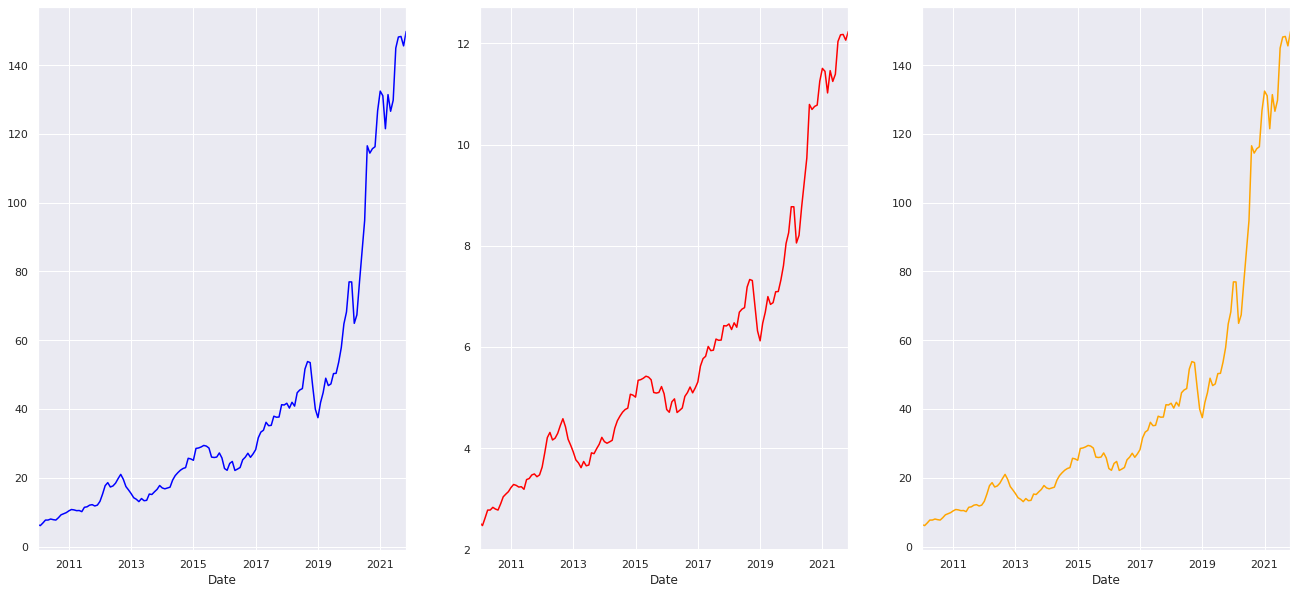

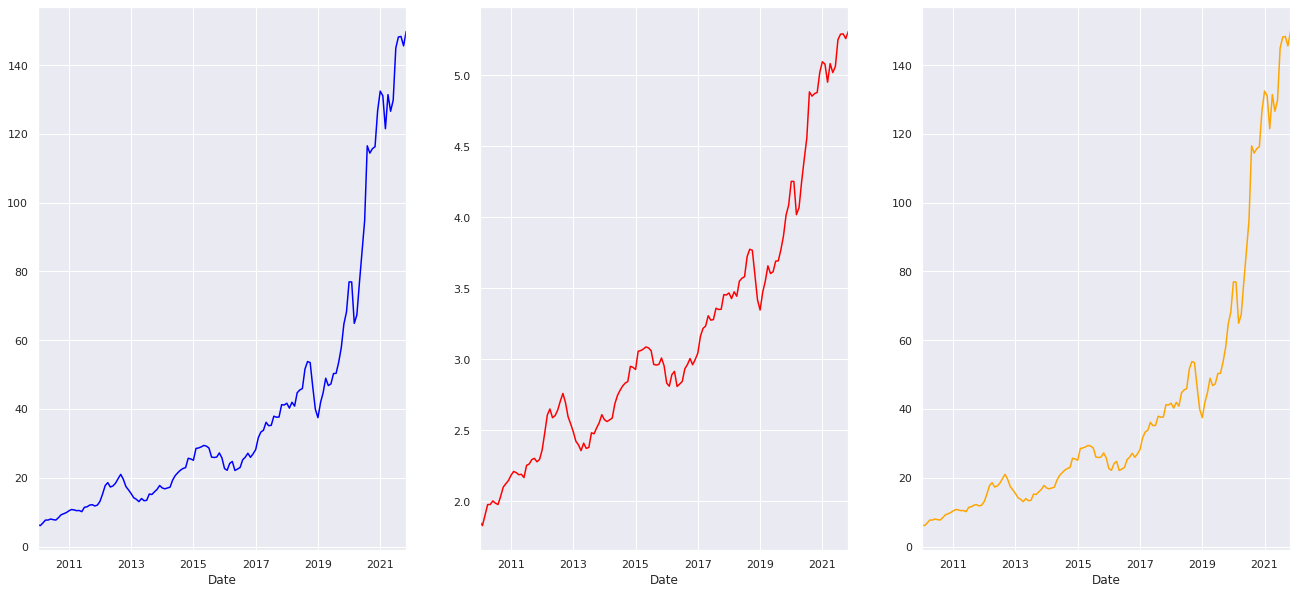

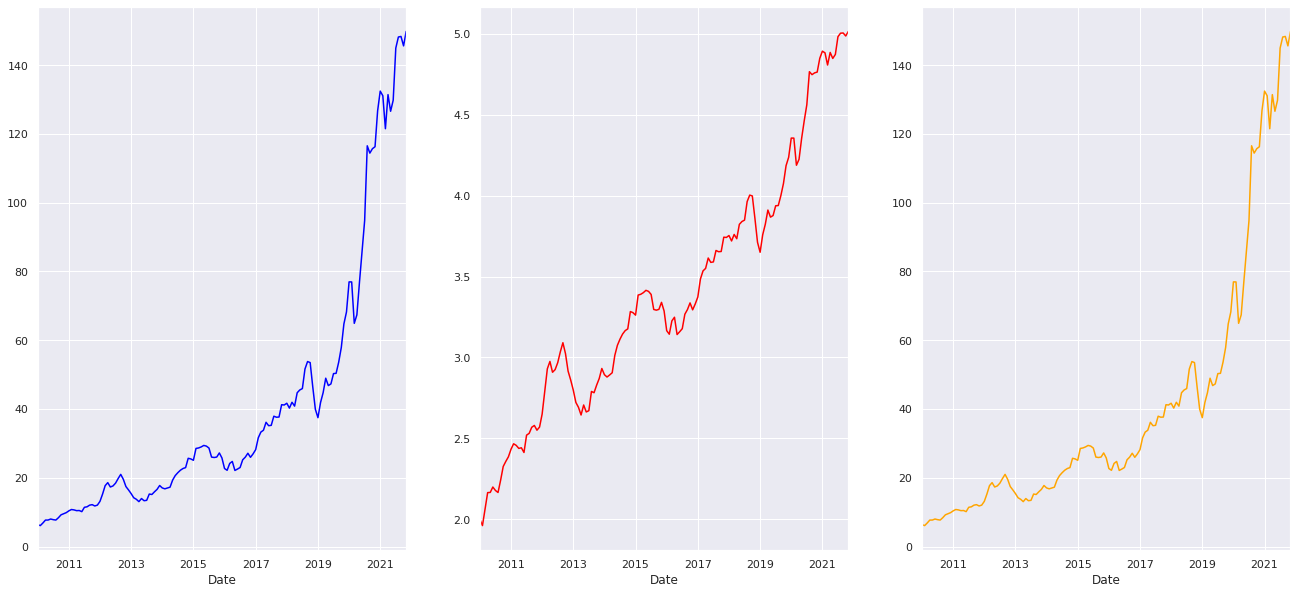

In [ ]:
plot_transformations(monthly_data,'square_root') #  square_root log
plot_transformations(monthly_data, 'cube_root')
plot_transformations(monthly_data, 'log')



This code calls the `plot_transformations` function three times, each with a different transformation specified: square root, cube root, and logarithm. It takes three parameters: pandas DataFrame, monthly_data, and transformation type. It generates a plot that visualizes the effects of the specified transformation on the data. Here, plot_transformations(monthly_data, 'square_root') calls the function to plot the effects. This will generate a figure with three subplots: the original data, the square root-transformed data, and the inverse square root-transformed data.

The second line, `plot_transformations(monthly_data, 'cube_root')`, calls the function to plot the effects of the cube root transformation. It will also generate a figure with three subplots, showing the original data, the cube root transformed data, and the inverse cube root transformed data.

The third line, `plot_transformations(monthly_data, 'log')`, calls the function to plot the effects of the logarithm transformation. This will produce a figure with three subplots: the original data, the logarithm-transformed data, and the inverse logarithm-transformed data.

Overall, this code repeatedly applies the `plot_transformations` function to visualize different transformations on the `monthly_data` DataFrame. A figure is generated with subplots displaying the original data, the transformed data, and the inverse transformed data. In this way, we can better understand how each transformation affects data distribution and characteristics.

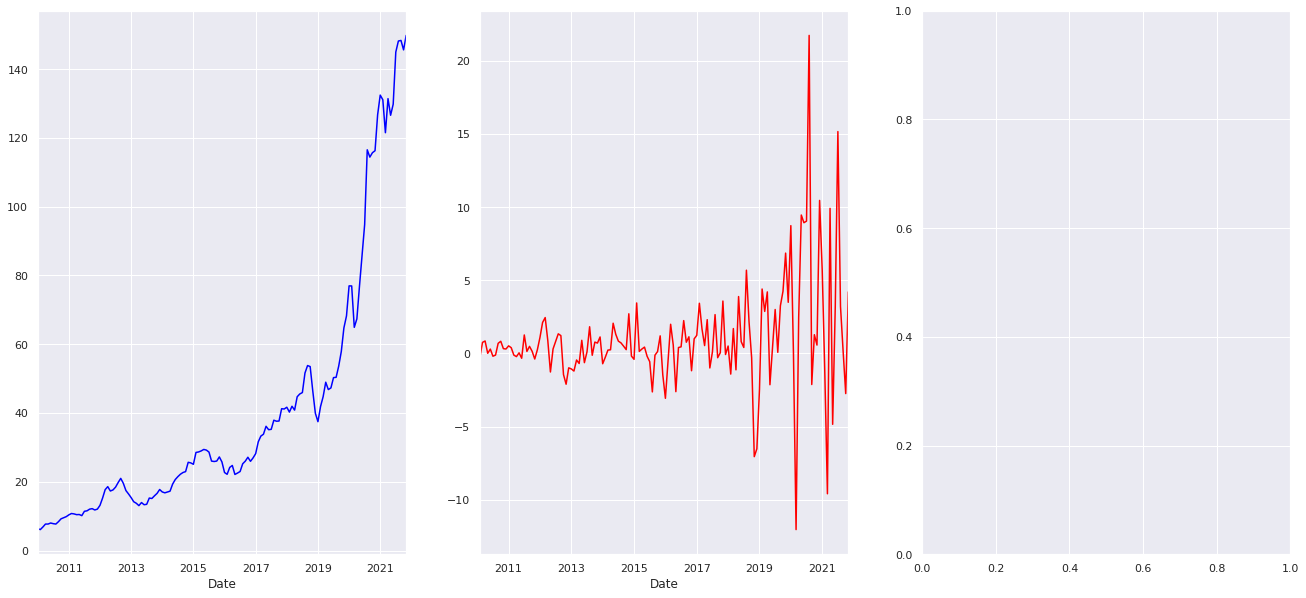

In [ ]:
# Get axes for multiple plots
fig, axes = plt.subplots(nrows=1, ncols=3)
    
    # Original data
monthly_data.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE, ax=axes[0], color='blue')
    
    # Transformed data
transformed_column_name = 'monthly_diff'
monthly_data.set_index('Date')[transformed_column_name][1:].plot(figsize=FIGURE_SIZE, ax=axes[1], color='red')
    
#     # Inverse Transformed data
# inverse_transformed_data = f'{transformation}_inv_transformation_demand'
#  monthly_data.set_index('Date')[inverse_transformed_data].plot(figsize=FIGURE_SIZE, ax=axes[2], color='orange')

This code generates a figure with three subplots and plots specific data on each subplot. For example, the first line of the code creates a figure with three subplots arranged in rows of one. The `fig` variable represents the entire figure, while the `axes` variable is a list of three axes objects, one for each subplot. The second line plots the original data from the 'Adj Close' column of the data frame. In the first subplot, it plots the values of the 'Date' column as the index of the DataFrame. The plot is displayed with a blue color. The third line plots transformed data from the 'monthly_diff' column. Also, it uses the 'Date' column as the index, but excludes the first value using `[1:]`. In the second subplot, the transformed data is shown in red. In the code, there is a snippet for plotting inversely transformed data, but it has been commented out (disabled). The code creates a figure with three subplots and plots specific data on each subplot. In the first subplot, the original data is displayed, while in the second subplot, the transformed data is displayed. It appears that there was intended functionality to plot inverse transformed data, but it is not being executed at this time.

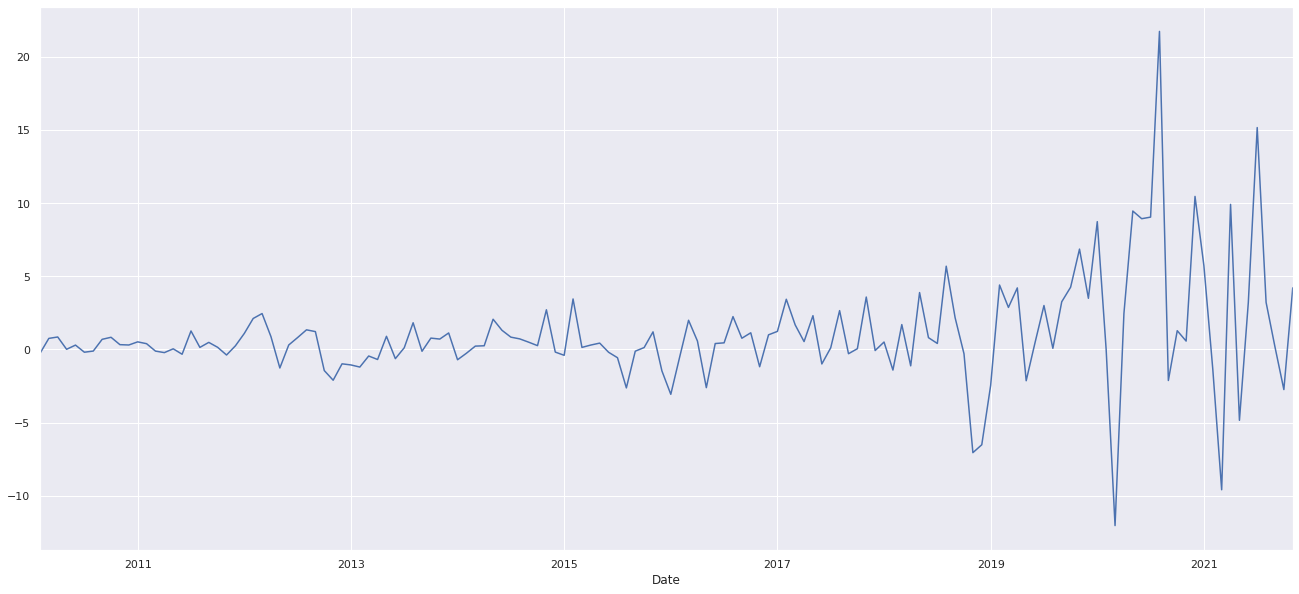

In [ ]:
monthly_data.set_index('Date')['monthly_diff'][1:].plot(figsize=FIGURE_SIZE)

In this code, we plot a specific column, 'monthly_diff', from a pandas DataFrame called 'monthly_data' against the index column, 'Date'. 

In the beginning of the code, the 'Date' column is set as the index of the DataFrame using the `set_index()` function. By using indexing notation, the column 'monthly_diff' from the DataFrame is selected based on its name, allowing for easier manipulation and plotting of the data.

Then, it applies additional indexing notation, `[1:]`, to exclude the first value from the selected column. This is likely done to exclude any initial value that may not be meaningful or relevant in the plot. The selected column is plotted against the index column using pandas' plot() function. The resulting plot is displayed with a figure size defined by the `FIGURE_SIZE` variable.

In summary, this code sets the index of the DataFrame to the 'Date' column, selects the 'monthly_diff' column, excludes the first value, and plots the selected column against the index column. Plotting the 'monthly_diff' values against the dates provides a visual representation of the relationship or trend.

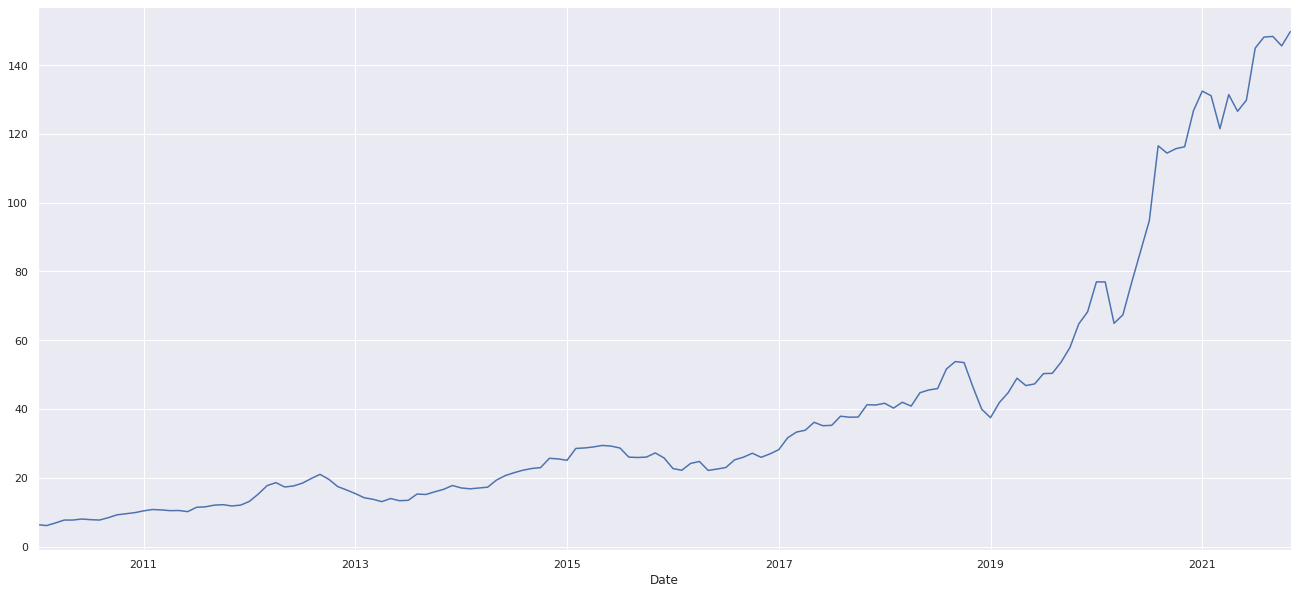

In [ ]:
monthly_data.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

This code generates a plot of the 'Adj Close' column from a pandas DataFrame called 'monthly_data' against the index column, 'Date'. To do this, we use the set_index() function. This allows for easier manipulation and plotting of the data based on the dates. By setting the index, the code selects the 'Adj Close' column from the DataFrame. This retrieves the specific column containing the adjusted closing prices of a financial asset, such as a stock or index. The values are plotted against the index column using the plot() function. The resulting plot visualizes the historical trend or movement of the adjusted closing prices over time. This parameter specifies the dimensions of the figure in which the plot will appear. This allows for customization of the figure size based on specific requirements or preferences. The code selects the 'Adj Close' column as the index and plots the values against it. Using the resulting plot, one can analyze and interpret the price movements over time based on historical adjusted closing prices.

In [ ]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   143 non-null    datetime64[ns]
 1   Adj Close                              143 non-null    float64       
 2   Year                                   143 non-null    int64         
 3   Month                                  143 non-null    object        
 4   dayofweek                              143 non-null    object        
 5   quarter                                143 non-null    int64         
 6   monthly_diff                           142 non-null    float64       
 7   square_root_transformation_demand      143 non-null    float64       
 8   square_root_inv_transformation_demand  143 non-null    float64       
 9   cube_root_transformation_demand        143 non-null    float64   

The following code summarizes the structure and content of a pandas DataFrame called `monthly_data`. By calling the `info()` method on the DataFrame, it retrieves important information about the DataFrame's characteristics.  The output of `monthly_data.info()` typically includes details such as the number of rows and columns in the DataFrame, the names and data types of each column, the count of non-null values in each column, and the memory usage of the DataFrame.  By examining the information provided by `monthly_data.info()`, analysts gain insights into the size of the DataFrame and the data Column types. The number of non-null values for each column indicates whether there are missing values or inconsistencies in the data. Additionally, the memory usage details inform users about the memory footprint of the DataFrame, which can be important when working with large datasets.

Overall, executing `monthly_data.info()` is a quick and useful way to obtain an overview of the DataFrame's structure and to identify initial characteristics of the data. Further analysis, cleaning, or preprocessing tasks are based on this information.

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(monthly_data['monthly_diff'][1:])

KPSS Statistic: 0.528477963970444
p-value: 0.035252710817467565
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


To determine a series' stationarity, this code performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test.

The code begins by importing the necessary function for the KPSS test from the `statsmodels.tsa.stattools` module.

Next, a function named `kpss_test` is defined. The KPSS test is performed on a series of data as input. The `**kw` notation allows for additional optional arguments to be passed to the KPSS test function. In the kpss_test function, the KPSS test is applied using the kpss() function. The test returns several statistical results, including the test statistic, p-value, the number of lags used in the test, and critical values. The output is then formatted and printed. The KPSS statistic, p-value, number of lags, and critical values associated with different significance levels are displayed. Additionally, it provides a final interpretation of the test result, stating whether the series is stationary or not based on the p-value threshold of 0.05.

Finally, the `kpss_test` function is called with the series `monthly_data['monthly_diff'][1:]` as the input, excluding the first element. This applies the KPSS test specifically to the 'monthly_diff' column of the `monthly_data` DataFrame. It reports the test results and interprets the results regarding the series' stationarity. In time series analysis, the KPSS test is commonly used to determine whether a series is stationary or exhibits a trend.

In [ ]:
kpss_test(monthly_data['log_transformation_demand'])
print(" ***  ")
print(" ***  ")
kpss_test(monthly_data['cube_root_transformation_demand'])
print(" ***  ")
print(" ***  ")
kpss_test(monthly_data['square_root_transformation_demand'])


KPSS Statistic: 1.0234809821378617
p-value: 0.01
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
 ***  
 ***  
KPSS Statistic: 0.9793176648560024
p-value: 0.01
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
 ***  
 ***  
KPSS Statistic: 0.9463550967388723
p-value: 0.01
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


This code performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on three different series of data: 'log_transformation_demand', 'cube_root_transformation_demand', and 'square_root_transformation_demand' from a DataFrame called 'monthly_data'.  The code calls the `kpss_test` function multiple times, passing each series as an argument.  After each test is performed, the code prints a series of asterisks ('***') to provide a visual separation between the test results.  The purpose of this code The purpose of this study is to determine whether the three transformed series are stationary. In time series analysis, the KPSS test is commonly used to determine whether a series is stationary or if it has a trend. By applying the test to each transformed series and examining the test results, it helps evaluate the stationarity characteristics of the data.  It is easier to distinguish between the outputs of each KPSS test when the printed asterisks serve as visual markers. This code performs the KPSS test on multiple transformed series of the monthly_data DataFrame and presents the test results, allowing for an analysis of the stationarity properties of the Information.

In [ ]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries[1:], autolag='AIC') #BIC
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

This code defines a function called `stationarity` that examines the stationarity of a given time series. It calculates the rolling mean and rolling standard deviation of the input series. A rolling mean is calculated by taking the average of the values within a 12-point window, and a rolling standard deviation is calculated similarly. These measures help to identify trends and variations in the time series. A plot is created after calculating the rolling mean and standard deviation. Red represents the actual time series, green represents the rolling mean, and black represents the rolling standard deviation. A legend is included to label each line, and the resulting plot is presented to provide a visual representation of the data. The code then conducts a Dickey-Fuller test to determine whether the data is stationary. The `adfuller` function is utilized to perform this test, and it returns various statistical outputs including the test statistic, p-value, number of lags used, and other relevant information. Dfoutput is used to store the results. The test statistic, p-value, lags used, and number of observations are stored in this Series. Additionally, the critical values for different significance levels are extracted from the test results and appended to the `dfoutput` Series. Lastly, the Dickey-Fuller output series is printed. It includes information such as the test statistic, p-value, lags used, and number of observations. The stationarity of the time series can be determined by analyzing these results. As a summary, the stationarity function calculates and plots the rolling average and standard deviation of a time series, and then performs a Dickey-Fuller test to determine the stationarity characteristics. Using this function, you can examine trends and determine if a given time series is stationary.

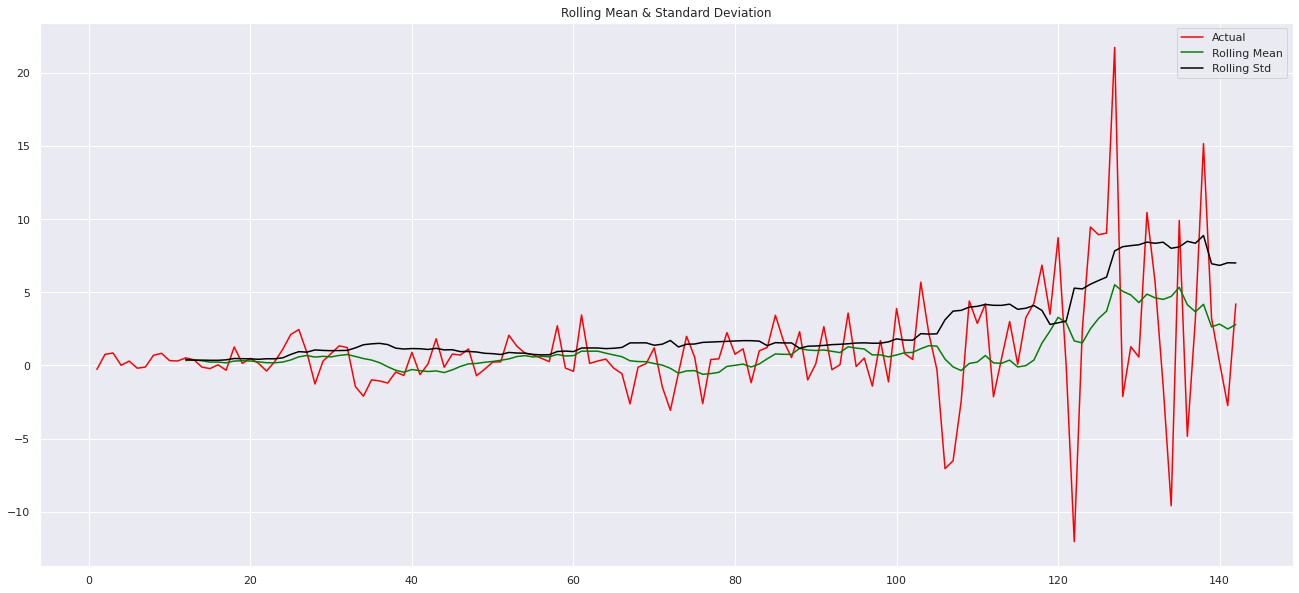

Dickey-Fuller Test: 
Test Statistic           -1.851527
p-value                   0.355196
Lags Used                11.000000
No. of Obs              129.000000
Critical Value (1%)      -3.482088
Critical Value (5%)      -2.884219
Critical Value (10%)     -2.578864
dtype: float64


In [ ]:
stationarity(monthly_data['monthly_diff'][1:])

This code applies the `stationarity` function to a specific column, 'monthly_diff', of a pandas DataFrame called 'monthly_data'. Stationarity is assessed by performing several operations. In this case, it focuses on the 'monthly_diff' column from the 'monthly_data' DataFrame, excluding the first element. First, it calculates the rolling mean and rolling standard deviation of the 'monthly_diff' column. This helps identify any trends or variations in the data. Next, it visualizes the 'monthly_diff' time series, the rolling mean, and the rolling standard deviation. A line in the plot represents a particular aspect of the data, with red representing the actual values, green representing the rolling mean, and black representing the rolling standard deviation. The code then performs a statistical test to determine whether a time series is stationary, the Dickey-Fuller test. Input for the test is the 'monthly_diff' column. The Dickey-Fuller test calculates a test statistic, p-value, number of lags used, and other relevant information. A summary of the test results is displayed along with the critical values. The summary provides information such as the test statistic, p-value, lags used, number of observations, and critical values. These results are helpful in determining whether the 'monthly_diff' time series is stationary or exhibits trend-like behavior.

By applying the `stationarity` function to the 'monthly_diff' column of the 'monthly_data' DataFrame, this code assesses the stationarity characteristics and trends in the data. Through plots and Dickey-Fuller test results, it aids in the analysis of time series properties by providing statistical insights into data.

In [ ]:
monthly_data['differenced_trasnformation_demand'] = monthly_data['Adj Close'].diff().values
monthly_data.head()

Date  ...  differenced_trasnformation_demand
0 2010-01-31  ...                                NaN
1 2010-02-28  ...                          -0.273515
2 2010-03-31  ...                           0.754818
3 2010-04-30  ...                           0.850573
4 2010-05-31  ...                           0.009596

[5 rows x 14 columns]

By creating a new column named 'differenced_transnformation_demand', this code modifies a pandas DataFrame called 'monthly_data'. 

Differences between consecutive values of the 'Adj Close' column are populated in the new column. To achieve this, we apply the diff() method to the 'Adj Close' column, which calculates the difference between each value and the previous one. The resulting differences are then assigned to the 'differenced_trasnformation_demand' column. The code then displays the first few rows of the modified 'monthly_data' DataFrame. This allows for a quick check of the DataFrame to verify the changes and observe the updated structure and content. To summarize, this code computes the changes between consecutive values by differencing the 'Adj Close' column. These differences are stored in a new column, 'differenced_transnformation_demand'. Lastly, it displays the updated DataFrame with the initial rows.

In [ ]:
monthly_data['differenced_demand_filled'] = np.where(pd.isnull(monthly_data['differenced_trasnformation_demand']), monthly_data['Adj Close'], monthly_data['differenced_trasnformation_demand'])
monthly_data.head()

Date  ...  differenced_demand_filled
0 2010-01-31  ...                   6.369562
1 2010-02-28  ...                  -0.273515
2 2010-03-31  ...                   0.754818
3 2010-04-30  ...                   0.850573
4 2010-05-31  ...                   0.009596

[5 rows x 15 columns]

This code modifies a pandas DataFrame called 'monthly_data' by creating a new column named 'differenced_demand_filled'. It populates the column based on a condition. Pd.isnull() checks if the values in the 'differenced_transnformation_demand' column are null (missing values). Null values are replaced with corresponding values from the 'Adj Close' column. Otherwise, if the value is not null, it remains unchanged.

By using `np.where()` and the condition, the code effectively fills any missing values in the 'differenced_demand_filled' column with the corresponding values from the 'Adj Close' column, ensuring that there are no null values in the new column.

After adding the new column and filling the missing values, the code displays the first few rows of the modified 'monthly_data' DataFrame using the `head()` method. This allows for a quick check of the DataFrame to verify the changes and observe the updated structure and content. The code creates a new column, 'differenced_demand_filled', in 'monthly_data'. This column is filled with the corresponding values from the 'Adj Close' column when any values are missing. A DataFrame with the initial rows with the updated column is then displayed.

In [ ]:
monthly_data['differenced_inv_transformation_demand'] = monthly_data['differenced_demand_filled'].cumsum()
np.testing.assert_array_equal(monthly_data['Adj Close'].values, monthly_data['differenced_inv_transformation_demand'].values)

This code performs two operations on a pandas DataFrame called 'monthly_data'. First, it creates a column called 'differenced_inv_transformation_demand'. In this column, the values in the 'differenced_demand_filled' column are added together. The cumulative sum calculates the running total, where each value in the new column is the sum of all the preceding values in the 'differenced_demand_filled' column.

After adding the new column, the code uses the `np.testing.assert_array_equal()` function to compare the values of two columns: 'Adj Close' and 'differenced_inv_transformation_demand'. In this assertion, the values in these two columns are equal. The code proceeds without issue if the values are equal. The error is raised if the two columns do not match, indicating a discrepancy. As a validation check, this assertion confirms that the inverse transformation applied to the differenced data ('differenced_inv_transformation_demand') accurately reconstructed the original data ('Adj Close'). By comparing the values, the code ensures that the inverse transformation has been performed correctly and that the reconstructed data matches the original data.

Basically, the code adds a column to the 'monthly_data' DataFrame containing the cumulative sum of the differenced and filled data. A comparison of the values of this new column with the original 'Adj Close' column verifies that the inverse transformation accurately reconstructs the original data. By performing this check, the integrity and accuracy of the inverse transformation process are ensured.

In [ ]:
monthly_data.head()

Date  ...  differenced_inv_transformation_demand
0 2010-01-31  ...                               6.369562
1 2010-02-28  ...                               6.096047
2 2010-03-31  ...                               6.850866
3 2010-04-30  ...                               7.701438
4 2010-05-31  ...                               7.711035

[5 rows x 16 columns]

This code retrieves and displays the first few rows of a pandas DataFrame called 'monthly_data'. It retrieves the top half of the DataFrame by calling the head() method. Using this code provides a quick preview of the data and gives users an overview of the DataFrame's structure and content. Typically, this code is used to provide users with a glimpse of the DataFrame and allow them to examine the initial rows, in order to verify the data, check the column names, and to learn about the data types and values. In summary, the output of this code shows the retrieved rows, displaying a snapshot of the data contained in the 'monthly_data' DataFrame. It provides a brief overview of the initial data records by retrieving and displaying the first few rows of the DataFrame. Data exploration and analysis begin with understanding the structure and content of the DataFrame.

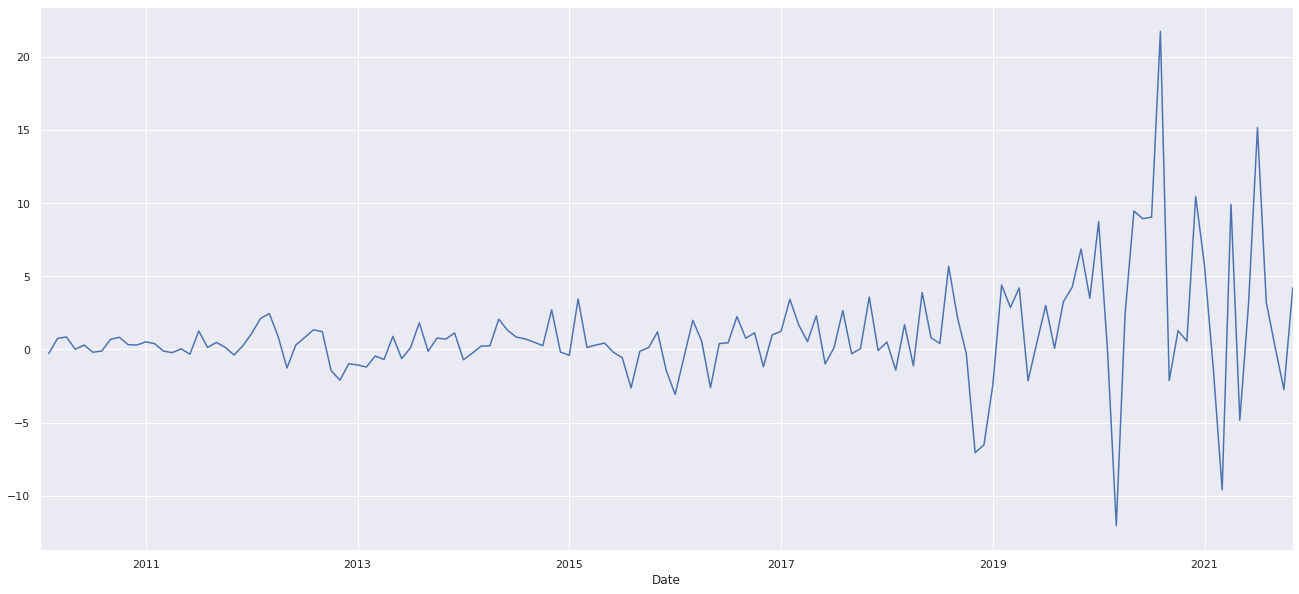

In [ ]:
monthly_data.set_index('Date')['differenced_trasnformation_demand'].plot(figsize=FIGURE_SIZE)

Using the set_index() function on the 'monthly_data' DataFrame, a plot of the 'differenced_transnformation_demand' column against the index column, 'Date', is generated. This allows for easier manipulation and plotting of the data based on the dates. The code selects the 'differenced_transnformation_demand' column by indexing. This retrieves the specific column that represents the differenced and transformed data. It is then plotted against the index column using the plot() function. The plot is displayed with a figure size defined by the `FIGURE_SIZE` variable.

The code generates this plot to visualize changes in the 'differenced_trasnformation_demand' column over time, highlighting any patterns, trends, or fluctuations. To summarize, this code selects the 'differenced_trasnformation_demand' column, sets the DataFrame index to the 'Date' column, and plots its values against it. In this way, any underlying patterns or dynamics can be analyzed and interpreted visually based on the differenced and transformed data.

In [ ]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    # Temporal features
    #monthly_data['date'] = pd.to_datetime(data['date'])
    #data['year'] = data['date'].dt.year
    #data['month'] = data['date'].dt.month
    monthly_data['week'] = monthly_data['Date'].dt.week
    monthly_data['day'] = monthly_data['Date'].dt.day
    monthly_data['dayofweek'] = monthly_data['Date'].dt.dayofweek
    #data['quarter'] = data['date'].dt.quarter
    #data['week_of_month'] = data['day'].apply(lambda x: np.ceil(x / 7)).astype(np.int8)
    monthly_data['is_weekend'] = (monthly_data['dayofweek'] > 5).astype(np.int8)
    
    return monthly_data

This code defines a function called `build_temporal_features` that enhances a given pandas DataFrame by incorporating additional temporal features. The function contains commented lines of code that are not currently executed. From a 'date' column, these lines convert it to a datetime format and extract features such as year, month, quarter, and week-of-month. However, these lines are currently inactive and do not contribute to the function's functionality. The executed lines within the function perform the following steps: - The 'week' feature is created by extracting the date from the 'Date' column. Each date in the DataFrame is assigned a corresponding week number using the `dt.week` attribute. The 'day' feature is created by extracting the month day from the 'Date' column. Each date is assigned a specific day number. The 'dayofweek' feature is derived from the 'Date' column. The `dt.dayofweek` attribute assigns a numerical value to each date representing the day of the week, with Monday as 0 and Sunday as 6. To determine whether the date is a weekend, we evaluate whether the 'dayofweek' value is greater than 5. A value of 1 is assigned if the condition is true, indicating a weekend day, while a value of 0 is assigned if the condition is false, indicating a weekday.

This code defines a function that enriches a DataFrame with temporal features. It then returns the modified DataFrame, which now includes the added temporal features. A binary weekend indicator is included along with the week number, day of the month, and day of the week. By providing insight into the temporal aspects of the data, these additional features enhance the DataFrame. In addition to enabling deeper understanding and exploration of patterns related to specific dates and times, these features can also be useful for time-dependent analysis and modeling.

In [ ]:
df1 = build_temporal_features(monthly_data)
df1.head()

Date  Adj Close  Year  ... week  day  is_weekend
0 2010-01-31   6.369562  2010  ...    4   31           1
1 2010-02-28   6.096047  2010  ...    8   28           1
2 2010-03-31   6.850866  2010  ...   13   31           0
3 2010-04-30   7.701438  2010  ...   17   30           0
4 2010-05-31   7.711035  2010  ...   22   31           0

[5 rows x 19 columns]

This code applies the `build_temporal_features` function to a pandas DataFrame called `monthly_data` and assigns the returned DataFrame to a new variable `df1`. This function adds additional temporal features to the input DataFrame. These features may include week number, day of the month, day of the week, and a binary indicator for weekends. The function processes the data frame by calculating and appending the specified temporal features. The modified DataFrame with the added features is then assigned to the variable `df1`. The code displays the first few rows of the modified DataFrame using the head() method after applying the function. This provides a preview of the updated DataFrame and allows for a quick inspection of the structure and content of the data. Put another way, this code combines a DataFrame and adds spatial features. The resulting modified DataFrame is stored in `df1`, and its first few rows are displayed to provide a glimpse of the updated data with the newly added temporal features.

Prepare deep learning data by selecting and splitting it 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

This code imports several Python libraries and sets up the necessary environment for data analysis and visualization.  The `pandas` library is imported and aliased as `pd`, providing data structures and functions for manipulating and analyzing structured data.  The `numpy` library is imported and aliased as `np`, offering support for efficient numerical computations and array operations.  The `statsmodels.api` module is imported as `sm`, providing a wide range of statistical models and tools for data analysis.  The `statsmodels.formula.api` module is imported as `smf`, offering a formulaic interface for specifying statistical models.  The `sklearn.metrics` module is imported as `metrics`, providing various metrics and evaluation methods for machine learning models.  The `seaborn` library is imported as `sns`, which is a data visualization library built on top of `matplotlib`. It provides an enhanced visual aesthetic and additional plot types.  The `matplotlib.pyplot` module is imported as `plt`, enabling the creation of various types of plots and visualizations.  Finally, the `%matplotlib inline` magic command is used to enable inline plotting, allowing the generated plots to be displayed directly within the Jupyter Notebook or other compatible environments.  In summary, this code sets up the necessary libraries and environment for data analysis, statistical Analyzing, evaluating, and visualizing data. For subsequent data analysis tasks, it provides the foundational tools and dependencies.

In [ ]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline

This code sets up the configuration and settings for the plotting environment. It defines the variable FIGURE_SIZE and assigns it the value of (20,10). This tuple represents the dimensions (width and height) in inches for the figures or plots that will be generated. Matplotlib.pyplot sets the value of the axes.grid parameter in the rcParams dictionary. By setting it to `True`, it enables the gridlines to be displayed on the plots created using `matplotlib.pyplot`. This is a Jupyter Notebook magic command. Jupyter Notebook is instructed to render the plots directly in the output cells of the notebook, so they are displayed inline with the code and other text in the notebook. In summary, this code sets the figure size for plots and allows the display of gridlines in matplotlib plots. In addition, it configures Jupyter Notebook to display the plots inline, making it convenient to visualize and analyze them within the notebook.

In [ ]:
import tensorflow as tf

This code imports the TensorFlow library into the Python script or notebook environment. It imports TensorFlow and makes its functionality available in the script. In machine learning and deep learning, TensorFlow is a popular open-source library. A variety of machine learning models, including neural networks, can be built, trained, and deployed using the comprehensive set of tools and functions it provides. When the code imports TensorFlow, it gains access to its extensive range of features, including tensor operations, automatic differentiation, optimization algorithms, and high-level APIs for building machine learning models. It supports CPU and GPU computations, enabling efficient execution on various hardware platforms. In summary, this code imports the TensorFlow library, enabling it to leverage its powerful machine learning capabilities for developing and executing various machine learning and deep learning tasks.

 Re-run the code of the model with the same seed to get the same results

In [ ]:
tf.random.set_seed(1234)

This code sets the random seed for the TensorFlow library to a specific value, 1234. TensorFlow provides a method for setting the seed value for the random number generator used within TensorFlow operations. By setting the seed, it ensures that the random numbers generated during the execution of TensorFlow operations are reproducible. Machine learning models require reproducibility to ensure consistent results. The random number generator will generate the same sequence of random numbers every time the code is executed if the seed value remains the same. For experimentation, debugging, or comparison purposes, setting the seed to a fixed value can be useful. By controlling and replicating TensorFlow's randomness, the code becomes deterministic. As a result, this code ensures that the random numbers generated during TensorFlow operations are reproducible and consistent across multiple runs of the code, since it sets the seed to a specific value.

In [ ]:
df11 = pd.read_csv("stock.csv")
df11.head()


Date  Adj Close  ...  week_of_month  is_weekend
0  2010-01-04   6.562589  ...              1           0
1  2010-01-05   6.573936  ...              1           0
2  2010-01-06   6.469368  ...              1           0
3  2010-01-07   6.457407  ...              1           0
4  2010-01-08   6.500340  ...              2           0

[5 rows x 13 columns]

This code reads data from a CSV file named "stock.csv" and stores it in a pandas DataFrame called `df11`. A DataFrame is created by reading the contents of a CSV file. File path "stock.csv" is passed to the function as an argument, indicating the location and name of the file. The function then reads the file and converts its contents into a tabular data structure. Once the DataFrame has been created, the code displays the first few rows by using the `head()` method. This allows for a quick preview of the data contained in `df11` and provides an initial understanding of its structure and content. The following code reads a CSV file named "stock.csv" and creates a pandas DataFrame df11 containing the data. An overview of the data read from the CSV file is displayed in the initial rows of the DataFrame. As a starting point for exploring and analyzing data, this is useful.

In [ ]:
df11

Date   Adj Close  ...  week_of_month  is_weekend
0     2010-01-04    6.562589  ...              1           0
1     2010-01-05    6.573936  ...              1           0
2     2010-01-06    6.469368  ...              1           0
3     2010-01-07    6.457407  ...              1           0
4     2010-01-08    6.500340  ...              2           0
...          ...         ...  ...            ...         ...
2975  2021-10-27  148.850006  ...              4           0
2976  2021-10-28  152.570007  ...              4           0
2977  2021-10-29  149.800003  ...              5           0
2978  2021-11-01  148.960007  ...              1           0
2979  2021-11-02  150.580002  ...              1           0

[2980 rows x 13 columns]

This code snippet refers to a pandas DataFrame named `df11`. It does not include any specific operations or methods in this particular line of code. In Python, a DataFrame is similar to a spreadsheet or database table. Using rows, it can store and manipulate data based on individual observations or records, whereas columns represent variables or attributes. This code could access and modify specific data in the DataFrame, apply transformations, conduct calculations, generate visuals, or apply calculations to the data. The information cannot be determined without further context or subsequent code. Actions or manipulations performed on DF11. The subsequent code lines following the reference to `df11` would provide more information on the operations performed on the DataFrame.

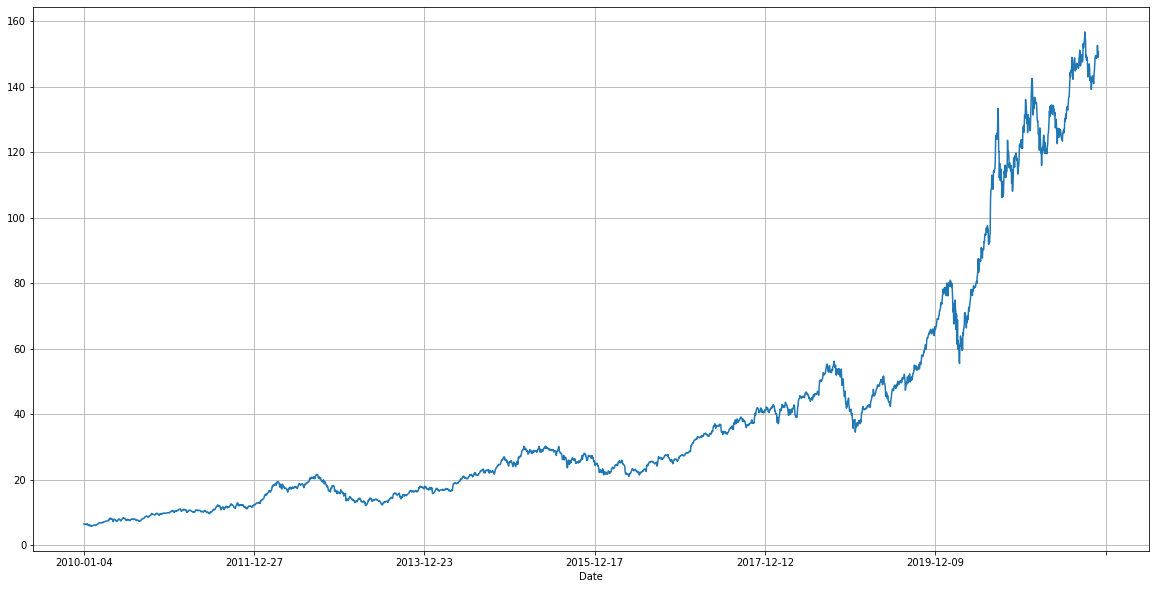

In [ ]:
df11.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

This code generates a plot of the 'Adj Close' column from a pandas DataFrame called `df11`, with the 'Date' column set as the index. Using the set_index() function, the 'Date' column is specified as the index column. This reorganizes the DataFrame such that the 'Date' column becomes the new index, allowing for easier data manipulation and plotting based on the dates. Using indexing notation, the code selects the 'Adj Close' column from the DataFrame. This retrieves the specific column that represents the adjusted closing prices of a stock or a financial instrument. Using the plot() function, the adjusted closing prices are plotted against the corresponding dates. The plot is displayed with a figure size defined by the `FIGURE_SIZE` variable, which determines the width and height of the resulting plot.  Through the generation of this plot, the code visualizes the historical trend or pattern of adjusted closing prices over time, revealing insights about how that stock or instrument performed or behaved. Essentially, this code sets the 'Date' column as the index of the DataFrame `df11`, selects the 'Adj Close' column, and plots the Date-adjusted closing prices. As a result, the plot provides a visual representation of the historical price movements, making the analysis and interpretation of the data easier.

In [ ]:

mask = (df11['Date'] > '2010-01-01') & (df11['Date'] <= '2019-12-31')
print(df11.loc[mask])

            Date  Adj Close  ...  week_of_month  is_weekend
0     2010-01-04   6.562589  ...              1           0
1     2010-01-05   6.573936  ...              1           0
2     2010-01-06   6.469368  ...              1           0
3     2010-01-07   6.457407  ...              1           0
4     2010-01-08   6.500340  ...              2           0
...          ...        ...  ...            ...         ...
2511  2019-12-24  70.129509  ...              4           0
2512  2019-12-26  71.520905  ...              4           0
2513  2019-12-27  71.493767  ...              4           0
2514  2019-12-30  71.918076  ...              5           0
2515  2019-12-31  72.443565  ...              5           0

[2516 rows x 13 columns]


This code filters the rows of a pandas DataFrame called `df11` based on a specific condition and prints the resulting subset of data. This code creates a boolean mask using two conditions. The first condition checks if the values in the 'Date' column of `df11` are greater than '2010-01-01', and the second condition checks if the values are less than or equal to '2019-12-31'. The resulting mask is a boolean array that evaluates to `True` for rows that satisfy both conditions and `False` otherwise.

By using this mask in the indexing operation `df11.loc[mask]`, the code selects and retrieves the subset of rows from `df11` that meet the specified date range criteria. Only the rows that correspond to `True` values in the mask are included in the resulting subset.

Finally, the `print()` function is used to display the subset of data, providing a snapshot of the filtered rows from `df11`.

In summary, this code filters the rows of `df11` based on a date range condition, stores the resulting subset of data in a new DataFrame, and then prints the filtered rows to show the selected subset of data that falls within the specified date range.

In [ ]:
df12=df11.loc[mask]

This code creates a new pandas DataFrame named `df12` by selecting specific rows from an existing DataFrame `df11` based on a given condition.

The condition is defined using a boolean mask, which is created by comparing the values in the 'Date' column of `df11` with the date range of interest. The mask evaluates to `True` for the rows that satisfy the condition (fall within the specified date range) and `False` for the rows that do not.

By using the `.loc` accessor and passing the mask as an index to `df11`, the code selects and retrieves the rows from `df11` that correspond to the `True` values in the mask. Only the rows that meet the specified condition are included in the resulting subset. This subset is assigned to a new DataFrame named df12. This creates a separate DataFrame that contains the filtered subset of data from `df11`. Put simply, it extracts and stores a subset of rows based on a specific condition defined by a boolean mask in a new DataFrame called 'df12'. This results in a DataFrame that contains only the rows from dataset 11 that satisfy the criteria, providing a filtered view of the original dataset.

Choose a feature 

In [ ]:
#X=  df11[['Date']]
y= df11['Adj Close']

This code assigns specific columns from a pandas DataFrame `df11` to variables `X` and `y`. The commented line suggests that the column 'Date' is being assigned to variable `X`. However, it is commented out, which means it is not currently executed. The next line assigns the values from the 'Adj Close' column of `df11` to the variable `y`. This line is not commented and is active in the code.

By assigning the 'Adj Close' column to `y`, it creates a separate pandas Series or DataFrame (depending on the structure of `df11['Adj Close']`) containing the data from the 'Adj Close' column.

These assignments allow for storing and isolating specific columns of interest from the original DataFrame `df11`. `X` and `y` can then be used for further analysis, modeling, or any other operations where separate access to the 'Date' or 'Adj Close' data is required.

In summary, this code assigns the values from the 'Adj Close' column of `df11` to the variable `y`, providing a separate reference to the data in that column. It is commented out, indicating that it is not currently being executed. As a result of these assignments, subsequent tasks can be performed independently with specific columns of data.

Transform and scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

Data scaling is performed by the scikit-learn library using MinMaxScaler. In the code, the MinMaxScaler class is imported from the sklearn.preprocessing module, which provides various data preprocessing techniques. Next, a MinMaxScaler object is created and assigned to the variable `scaler`. The `feature_range` parameter is set to (0, 1), which specifies the desired range for scaling the data. This is followed by an application of fit_transform() method on the data. Fit_transform() performs two steps: It fits a scaler to the data, determines the minimum and maximum values of y, and then uses the scaling transformation. The `np.array(y).reshape(-1,1)` code converts the `y` variable into a numpy array and reshapes it to have a single column, as expected by the scaler. This results in the value of y being overwritten. The new `y` variable now contains the scaled values of the original data, with all values ranging between 0 and 1. To sum up, minmaxscaler from scikit-learn is used to scale the value of the variable y. Various machine learning algorithms or data analysis tasks that require normalization or a specific range of values may benefit from scaling data. A scaled value is then stored in the `y` variable for further use.

In [ ]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

This code splits a dataset, represented by the variable `y`, into training and test datasets. Training_size is calculated by multiplying y by 0.65 and converting the result into an integer. The number of samples in the training dataset is determined by this. The remaining samples will be allocated to the test dataset. The test_size variable is calculated by subtracting the training_size from the total length of the dataset. This determines the number of samples that will be included in the test dataset. Therefore, the train_data variable is assigned the first samples of the training datasets. This represents the training dataset and includes all columns of the `y` array. Test samples are assigned to each variable starting from `training_size` until the end of the `y` array. Using this indexing technique, the first column of the array or dataframe is selected, producing a two-dimensional array. This represents the test dataset. It divides the dataset represented by `y` into a training dataset and a test dataset. Allocating 65% of the samples to the training dataset and the remaining samples to the test dataset determines the size of the split. Training and test datasets are stored in the variables train_data and test_data.

In [ ]:
training_size,test_size

(1937, 1043)

This code calculates the sizes of the training and test datasets based on the lengths of the variables `y`. The size of the training dataset is calculated by multiplying the length of the training dataset by 0.65. This value represents the number of samples that will be included in the training dataset. It is calculated by subtracting the training size from y. This value represents the number of samples that will be allocated to the test dataset. Calculating these sizes enables the code to determine how samples are allocated between the training and test datasets. Training datasets are used to train machine learning models, whereas test datasets are used to test the models on unseen data. The size of the training and test datasets can vary depending on the specific requirements and constraints of the task at hand. It is common to adjust the split ratio based on factors such as the available data, the desired model complexity, and the evaluation goals.

In summary, this code calculates the sizes of the training and test datasets based on the length of the `y` variable, providing information on the number of samples that will be allocated to each dataset for subsequent analysis or modeling tasks.

In [ ]:
train_data[2]

array([0.00384731])

This code retrieves a specific element from the `train_data` dataset, using the index value 2. It represents the training dataset, which is a subset of the original dataset. It contains a collection of samples used to train a machine learning model or perform other analysis tasks. This code selects the element at index position 2 from the dataset. The indexing starts from 0, so `train_data[2]` refers to the third element in the `train_data` dataset. Retrieval depends on the dataset's structure and content. It could be a single value, a row of data, or a specific column or attribute from a multidimensional dataset.

In summary, this code accesses and retrieves a specific element from the `train_data` dataset, allowing for the extraction of individual values or subsets of data for further analysis or processing. Depending on the indexing and dataset structure, a specific element will be obtained.

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  #0-100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

This code defines a function named `create_dataset` that takes in a dataset and a time step as input parameters and returns two arrays: `dataX` and `dataY`.

The function is designed to create a supervised learning dataset by splitting the original dataset into input (X) and output (Y) components. The time step parameter determines the number of past observations considered for predicting the next value. The loop iterates over indices from 0 to the length of the dataset minus the time step minus 1. This ensures that enough observations are available to form complete input-output pairs. Determining scores is carried out iteratively, beginning from index `i` and continuing for `time_step` number of steps. These values are stored in the `dataX` array, representing the input features for the supervised learning model. The target value is obtained by indexing the dataset at `i + time_step`. These target values are stored in the `dataY` array, representing the desired output or the predicted value.

Finally, the function returns the `dataX` and `dataY` arrays as numpy arrays, providing the input-output pairs that can be used for training a supervised learning model.

In summary, this code defines a function that takes a dataset and a time step as input and creates a supervised learning dataset by dividing the original dataset into input and output sequences. The input sequences (`dataX`) consist of past observations, and the corresponding output values (`dataY`) represent the next observation. Based on past data, these input-output pairs can be used to train a machine learning model.

In [ ]:
import numpy

This code imports the `numpy` library into the Python script. Python's numpy library is fundamental to scientific computing. It provides powerful data structures, such as multi-dimensional arrays and matrices, along with a collection of mathematical functions for performing numerical computations efficiently.

By importing `numpy`, the code enables the use of `numpy` functions, classes, and methods throughout the script. This allows for efficient array manipulation, mathematical operations, statistical calculations, and more. When working with numeric data or performing scientific calculations, it is commonly used to import numpy. It ensures that the necessary functionalities and tools provided by `numpy` are available for use in the script. To summarize, this code imports the Numpy Python package, which is widely used for scientific computing. A code that imports numpy has access to numpy's array manipulation capabilities, mathematical functions, and other numerical computing tools.

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

This code creates training and test datasets by applying the `create_dataset` function to the `train_data` and `test_data` variables, respectively.

The variable `time_step` is set to a value of 100, which determines the number of past observations used as input features for predicting the next value.

The `create_dataset` function takes a dataset and a time step as input and returns two arrays: `dataX` and `dataY`. The function create_dataset(train_data, time_step) splits the original dataset into input (X) and output (Y) components, forming supervised learning pairs. X_train and Y_train are generated by calling the function create_dataset(train_data, time_step). The `X_train` array contains input sequences of length `time_step`, which represent past observations. The corresponding target values for these input sequences are stored in the `y_train` array, representing the desired outputs or predicted values for training.

Similarly, `create_dataset(test_data, time_step)` is called to create the test dataset. The function generates `X_test` and `y_test`, which are arrays of input sequences and target values for the test dataset, respectively.

Overall, this code prepares the training and test datasets by extracting input-output pairs from the `train_data` and `test_data` variables using the `create_dataset` function. A machine learning model will be trained and evaluated using the input sequences and target values obtained from this process.

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

This code reshapes the training and test datasets `X_train` and `X_test`, respectively, by adding an additional dimension to their shape. Matrix and array shapes are modified using the reshape() function. In this case, it is applied to the `X_train` and `X_test` arrays. An array's shape represents its dimensions. In this context, the shape of `X_train` and `X_test` is initially defined by the number of samples (rows) and the number of time steps (columns) in the input sequences.

By calling `X_train.reshape(X_train.shape[0], X_train.shape[1], 1)`, the code modifies the shape of `X_train` to have an additional dimension of size 1. This additional dimension is inserted at the end of the shape, which effectively changes the shape from a 2D structure to a 3D structure.  The same process is applied to `X_test` by calling `X_test.reshape(X_test.shape[0], X_test.shape[1], 1)`, resulting in a reshaped `X_test` array with a 3D shape.  The purpose of this reshaping is to match the input requirements of certain machine learning models or deep learning frameworks that expect input data in a specific format, typically involving a 3D Structure of an array. This code modifies the shape of the X_train and X_test arrays by adding an extra dimension at the end, making them 3D arrays instead of 2D arrays. To ensure compatibility between the data and the subsequent modeling or analysis, this reshaping is often necessary.

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant


This code imports necessary modules and classes from the TensorFlow and scikit-learn libraries for building a stacked LSTM model. This code includes the Sequential class in the TensorFlow.keras.models module. The sequential model is a linear stack of layers that allows building deep learning models layer by layer. In this example, we import the tensorflow.keras.layers module, which contains classes for defining various layers. Imported layers are Dense, Dropout, and BatchNormalization. These layers are building blocks used to construct the architecture of the stacked LSTM model. LSTM is represented by the tensorflow.keras.layers.LSTM class. LSTM is a type of recurrent neural network (RNN) layer commonly used for processing sequential data. It uses a class called MinMaxScaler. In this class, the data is scaled to a specific range, typically between 0 and 1. Scaling the data can help improve the model's performance and convergence during training. This module contains classes for initializing neural network weights and biases. This code imports the RandomNormal and Constant classes. These classes allow specifying custom initializers for the layer parameters. The code imports these components to build stacked LSTM models. Model components include layers, data scaling capabilities, and weight initialization options that can be customized. The code imports TensorFlow and scikit-learn modules, classes, and functions to construct a stacked LSTM model. As a result of these imports, the model architecture, input data scaling, and weight initialization of the model's layers can be customized.

Model # LSTM

In [ ]:


model=Sequential()
# Adding first LSTM layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.2))
# second LSTM layer 
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding third LSTM layer 
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding fourth LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding fifth LSTM layer a
model.add(LSTM(units=100))
model.add(Dropout(0.2))
# Adding the Output Layer
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')





This code builds a stacked LSTM model using the `Sequential` class from TensorFlow's Keras API.

The `Sequential` class represents a linear stack of layers, and it serves as the foundation for constructing the model architecture.

First, an instance of the `Sequential` class is created by assigning it to the `model` variable.

The model is then constructed layer by layer:

1. We add the first LSTM layer using the `model.add()` method. The layer has 100 units (neurons) and is set to return sequences (`return_sequences=True`). This parameter specifies the shape of the input data, which in this case is (100, 1), representing 100 time steps and 1 feature. The dropout layer is added after the first LSTM layer using model.add(Dropout(0.2)). The dropout regularization technique helps prevent overfitting by randomly dropping a fraction of the input units during training. Each of the second, third, fourth, and fifth LSTM layers has 100 units and returns sequences. After each LSTM layer, dropout layers with a dropout rate of 0.2 are added. In the final step, an output layer is added using model.add(Dense(units=1)). The model's architecture, consists of multiple LSTM layers stacked on top of each other, followed by a dropout layer and an output layer. One unit represents the predicted output. Following the construction of the model, it is compiled using `model.compile()`. In this case, the optimizer is set to 'adam', which is a popular optimization algorithm for training neural networks. The loss function is set to 'mean_squared_error', which is commonly used for regression tasks. The code builds a stacked LSTM model with multiple LSTM layers, regularization dropout layers, and dense output layers. With the 'adam' optimizer and the 'mean_squared_error' loss function, the model is ready for training and prediction.

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 100, 100)          40800     
                                                                 
 dropout_49 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_63 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_50 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_64 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_51 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_65 (LSTM)              (None, 100, 100)        

The `model.summary()` code generates a summary of the model architecture, providing a concise overview of the layers and parameters used in the model. It displays a table-like summary of the model architecture. Starting at 0, each layer in the model is listed with its index number. The type of each layer, such as LSTM, Dropout, or Dense, is indicated in the summary. You can also see the output shape for each layer. The output shape describes the dimensions of the data that is produced by each layer, giving insights into the information processing and transformation occurring within the model. The summary also indicates how many parameters can be trained. During training, the model learns weights and biases. By knowing the number of parameters, one can assess the model's complexity and potential capacity for learning from the data. The summary of the model can help determine the model's structure, complexity, and how data flows through it. It helps identify the types of layers used, the output shapes at each layer, and the overall number of trainable parameters. This is helpful when debugging, optimizing performance, and verifying that the desired architecture has been implemented. By providing a high-level overview of the model's components, it is possible to determine its complexity and understand how information is processed within it. This code generates a summary of a model's architecture, including details about the layers, output shapes, and trainable parameters. The summary helps to understand and analyze the model's structure and complexity, allowing it to be optimized and evaluated.

In [ ]:
history= model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=54,batch_size=84,verbose=1)

Epoch 1/54
22/22 [==============================] - 36s 2s/step - loss: 7.6719e-05 - val_loss: 9.7872e-04
Epoch 2/54
22/22 [==============================] - 25s 1s/step - loss: 7.1939e-05 - val_loss: 0.0010
Epoch 3/54
22/22 [==============================] - 25s 1s/step - loss: 6.6602e-05 - val_loss: 9.5697e-04
Epoch 4/54
22/22 [==============================] - 26s 1s/step - loss: 6.8357e-05 - val_loss: 8.5420e-04
Epoch 5/54
22/22 [==============================] - 25s 1s/step - loss: 7.2846e-05 - val_loss: 9.3086e-04
Epoch 6/54
22/22 [==============================] - 25s 1s/step - loss: 7.0045e-05 - val_loss: 8.3398e-04
Epoch 7/54
22/22 [==============================] - 25s 1s/step - loss: 7.2586e-05 - val_loss: 9.7613e-04
Epoch 8/54
22/22 [==============================] - 25s 1s/step - loss: 6.9511e-05 - val_loss: 0.0025
Epoch 9/54
22/22 [==============================] - 27s 1s/step - loss: 7.4774e-05 - val_loss: 8.8019e-04
Epoch 10/54
22/22 [==============================] - 2

This code trains the constructed model using the training dataset (`X_train` and `y_train`) and validates it using the test dataset (`X_test` and `ytest`). It trains the model using the model.fit() function. It takes the input data (`X_train`) and the corresponding target values (`y_train`) as arguments. During training, the model adjusts its weights and biases based on the provided data to learn the underlying patterns and relationships.

The `validation_data` parameter is used to specify the validation dataset, which consists of the test data (`X_test`) and its corresponding target values (`ytest`). This dataset is used to evaluate the model's generalization ability and to prevent overfitting, as it provides insight into its generalization abilities.

The `epochs` parameter determines the number of times the model will iterate over the entire training dataset during training. Epochs are iterations. As a result of specifying 54 epochs, the model will go through the training dataset 54 times, progressively refining its predictions and improving its performance.

The `batch_size` parameter defines the number of samples from the training dataset that are processed together in each training iteration. Training efficiency and speed are affected by it. In this case, a batch size of 84 is used. The verbose parameter determines how verbose the training will be. By setting it to 1, the training progress and metrics will be displayed during training, providing real-time feedback on the model's performance. During the training process, various information, such as loss function value and performance metrics, is captured. This information is stored in the `history` object, allowing for further analysis and visualization of the training process and model performance. To summarize, this code trains the model and validates it. Specifying the number of epochs, batch size, and verbosity controls the training process and captures the training history.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

This code imports the `EarlyStopping` callback class from the TensorFlow Keras library.

The `EarlyStopping` callback is used during the training of a neural network model to monitor a specified metric, such as the validation loss or accuracy, and stop the training process early if certain criteria are met.

The `EarlyStopping` class provides a way to define conditions for early stopping based on the monitored metric. These conditions can include criteria such as no improvement in the monitored metric for a specified number of epochs, reaching a predefined threshold, or exceeding a maximum number of epochs.  By using the `EarlyStopping` callback, one can automatically stop the training process if the model's performance on the validation data does not improve or worsens, preventing unnecessary computation and saving time.  The callback can be added to the training process by passing it as an argument to the An optional parameter of the "model.fit()" function is called "callbacks.". This allows the training process to be interrupted and the model to be saved or evaluated based on the best-performing epoch.

In summary, the `from tensorflow.keras.callbacks import EarlyStopping` code imports the `EarlyStopping` callback class, which provides a mechanism to stop the training of a neural network model early based on specified conditions and monitored metrics. If certain criteria are met, such as a lack of improvement in validation performance, this callback can be added to the training process to stop it automatically, optimizing the training process and preventing unnecessary computation.

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 [==============================] - 62s 564ms/step - loss: 0.0014 - val_loss: 0.0077
Epoch 2/1000
58/58 [==============================] - 30s 525ms/step - loss: 1.5463e-04 - val_loss: 0.0019
Epoch 3/1000
58/58 [==============================] - 30s 519ms/step - loss: 1.1932e-04 - val_loss: 0.0021
Epoch 4/1000
58/58 [==============================] - 30s 513ms/step - loss: 1.0929e-04 - val_loss: 0.0020
Epoch 5/1000
58/58 [==============================] - 30s 524ms/step - loss: 1.0806e-04 - val_loss: 0.0016
Epoch 6/1000
58/58 [==============================] - 30s 512ms/step - loss: 9.5133e-05 - val_loss: 0.0022
Epoch 7/1000
58/58 [==============================] - 30s 518ms/step - loss: 7.7988e-05 - val_loss: 0.0011
Epoch 8/1000
58/58 [==============================] - 30s 513ms/step - loss: 9.0877e-05 - val_loss: 9.9487e-04
Epoch 9/1000
58/58 [==============================] - 30s 513ms/step - loss: 9.4938e-05 - val_loss: 0.0011
Epoch 10/1000
58/58 [================

This code sets up an `EarlyStopping` callback named `monitor` with specific parameters to monitor the validation loss during the training process of the model. It tracks the 'val_loss' metric. Validation loss will be monitored and compared with a minimum threshold (`min_delta`) of 1e-3. If the validation loss does not improve by at least this threshold value for a specified number of epochs (`patience`), the training process will be stopped.

The `verbose` parameter is set to 1, which means that the callback will provide informative messages about the training process and any early stopping actions taken.

The `mode` parameter is set to `'auto'`, which allows the callback to automatically determine the direction of improvement based on the monitored metric. For example, if the validation loss is being monitored, the callback will stop the training process when the loss starts to increase consistently.

The `restore_best_weights` parameter is set to `True`, which ensures that the weights of the model are restored to the best-performing state based on the monitored metric. This allows the model to retain its optimal configuration rather than using the weights from the last epoch. Finally, the monitor callback is incorporated into the `callbacks` parameter of the `model.fit()` function. This allows the callback to be executed during training and take the necessary actions when the specified conditions for early stopping are met.

In summary, the `EarlyStopping` callback is configured with specific parameters to monitor the validation loss during the training of the model. If the validation loss does not improve significantly for a certain number of epochs, the training process is stopped early, allowing for efficient training and preventing overfitting. Additionally, the callback restores the model's best weights based on the monitored metric, ensuring optimal performance.

You can save the model and load it later if you wish 

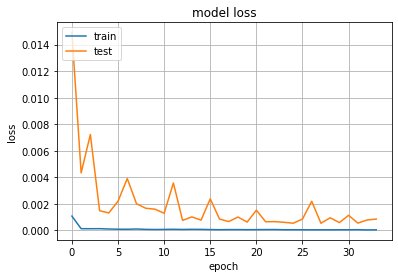

In [ ]:
plt.plot(history.history['loss']) #r
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This code generates a line plot to visualize the loss values of the model during the training process. The first line plots the training loss values. Specifically, it accesses the loss values from the history object, which contains the model's training history, including the loss values. By plotting these values, the line represents the change in training loss over the epochs. A second line plots the validation loss. It accesses the val_loss values from the history object, which represents the loss values observed on the validation dataset during each training epoch. By plotting these values, the line shows how the validation loss changes over the epochs. Below are the plot's title, labels, and legend. "Model loss" is the title of the plot, indicating that it represents the model's loss. Ylabel is set as "loss", indicating the type of values plotted. As the xlabel indicates, the x-axis represents the number of training epochs. In the legend, the labels "train" and "test" represent the training and validation losses, respectively. The `loc='upper left'` argument specifies the location of the legend in the plot.

Finally, `plt.show()` is called to display the plot on the screen.

In summary, this code generates a line plot that visualizes the change in training and validation loss values over the epochs. This plot provides insights into the model's performance during the training process, enabling analysis of overfitting, convergence, and training effectiveness.

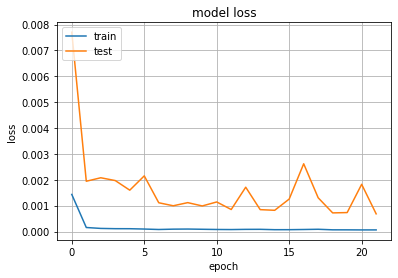

In [ ]:
plt.plot(history.history['loss']) # vn
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


This code generates a line plot to visualize the loss values of the model during the training process. The first line plots the training loss values. The loss values are obtained from the `history` object, which contains the training history of the model, including the loss values at each epoch. By plotting these values, the line represents the change in training loss over the epochs. The second line plots validation loss values. From the history object, it retrieves the 'val_loss' values, which represent the loss values from the validation dataset during each training epoch. By plotting these values, the line shows how the validation loss changes over the epochs. Below are the plot's title, labels, and legend. The title of the plot is 'model loss', indicating that the model has lost. Loss is set as the ylabel, indicating the type of values plotted. The xlabel is set as 'epoch', indicating that the x-axis represents the number of training epochs. Training and validation losses are represented in the legend by the labels 'train' and 'test'. It is finally called to display the plot on the screen. In summary, this code generates a line plot that visualizes the difference between the training and validation loss values during the training period. Plotting these values provides insight into the model's performance during training, allowing for analysis of overfitting, convergence, and training effectiveness.

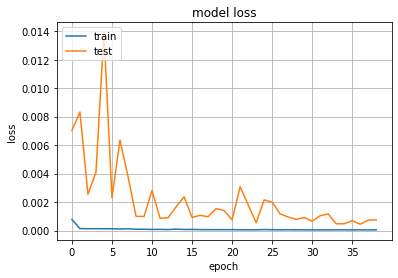

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This code generates a line plot to visualize the loss values of a trained model during the training process. The first line plots the loss values during the training process. It contains the training history of the model, including the loss values at each epoch. By plotting these values, the line represents the change in training loss over the epochs. Plotting the validation loss values with plt.plot(history.history['val_loss']) is the second line. Additionally, the history object contains the validation loss values for each epoch. By plotting these values, the line shows how the validation loss changes over the epochs. The title of the plot is 'model loss'. This title provides an overall description of the plot, indicating that it represents the loss of the model. The "loss" label is set by the "ylabel()" function. This label specifies the type of the plotted values, indicating that the values represent the loss of the model. It is set by xlabel(). Using the legend() function, a legend is added to the plot. This label indicates that the x-axis represents the number of training epochs. The legend includes two labels: 'train' and 'test', which represent training and validation losses. The `loc='upper left'` argument specifies the position of the legend in the plot, indicating that it should be placed in the upper left corner.

Finally, `plt.show()` is called to display the plot on the screen.

In summary, this code generates a line plot that visualizes the change in training and validation loss values over the epochs. With appropriate labels and legends, the plot illustrates the model's performance and the convergence of the loss during training.

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

This code performs predictions using a trained model on both the training and test datasets. Predictions are obtained using model.predict(). In this case, it is used to generate predictions for the input data `X_train` and `X_test`. A train-predict variable stores the model's predictions. These predictions represent the model's output for the corresponding input sequences in the training dataset. The test_predict variable stores the model's predictions for the test data. These predictions represent the model's output for the corresponding input sequences in the test dataset. The model's performance can be evaluated using predictions on both training and test datasets. We can then compare the predicted values to the actual values and see how well the model generalizes to unrecognized data. In summary, this code uses a trained model to generate predictions for both the training and test datasets, storing the results in the `train_predict` and `test_predict` variables, respectively. Using these predictions, we can evaluate the model's performance by comparing it to its actual results.

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

This code transforms the predicted values back to their original scale or form. This is accomplished by using the scaler.inverse_transform() function. In this case, it is applied to the `train_predict` and `test_predict` variables, which store the predictions made by the model on the training and test datasets, respectively.

Using the inverse transformation, the predicted values can be re-scaled or re-united. As a result, the model predictions were previously scaled or normalized to a specific range or distribution for training and evaluation. These variables contain the predictions in their original form, making interpretation and comparison of the actual values easier. The code reverses the scaling transformation applied to the predicted values, converting them back to their original scale or An example. In comparison to the actual values, this allows a more accurate assessment and interpretation of the model's predictions.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.348368386103683

This code calculates the root mean squared error (RMSE) as a performance metric to assess the accuracy of the model's predictions.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to calculate the mean squared error (MSE) between the actual target values (`y_train`) and the predicted target values (`train_predict`) on the training dataset.

The MSE represents the average squared difference between the predicted values and the actual values. Taking the square root of the MSE gives us the RMSE, which provides a more interpretable metric as it is in the same units as the target variable. This code outputs the calculated RMSE value. As the average magnitude of prediction errors is represented by RMSE, a lower RMSE indicates better performance. This code provides a measure of prediction accuracy by calculating the RMSE value between actual and predicted values on the training dataset.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

88.2181916072008

This code calculates the root mean squared error (RMSE) as a performance metric for the model's predictions on the test dataset.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to calculate the mean squared error (MSE) between the actual target values (`ytest`) and the predicted target values (`test_predict`) on the test dataset.

The MSE represents the average squared difference between the predicted values and the actual values. Taking the square root of the MSE gives us the RMSE, which provides a more interpretable metric as it is in the same units as the target variable. This code outputs the calculated RMSE value. Model generalization is evaluated by the RMSE on the test dataset. As it represents the average magnitude of the prediction errors on the test dataset, RMSE indicates better performance. As a result of this code, the model's prediction accuracy on unseen data is measured by calculating the RMSE between the actual and predicted values on the test dataset.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.21774883892234

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the training dataset.

To perform this calculation, the code imports the `math` module and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`y_train`) and the predicted target values (`train_predict`) on the training dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values. MSE represents the average squared difference between predicted and actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function. This value is then output. As the average magnitude of prediction errors on the training dataset is measured by RMSE, a lower RMSE indicates better performance. As a result, this code determines the prediction accuracy of the model on the training data by calculating the RMSE value between the actual and predicted values.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

86.01959140965074

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the test dataset.

To perform this calculation, the code imports the `math` module and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`ytest`) and the predicted target values (`test_predict`) on the test dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values. MSE is the average squared difference between the predicted and actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function. This value is then output. Based on the average magnitude of prediction errors on the test dataset, a lower RMSE indicates better performance. A measure of the model's prediction accuracy on unseen test data is provided by the RMSE value between the actual and predicted values on the test dataset.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.211342928244353

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the training dataset.

To perform this calculation, the code imports the `math` module and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`y_train`) and the predicted target values (`train_predict`) on the training dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values. It is the average squared difference between the predicted and actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function. The RMSE value is then displayed. This measure represents the average magnitude of prediction errors on the training dataset, so a lower RMSE indicates better performance. Essentially, this code calculates the RMSE value between the actual and predicted values on the training dataset, providing an indicator of the model's prediction accuracy.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.62252121614452

The root mean square error (RMSE) is calculated in this code to assess whether the model has correctly predicted the test data based on the data. This calculation is performed by importing the `math` module and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`ytest`) and the predicted target values (`test_predict`) on the test dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values. MSE is the average squared difference between the predicted and actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function. This value is then output. As the average magnitude of prediction errors on the test dataset is represented by the RMSE, a lower RMSE indicates better performance. In summary, this code calculates the RMSE value between the actual and predicted values on the test dataset, allowing us to evaluate the model's prediction accuracy on unseen test data.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.93232696332081

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the training dataset.

To perform this calculation, the code imports the `math` module for mathematical operations and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`y_train`) and the predicted target values (`train_predict`) on the training dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values. MSE is the average squared difference between predicted and actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function. This value is then output. As the RMSE represents the average magnitude of the prediction errors on the training dataset, a lower RMSE indicates better performance. The RMSE value is calculated by comparing the actual and predicted values on the training dataset, providing a measure of the model's prediction accuracy.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.40849010342191

This code calculates the root mean squared error (RMSE) as a performance metric to evaluate the accuracy of the model's predictions on the test dataset.

To perform this calculation, the code imports the `math` module for mathematical operations and the `mean_squared_error` function from the `sklearn.metrics` module.

The `mean_squared_error` function takes two arguments: the actual target values (`ytest`) and the predicted target values (`test_predict`) on the test dataset. It calculates the mean squared error (MSE) by comparing the predicted values with the actual values. MSE represents the average squared difference between predicted and actual values. To obtain the RMSE, the square root of the MSE is computed using the `math.sqrt` function. This value is then output. Based on the average magnitude of prediction errors on the test dataset, a lower RMSE indicates improved performance. Using this code, you can measure the model's performance in terms of prediction accuracy on unseen test data by calculating the RMSE value between the actual and predicted values.

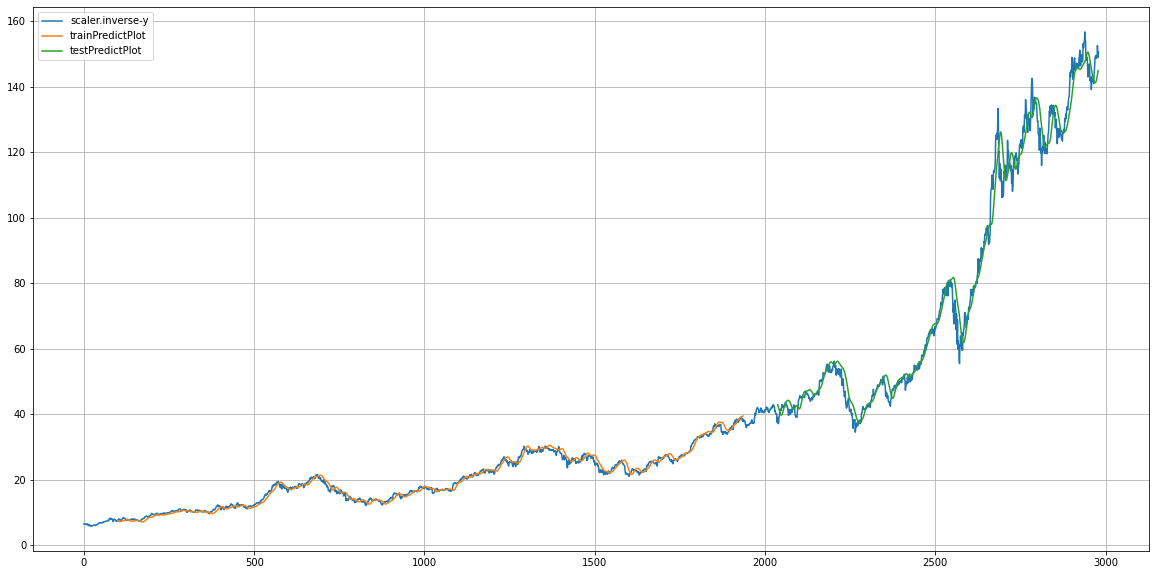

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

This code is responsible for plotting the actual stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset.

First, it creates an empty array called `trainPredictPlot` with the same shape as the target variable (`y`), and fills it with NaN (not a number) values. It then creates another empty array called `testPredictPlot` with the same shape as `y` and fills it with NaN values. This array will be used to plot the predicted prices on the test dataset. In the first step, the estimate prices are assigned from the train_predict array to the trainPredictPlot array, starting from the index look_back and adding the look_back index. This aligns the predicted values with the corresponding positions in the original `y` array.

Similarly, it assigns the predicted prices from the `test_predict` array to the `testPredictPlot` array, starting from the index `len(train_predict) + (look_back * 2) + 1` up to the index `len(y) - 1`. This aligns the predicted values with the corresponding positions in the original `y` array. It then plots the original stock prices (`scaler.inverse_transform(y)`), the `trainPredictPlot`, and the `testPredictPlot`. Each line in the plot is described in the legend. Using this code, you can compare and evaluate the model's performance by visualizing the actual stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset.

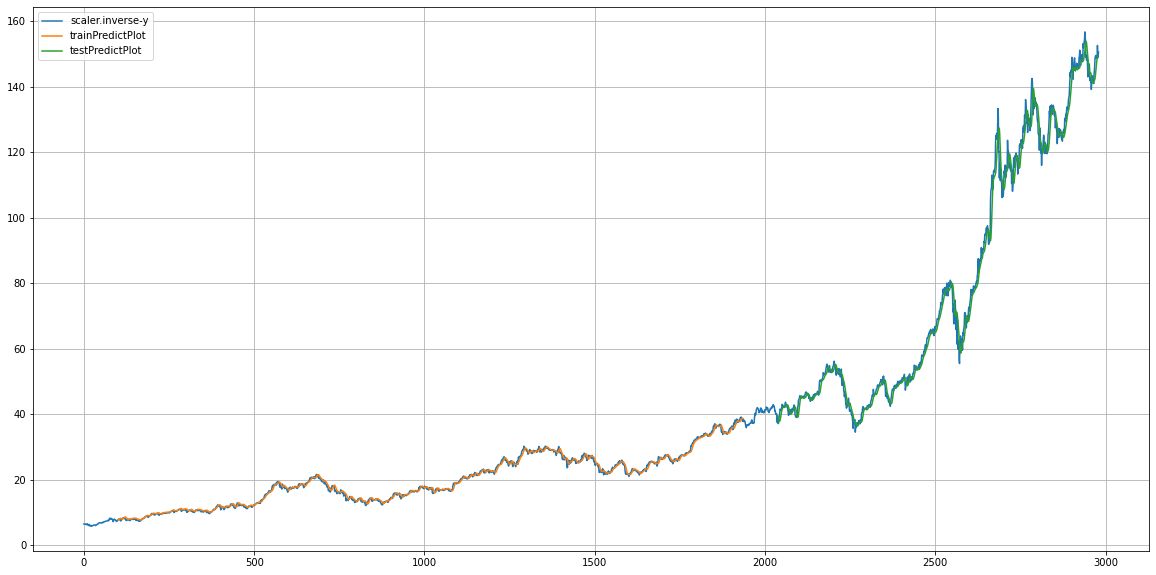

In [ ]:
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

This code is responsible for plotting the original stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset.

First, it sets the variable `look_back` to 100, which determines the number of previous time steps to consider when making predictions.

Next, it creates a figure and axes object using `plt.subplots` to prepare for plotting. The `figsize` parameter specifies the size of the figure. Next, we create an empty array named `trainPredictPlot` with the same shape as the target variable `y`. These arrays are filled with NaN (not a number) values. Then the values in the train_predict array are assigned to the train_predict plot array, starting at the index `look_back` up to the length of `train_predict` plus `look_back`. This aligns the predicted values with the corresponding positions in the original `y` array.

Similarly, it creates an empty array called `testPredictPlot` with the same shape as `y` and fills it with NaN values.

Then, it assigns the values from the `test_predict` array to the `testPredictPlot` array, starting from the index `len(train_predict) + (look_back * 2) + 1` up to the index `len(y) - 1`. Then, it plots the original stock price (scaler.inverse_transform(y)), the trainPredictPlot, and the testPredictPlot. Throughout the plot, each line is labeled by the legend. In summary, this code generates a plot showing the original stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset, enabling visual comparison and evaluation of the model's performance.

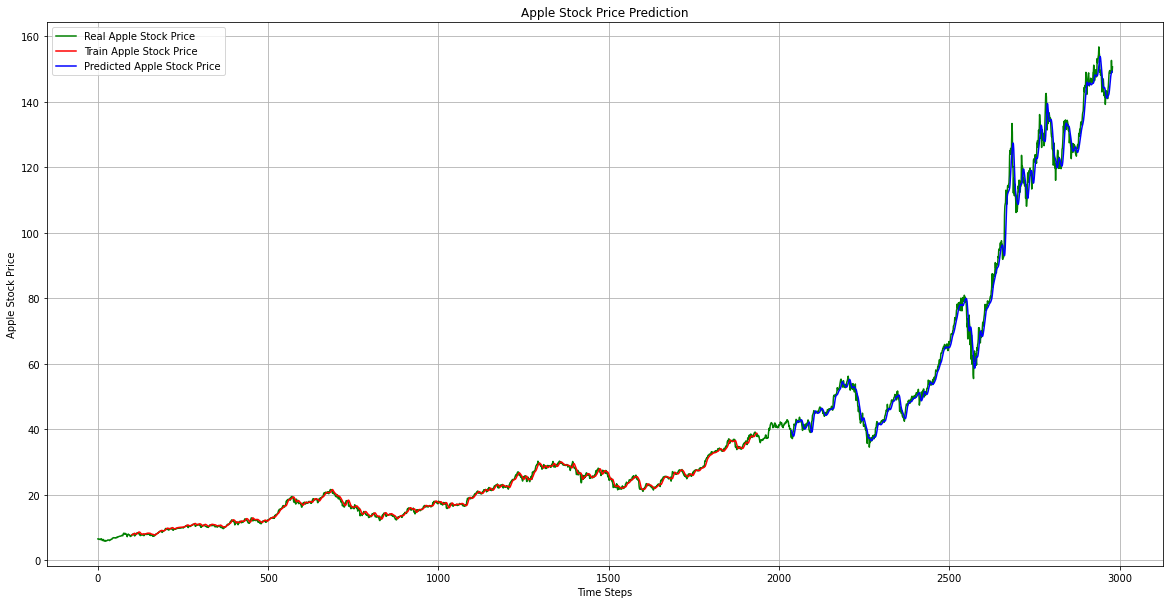

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

The code generates a plot showing the real Apple stock prices, the predicted prices on the training dataset, and the predicted prices on the test dataset. It prepares the plot by creating a figure and axes object. The `figsize` parameter specifies the size of the figure. It plots the real Apple stock prices using the scaler.inverse_transform(y) array. The `color` parameter sets the color of the line to green, and the `label` parameter provides a label for the line. Following that, it plots the predicted prices on the training dataset using the `trainPredictPlot` array. The color of the line is set to red, and the label is provided. Finally, it plots the predicted prices on the test dataset with plt.plot. The color of the line is set to blue, and the label is provided.  The code then sets the title of the plot to 'Apple Stock Price Prediction' using `plt.title`, and sets the x-axis label to 'Time Steps' and the y-axis label to 'Apple Stock Price' using `plt.xlabel` and `plt.ylabel`, respectively.  Finally, it adds a legend to the plot using `plt.legend` to show the labels for the different lines, and displays the plot using `plt.show`.  In summary, this code generates a plot that visualizes the Comparison of actual and predicted Apple stock prices.

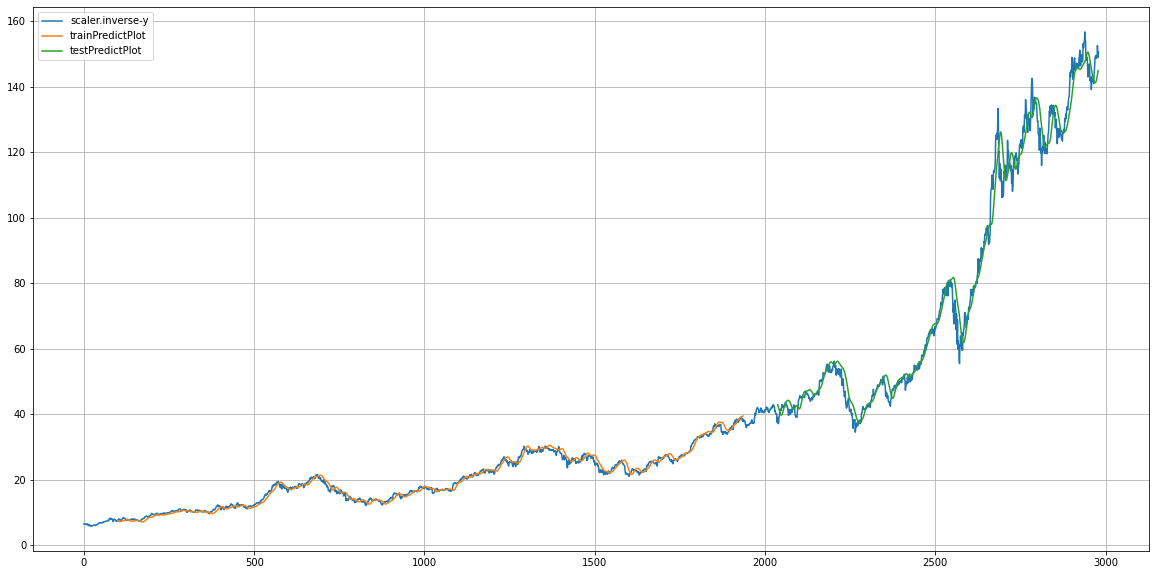

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

This code generates a plot that visualizes the predicted Apple stock prices along with the actual prices.

First, it defines the `look_back` variable, which determines the number of time steps to shift the predictions for plotting.

Then, it creates a figure and axes object using `plt.subplots` to prepare for plotting. The `figsize` parameter specifies the size of the figure. Next, it creates empty arrays with the same shape as the original data array. These arrays will be used to store the predicted prices for plotting. Based on the look back index, the code assigns the predicted prices from the training dataset to the trainingPredictPlot array. This shifting is done to align the predicted prices with the original data for visualization.

Similarly, it assigns the predicted prices from the test dataset (`test_predict`) to the `testPredictPlot` array, starting from the index after the training dataset plus twice the `look_back` value. Again, this shifting aligns the predicted prices with the original data.  After that, it plots the original data using `plt.plot` and the `scaler.inverse_transform(y)` array, which transforms the scaled prices back to their original values.  Then, it plots the `trainPredictPlot` array, representing the predicted prices on the training dataset.  Finally, it plots the `testPredictPlot` array, representing the predicted prices on the test dataset.  The code adds a legend to the plot using In summary, this code generates a plot that compares actual and predicted Apple stock prices, allowing for visual inspection of the predictions' accuracy.

In [ ]:
aapl_model = Prophet(daily_seasonality = True) # stock prices have daily seasonality
aapl_model.fit(aapl_features)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


The code initializes a Prophet model object named `aapl_model` with the parameter `daily_seasonality` set to `True`, indicating that stock prices have daily seasonality patterns. 

The Prophet model is then fitted to the provided data `aapl_features`. Data patterns and trends are learned by training the model. The `fit` method analyzes the historical stock price data and estimates the model parameters based on those observations.  By fitting the model, the Prophet algorithm automatically captures various components of the time series data, including trends, seasonality, and holidays, allowing it to make future predictions based on those patterns.  In summary, the code sets up and trains a Prophet model specifically for the given Apple stock price data (`aapl_features`), taking into account the daily Stock prices exhibit seasonality.

In [ ]:
future = aapl_model.make_future_dataframe(periods = 58) # how many days into the future we want
prediction = aapl_model.predict(future)

This code creates a `future` dataframe that represents the time points in the future for which we want to make predictions. The number of future time points is determined by the `periods` parameter, which is set to 58 in this case.

The `make_future_dataframe` method of the Prophet model generates a dataframe with the appropriate dates, starting from the last date in the original dataset and extending into the future by the specified number of periods.

After creating the `future` dataframe, the code uses the trained `aapl_model` to make predictions for the future time points. The `predict` method takes the `future` dataframe as input and produces the predictions for the target variable, which in this case is the Apple stock price.  The `prediction` object contains the predicted values for the future time points, along with additional information such as uncertainty intervals.  In summary, this code generates a `future` dataframe with dates representing future time points, and then uses the trained Prophet model (`aapl_model`) to predict the Apple stock price for Dates in the future. Predicted values are stored in the `prediction` object.

In [ ]:
prediction

ds       trend  ...  multiplicative_terms_upper        yhat
0    2010-01-04    6.533377  ...                         0.0    6.841865
1    2010-01-05    6.542235  ...                         0.0    6.868467
2    2010-01-06    6.551094  ...                         0.0    6.853183
3    2010-01-07    6.559953  ...                         0.0    6.814581
4    2010-01-08    6.568812  ...                         0.0    6.697646
...         ...         ...  ...                         ...         ...
3033 2021-12-26  163.360742  ...                         0.0  163.911622
3034 2021-12-27  163.489158  ...                         0.0  164.008820
3035 2021-12-28  163.617575  ...                         0.0  164.163680
3036 2021-12-29  163.745991  ...                         0.0  164.271615
3037 2021-12-30  163.874408  ...                         0.0  164.351062

[3038 rows x 22 columns]

This variable contains the predicted values for the target variable, which is the Apple stock price in this case. These predictions are generated by the trained Prophet model based on the provided input data and the specified future time points. Prediction objects typically contain numerous columns that provide useful information. In addition to the columns representing dates, 'ds' represents the predicted values, 'yhat' represents the predicted values, 'yhat_lower' and 'yhat_upper' represent the uncertainty intervals for the predicted values, and a number of columns related to seasonality and trend. A prediction object can be used for further analysis or visualization, allowing you to examine predicted values for future time points.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.offline as py

This code snippet imports several libraries: `numpy` for numerical computations, `pandas` for data processing and CSV file input/output, `plotly.graph_objects` for creating interactive plots, `matplotlib.pyplot` for creating static plots, and `plotly.offline` for offline rendering of plotly visualizations.

By importing these libraries, the code prepares the necessary tools for performing data analysis, visualization, and plotting tasks. It allows users to manipulate data, create plots, and generate visualizations for further analysis using functions and methods provided by these libraries.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                    mode='markers',
                    name='Most Likely'))
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat_lower'],
                    mode='lines+markers',
                    name='Pessimistic'))
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat_upper'],
                    mode='lines',
                    name='Optimistic'))

fig.add_trace(go.Scatter(x=aapl_features['ds'], y=aapl_features['y'], name='Actual',
                         line = dict(color='goldenrod')))
fig.show()

Using the plotly.graph_objects library, this code creates a plot. It initializes a new figure object `fig` to which various traces are added. The first three traces are scatter plots representing different predictions. Among these predictions are the most likely scenario (`yhat`), the pessimistic scenario (`yhat_lower`), and the optimistic scenario (`yhat_upper`). Each trace is plotted against the corresponding date (`ds`) from the prediction dataset. The fourth trace shows the actual values (`y`) from the original dataset (`aapl_features`). It is plotted against the corresponding date (`ds`). Lastly, the fig.show() function is called to display the plot once the additional traces have been added. Visualization of predicted and actual values allows comparison and analysis of the model's performance.

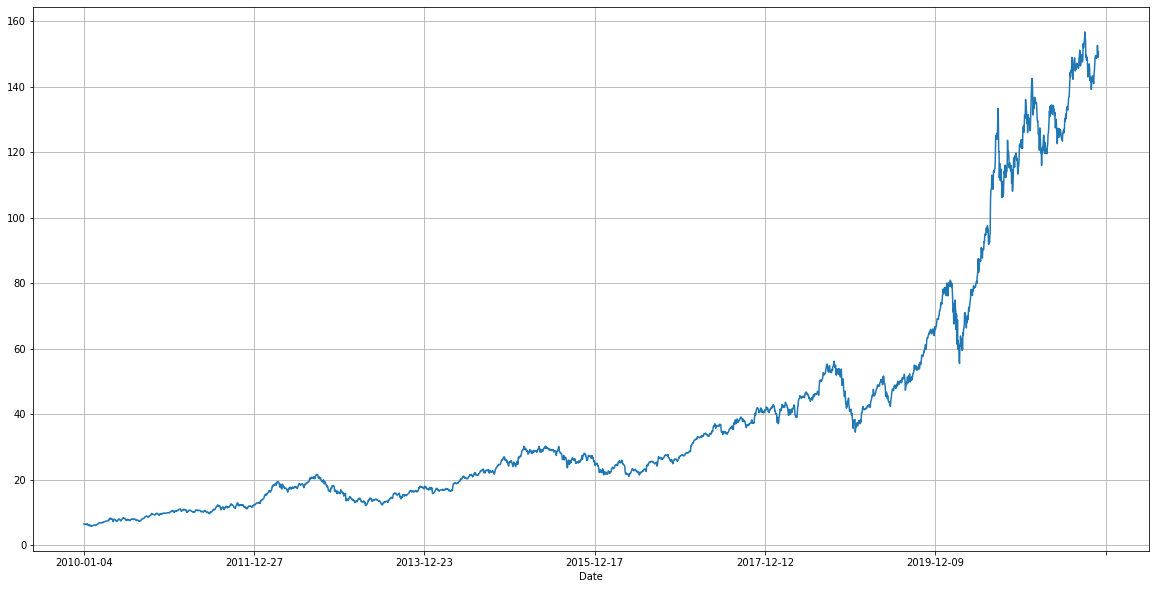

In [ ]:
df11.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

An adjusted closing price line plot is generated using a DataFrame (`df11`) with the date (`Date`) set as the index. Plots are displayed with a specified figure size (`FIGURE_SIZE`). 

The DataFrame is restructured so that the date column becomes the index, providing a more meaningful visualization of the time series data. The adjusted closing prices are then selected from this modified DataFrame. For creating the line plot, this function is called on the selected column. Dates are represented on the x-axis, and adjusted closing prices are shown on the y-axis. Each point on the plot corresponds to a specific date and its corresponding adjusted closing price. This plot illustrates historical trends and fluctuations in adjusted closing prices. Analyzing the price patterns, identifying trends, and understanding the overall behavior of the stock is possible with the help of this tool.

#Neuroprophet

In [ ]:
#model = NeuralProphet(daily_seasonality=False)
model = NeuralProphet()

Using the NeuralProphet library, this code initializes a forecasting model. The model is created without specifying any specific settings, resulting in the default configuration being used. NeuralProphet adds neural networks to the popular Prophet forecasting model for enhanced accuracy and flexibility. It is designed to handle time series data and provide forecasting capabilities. When the model is instantiated by instantiating the `NeuralProphet` class, an instance of the model is created and assigned to the variable `model`. This instance can be used to train the model on historical data and make predictions for future time periods. By default, the model captures daily patterns through daily seasonality. A specific configuration and parameter set can, however, be customized based on the forecasting task requirements. Overall, this code sets up a NeuralProphet model for time series forecasting, which can be customized and trained to make accurate predictions.

In [ ]:
metrics = model.fit(aapl_feature, 
                    freq='D', epochs=1000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/273 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.11E-02, min: 1.40E+00


  0%|          | 0/273 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.11E-02, min: 1.51E+00


  0%|          | 0/273 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.11E-02, min: 1.40E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.11E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [03:34<00:00,  4.66it/s, SmoothL1Loss=0.000624, MAE=2.91, RMSE=4.28, RegLoss=0]


A NeuralProphet model that has previously been initialized is trained using the fit method in this code. The training data, represented by the `aapl_feature` variable, is provided as input to the model. The model learns from historical data to capture patterns and relationships. The goal is to optimize the model's internal parameters so that it can make accurate predictions. The frequency is specified as 'D', representing daily data. Using this information, the model can identify daily patterns or seasonality in the data and understand its temporal structure. 1000 epochs are set as the number of iterations or passes the model will make over the training data during training. The model is trained for a forward pass to make predictions, followed by a backward pass to correct the parameters based on the errors made during the forward pass. It is possible for the model to learn complex patterns and perform better by training it for more epochs. It is important to strike a balance between training for too long and overfitting the data, however. In general, this code optimizes the NeuralProphet model's performance for future predictions by using the specified training data, frequency, and number of epochs.

In [ ]:
forecast = model.predict(aapl_feature)

Using the trained NeuralProphet model, this code makes predictions for the given AAPL_feature dataset. 

The `predict` method on the model is called with the input of the AAPL_feature data. This data represents the historical features used for training the model. Forecasts or predictions are generated using the trained model. The model takes into account the learned patterns and relationships from the training data to make these predictions.

The output of the `predict` method, stored in the `forecast` variable, is a forecasted time series that includes predictions for future time points based on the trained model. Forecasted values can be used for further analysis, evaluation, or visualization. Overall, this code generates predictions for future time points based on the trained NeuralProphet model, allowing for the forecasting of the target variable based on historical information.

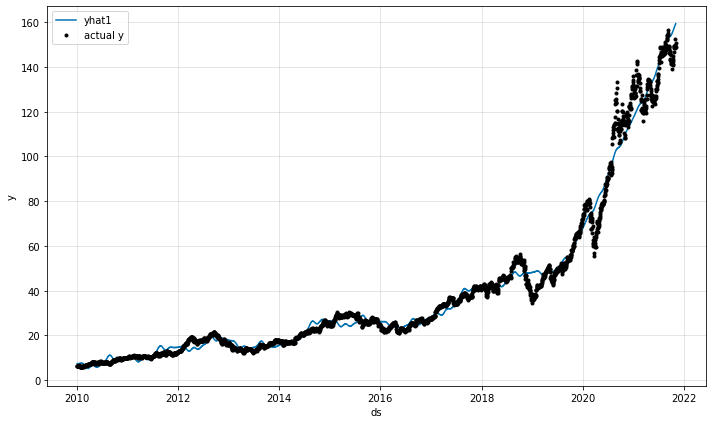

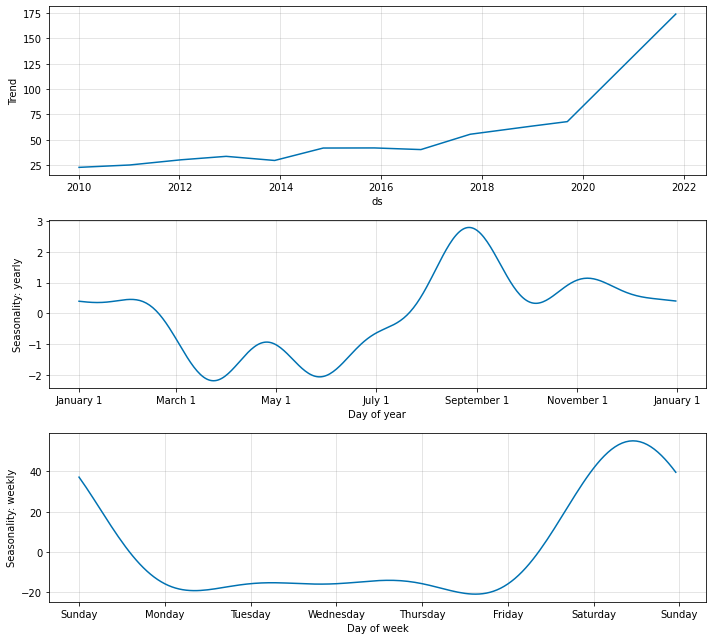

In [ ]:
fig_forecast = model.plot(forecast)
fig_components = model.plot_components(forecast)
#fig_model = model.plot_parameters()


This code generates and displays plots related to the forecasted data and its components using the NeuralProphet model. It passes the forecast data to the plot method. This data represents the forecasted time series generated by the model. Data can be analyzed using various plotting methods. In this code, it is used to create two plots: `fig_forecast` and `fig_components`. The forecast plot shows forecasted values. It provides a visual representation of the predicted values for the future time points. Fig_components displays the individual forecast components. These components may include trend, seasonality, holidays, or any other patterns captured by the model. The plots assist in interpreting the forecasted data and identifying underlying patterns. This can be useful for determining whether the model is performing as expected, identifying anomalies, or finding outliers, and identifying what is influencing the forecasted value. Additionally, a comment indicates that another plot could be used to visualize the model's parameters, although it isn't executed at the moment. The plot can provide information about the learned weights and biases of the NeuralProphet model, which are internal parameters that affect predictions.

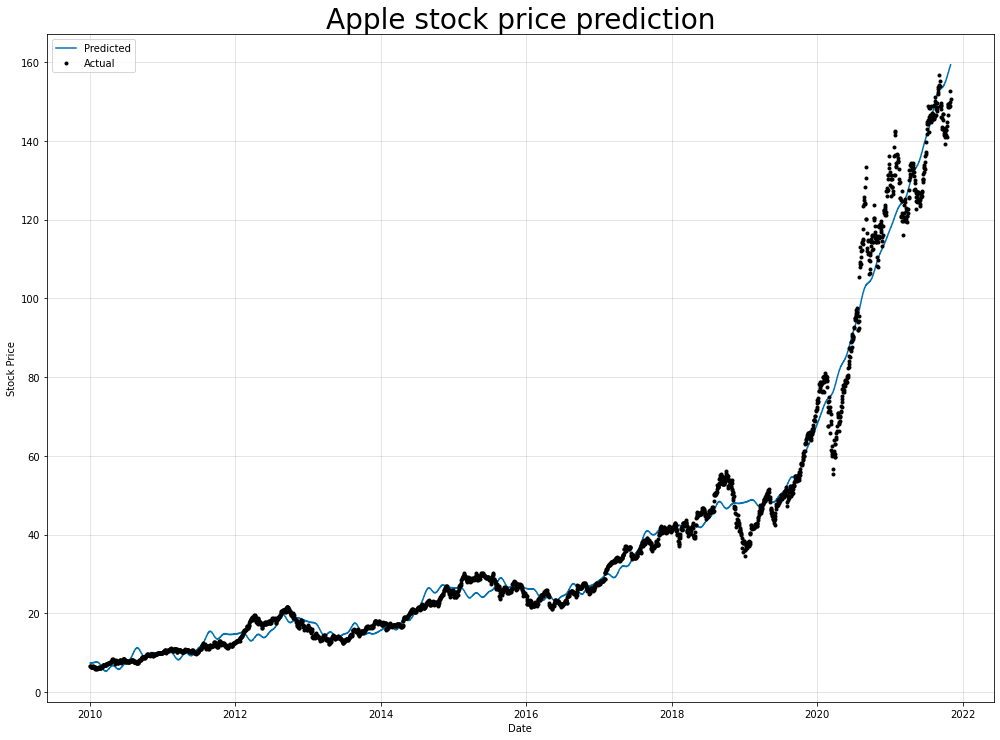

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Stock Price", ax=ax)
ax.set_title("Apple stock price prediction", fontsize=28)
ax.legend(['Predicted', 'Actual'])

To visualize Apple's predicted and actual stock prices, this code uses the Matplotlib library. 

In the first step, a figure and axes object are created using plt.subplots(figsize=(14, 10)). The `figsize` parameter specifies the dimensions of the figure, determining its width and height. The plot method is called on the model object and passes in the forecast data. Based on the model, these are the predicted stock prices. The `xlabel` and `ylabel` parameters specify the labels for the x-axis and y-axis of the plot, respectively. Ax.set_title sets the title as "Apple stock price prediction" in 28 point font. This provides a descriptive title for the plot. Additionally, the `ax.legend` function adds a legend to the plot, labeling the two lines as "Predicted" and "Actual". This allows for easy identification and differentiation between the predicted and actual stock prices.

As a result, this code generates a visual representation of Apple's stock price predictions and actual stock prices, which makes it easier to compare and analyze the model's performance.

Text(0.5, 0, 'epoch')

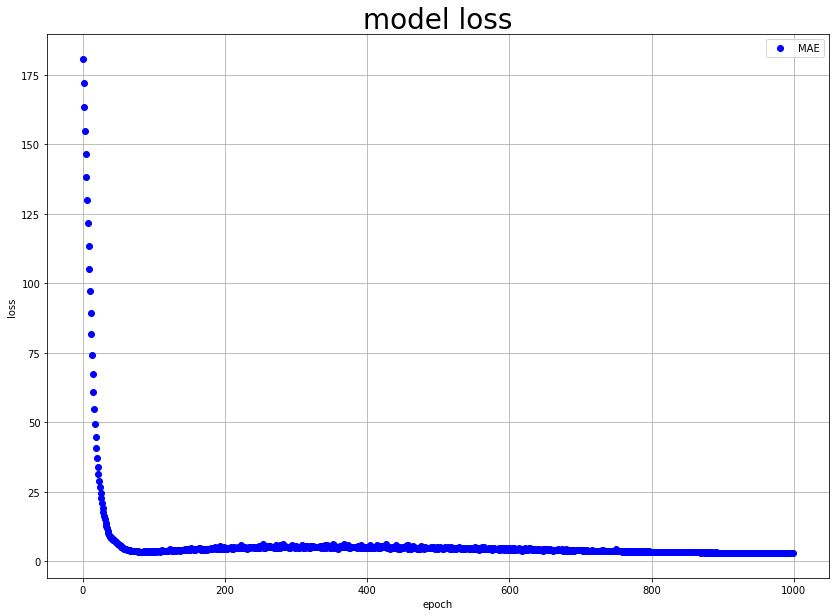

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
#ax.plot(metrics["SmoothL1Loss"], '-r', linewidth=2, label="Validation Loss")
ax.legend(['MAE'])
ax.set_title("model loss", fontsize=28)
plt.ylabel('loss')
plt.xlabel('epoch')

This code generates a line plot using the `matplotlib` library to visualize the training loss (mean absolute error, MAE) of a model over multiple epochs. The axes and figure objects are first created via plt.subplots(figsize=(14, 10). The `figsize` parameter specifies the dimensions of the figure, determining its width and height.

The `ax.plot` function is then called on the axes object (`ax`) to plot the MAE values. 'ob' specifies that the data points should be plotted as blue circles. Linewidth specifies the width of the lines connecting data points. The `label` parameter provides a label for the plotted data, which is set as "Training Loss". The ax.legend function then adds a legend to the plot. This allows for easy identification and differentiation of the plotted data. This function sets the title of the plot to "model loss" with a 28-point font size. This provides a descriptive title for the plot. The plot.ylabel and plot.xlabel functions set the labels for the y-axis and x-axis of the plot, respectively. The y-axis label is set as "loss", and the x-axis label is set as "epoch". This code generates a line plot showing the training loss (MAE) of a model over multiple epochs.

In [ ]:
m = NeuralProphet()
df_train, df_test = m.split_df(aapl_feature, valid_p=0.3,freq='D')

The provided code involves using the NeuralProphet library to split a dataset into training and testing sets. The first step involves initializing a NeuralProphet model on `m` using the `NeuralProphet()` constructor. This creates an instance of the NeuralProphet model that can be used for time series forecasting. Aapl_feature is then divided into training and testing sets using the NeuralProphet library's split_df function. The `split_df` function takes several parameters: `valid_p` specifies the percentage of data to be used for validation (in this case, 30% or 0.3), and `freq` specifies the frequency of the time series data (in this case, 'D' for daily).

The `split_df` function separates the dataset into two parts: `df_train` and `df_test`. `df_train` contains a portion of the original dataset that will be used for training the model, while `df_test` contains the remaining portion that will be used to test the model on unseen data. A subset of the dataset is used to train a model, and unseen data is used to assess its generalization capabilities after it has been trained. A common practice in machine learning is to estimate a model's performance and detect potential overfitting or underfitting.

In [ ]:
#m = NeuralProphet()
metricss = m.fit(df_train, validation_df=df_test , freq='D',epochs=1000, plot_live_loss=False)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/271 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.01E-02, min: 1.58E+00


  0%|          | 0/271 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.41E-02, min: 1.26E+00


  0%|          | 0/271 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.69E-02, min: 1.47E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.98E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [02:47<00:00,  5.97it/s, SmoothL1Loss=0.00261, MAE=2.69, RMSE=4.44, RegLoss=0, MAE_val=30.4, RMSE_val=31.1, SmoothL1Loss_val=0.116]


The provided code uses the NeuralProphet model to train a time series forecasting model on the training data and evaluate its performance on the validation data. The code creates an instance of the NeuralProphet model by uncommenting the line `m = NeuralProphet()`. This initializes the model and assigns it to the variable `m`.

Next, the `fit` method is called on the NeuralProphet model `m`. A model is trained on the training data (df_train) and its performance is evaluated on the validation data (df_test). The `validation_df` parameter is set to `df_test` to specify the validation data.

Other parameters provided to the `fit` method include `freq='D'` to specify the frequency of the time series data as daily, `epochs=1000` to specify the number of training epochs, and `plot_live_loss=False` to disable live loss plotting during the training process.

By calling the `fit` method, the model learns patterns and relationships in the training data and updates its internal parameters to make predictions. A model's performance can be assessed and its training progress can be monitored by evaluating the validation data. Fitting a model returns metrics measuring its performance, such as loss values, which can be used to evaluate its predictive accuracy and analyze its training process.

In [ ]:
forecast = m.predict(df_train)

The provided code uses the trained NeuralProphet model (`m`) to generate predictions for the training data (`df_train`).

By calling the `predict` method on the NeuralProphet model with the training data as the input (`df_train`), the model utilizes its learned parameters to make predictions for the target variable. The predictions are generated based on the patterns and relationships the model has learned during the training process. For each target variable, the forecast object is returned. The forecast object provides a variety of properties and methods for further analysis and visualization. Overall, the code generates predictions using the trained NeuralProphet model for the training data, providing insights into the model's performance and its ability to capture patterns in time series data.

Text(0.5, 1.0, 'Apple stock price prediction')

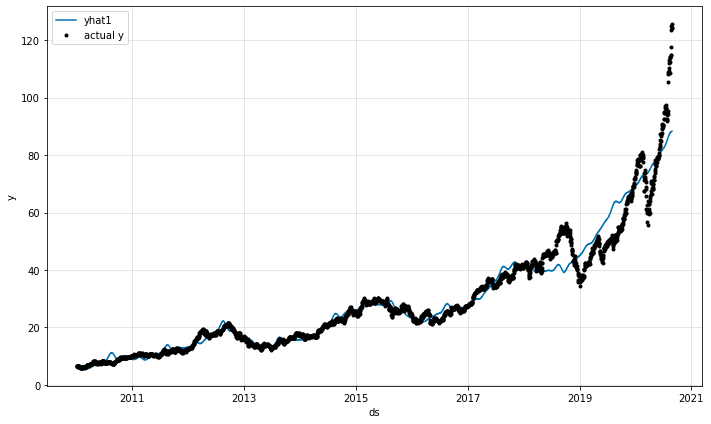

In [ ]:
fig_forecast = m.plot(forecast)
ax.set_title("Apple stock price prediction", fontsize=28)
#ax.legend(['Predicted', 'Actual'])
#fig_components = model.plot_components(forecast)
#fig_model = model.plot_parameters()

The provided code generates a forecast plot (`fig_forecast`) using the NeuralProphet model (`m`) and the forecast object (`forecast`) obtained from the previous step.

By calling the `plot` method on the NeuralProphet model with the forecast object as the input (`forecast`), the code generates a visualization of the predicted values for the target variable. This plot provides a visual representation of the predicted stock price values over time.  The `set_title` function sets the title of the plot to "Apple stock price prediction" with a font size of 28.  The lines that are commented out (`#ax.legend(['Predicted', 'Actual'])`, `#fig_components = model.plot_components(forecast)`, `#fig_model = model.plot_parameters()`) indicate that there may be additional code or plot components related to the predicted values, such as the actual values or the There are components of the forecast, but they are not active or included in the code snippet.

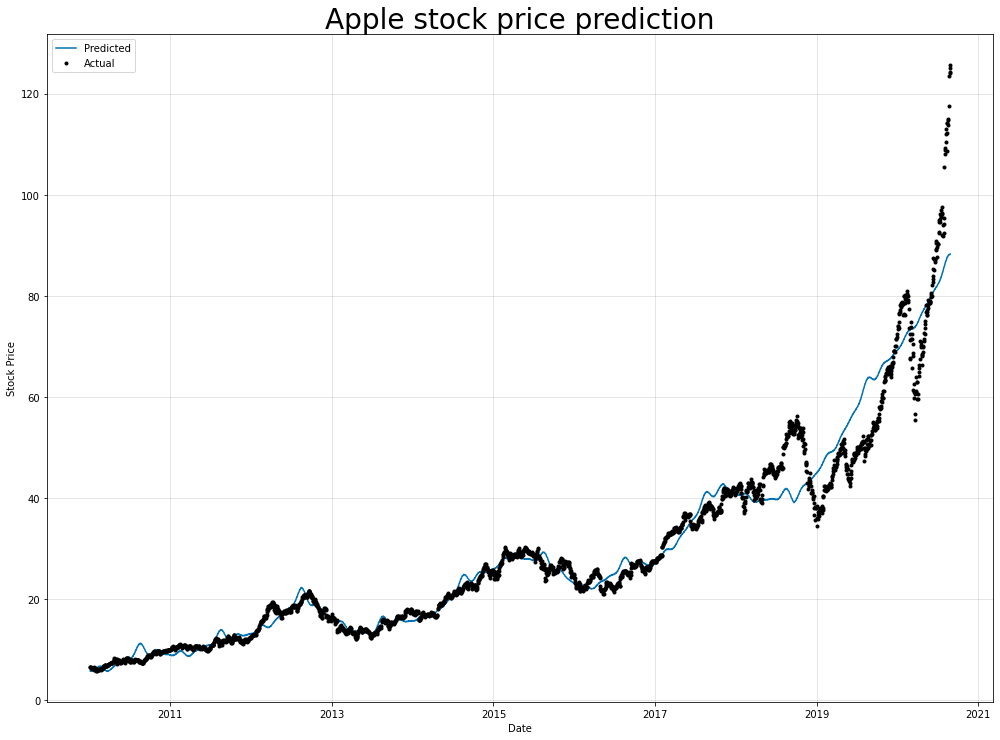

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10)) 
m.plot(forecast, xlabel="Date", ylabel="Stock Price", ax=ax)
ax.set_title("Apple stock price prediction", fontsize=28)
ax.legend(['Predicted', 'Actual'])

For plotting a graph, the provided code creates a figure and axes object. The figure size is set to 14 inches by 10 inches. It is plotted using the Forecast object as input to the NeuralProphet model. Plotting the predicted stock price values over time is generated by this method. The x-axis is labeled as "Date" and the y-axis is labeled as "Stock Price".

The `set_title` method is used to set the title of the plot as "Apple stock price prediction" with a font size of 28.

The `legend` method is used to add a legend to the plot, which displays the labels "Predicted" and "Actual" associated with the plotted lines or markers. Using the legend, one can tell which lines or markers represent the actual values and which are the predicted values. Overall, this code creates a plot showing the predicted and actual stock price values over time, with appropriate labels and a legend to distinguish between them.

Text(0.5, 0, 'epoch')

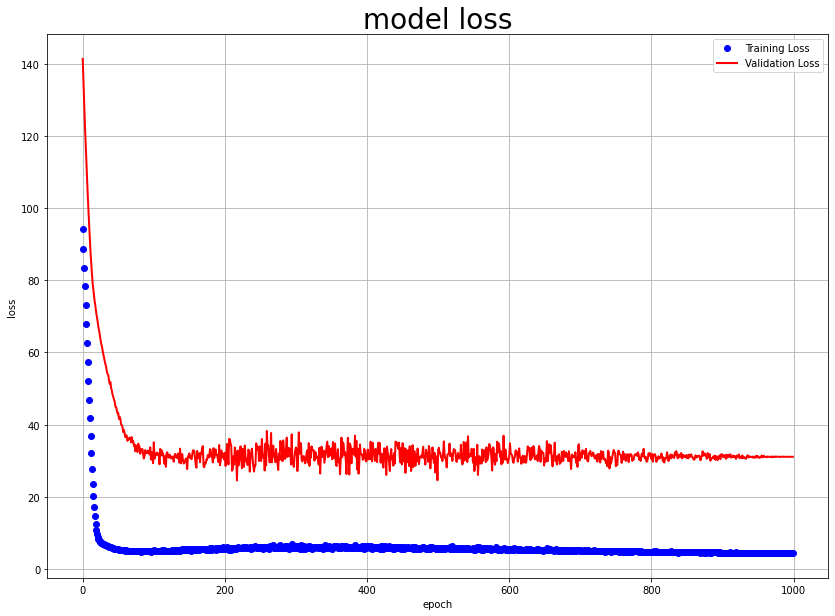

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metricss["RMSE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metricss["RMSE_val"], '-r', linewidth=2, label="Validation Loss")
ax.legend(['RMSE', 'RMSE_val'])
ax.set_title("model loss", fontsize=28)
ax.legend(['Training Loss', 'Validation Loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

For plotting a graph, the provided code creates a figure and axes object. The figure size is set to 14 inches by 10 inches.

The `plot` method of the axes object (`ax`) is called to plot two lines on the graph. Blue circles ('ob') with a linewidth of 6 represent the training loss in the first line. The second line represents the validation loss and is plotted as a solid red line ('-r') with a linewidth of 2. This method adds a legend to the graph, specifying "RMSE" and "RMSE_val" as the labels. This helps in understanding which line represents the training loss and which represents the validation loss.

The `set_title` method is used to set the title of the graph as "model loss" with a font size of 28.

Further, the `ylabel` function is used to label the y-axis as "loss" and the `xlabel` function is used to label the x-axis as "epoch".

Overall, this code plots the training loss and validation loss on a graph, with appropriate labels, legends, and axes titles.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

The code imports the `pyplot` module from the `matplotlib` library and makes it available under the name `plt`. It also includes the `%matplotlib inline` magic command, which allows the generated plots to be displayed directly in the Jupyter Notebook or JupyterLab interface.

By importing `matplotlib.pyplot`, we can use various functions and methods provided by `pyplot` to create and customize plots. By using these functions and methods, we can create figures, add axes, plot data, customize the appearance of plots, and more. This command ensures that the plots appear inline within the notebook, rather than opening as a separate window or file. The code sets up the necessary tools for creating plots using Matplotlib.pyplot and configures the notebook environment to show them inline.

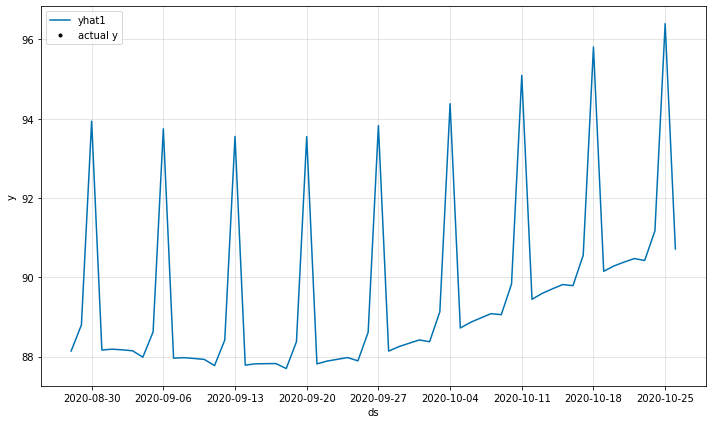

In [ ]:
f_future = m.make_future_dataframe(df_train, periods=60)
forecast = m.predict(f_future)
fig_forecast = m.plot(forecast)

Using the NeuralProphet model, this code forecasts time series. 

To do this, it first creates a future dataframe called f_future which extends df_train by adding future dates. The number of future periods is specified as 60 in this case.

Next, it uses the trained NeuralProphet model `m` to generate predictions for the future dates. These predictions are stored in the `forecast` variable. This code generates a plot of the forecasted values using the NeuralProphet model's plot method. In the fig_forecast variable, the forecast values for the future periods are displayed along with any historical values.